In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import tabula
import re
import matplotlib.pyplot as plt
import PyPDF2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer


import warnings
warnings.filterwarnings('ignore')
#sns.set_context("talk")


## Check Data.
- [x] number of subjects
- [x] number of Risk
- [x] number Amb
- [x] number MC's

In [2]:
risk_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'risk' in f]
amb_files = [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'ambig' in f]
MC_files= [os.path.join(root,f) for root,dirs,files in os.walk('../data') for f in files if 'Check' in f]
print("Number of Subjects:%s \n Number of Risk Files:%s \n Number of Amb Files:%s \n Number of MC Files:%s \n"%(
len(os.listdir('../data')),len(risk_files),len(amb_files),len(MC_files)))

Number of Subjects:58 
 Number of Risk Files:55 
 Number of Amb Files:51 
 Number of MC Files:55 



## Manipulation Check:
- [x] do participants increase preference in the risk task for "better" probabilities?
- [x] are participants generally risk averse?
- [x] do participants report the different 2nd order distributions?
- [x] are participants generally ambiguity averse? 

In [3]:
########### Make Risk DF ########
df_list=[]# prepend list
for f in risk_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_r=pd.concat(df_list) #concatonate the list to a single df
df_r=df_r[df_r.response!= 'no_response']#only analyzing responses made

#define whether they chose safe or lottery
df_r['Choose_lot']=np.logical_or((np.logical_and(df_r.LotisLeft==1,df_r.response=="['f']")),
(np.logical_and(df_r.LotisLeft==0,df_r.response=="['j']")))

############ Make Ambiguity DF ########
df_list=[]# prepend list
for f in amb_files:
    sub="sub-%s"%(re.search("sub-(.*)/",f).group(1))
    df=pd.read_csv(f)
    df['sub']=sub
    df_list.append(df) #append this list w/ a df with 'sub' column
df_a=pd.concat(df_list) #concatonate the list to a single df
df_a=df_a[df_a.response!= 'No_resp']#only analyzing responses made

#define whether they chose safe or lottery
df_a['Choose_Risk']=np.logical_or((np.logical_and(df_a.RiskisLeft==1,df_a.response=="['f']")),
(np.logical_and(df_a.RiskisLeft==0,df_a.response=="['j']")))
df_a.reset_index(drop=True)
df_r.reset_index(drop=True)

#MC files#####
display(df_r.head())
display(df_a.head())


LotisLeft  Lot_per  Lot_mon Lot_color  Sure_mon    dist response  \
0          1       60       13      blue         5  Narrow    ['j']   
1          0       40       13      blue         5  Narrow  No_resp   
2          1       50       13      blue         5  Narrow    ['f']   
3          0       60       13      blue         5  Narrow    ['j']   
4          1       50       13      blue         5  Narrow    ['f']   

          RT       sub  Choose_lot  
0   3.506263  sub-1240       False  
1  10.000000  sub-1240       False  
2   2.854734  sub-1240        True  
3   1.991939  sub-1240        True  
4   2.246549  sub-1240        True

Risk_per  Money  Color  Amb  RiskisLeft response        RT  dist       sub  \
1        30     13  green  100           0    ['f']  0.933264  wide  sub-1240   
2        40     13  green  100           1    ['j']  1.081161  wide  sub-1240   
3        50     13  green  100           1    ['j']  1.091519  wide  sub-1240   
4        60     13  green  100           1    ['j']  0.799137  wide  sub-1240   
5        70     13  green  100           0    ['j']  2.462628  wide  sub-1240   

   Choose_Risk  
1        False  
2        False  
3        False  
4        False  
5         True

## Check items 1 & 2
- [x] Probability of choosing lottery increases with likeihood of winning
- [x] Participants are generally risk averse. (lot prize 13 sure prize 5) EV~38%

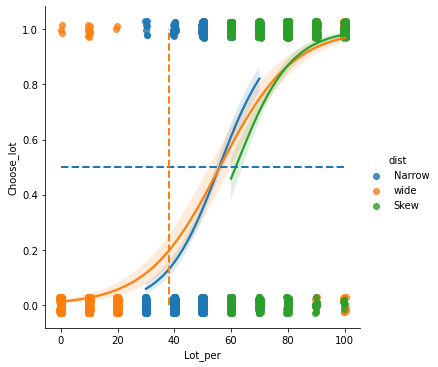

In [4]:
if 1==1:
    plotData=df_r
    sns.lmplot(x='Lot_per',y='Choose_lot', data=plotData ,
               hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03)
    plt.plot([0,100], [0.5,0.5], linewidth=2,linestyle='dashed')
    plt.plot([38,38], [0,1], linewidth=2,linestyle='dashed')

## Manipulation Check:
- [x] do participants report the different 2nd order distributions?
        Yes But I need to come back to this. figuring out the code is tough
- [x] are participants generally ambiguity averse? 
        Yes, but more mixed than risk 7 vs 2

sub-1240


dist      means       stds      skew       sub
0       narrow  66.153846  28.010987 -1.262250  sub-1240
1         skew  69.411765  17.489493 -0.454943  sub-1240
2  True_unkown  34.000000  26.208711  0.847657  sub-1240
3         wide  66.363636  27.020615 -1.317851  sub-1240

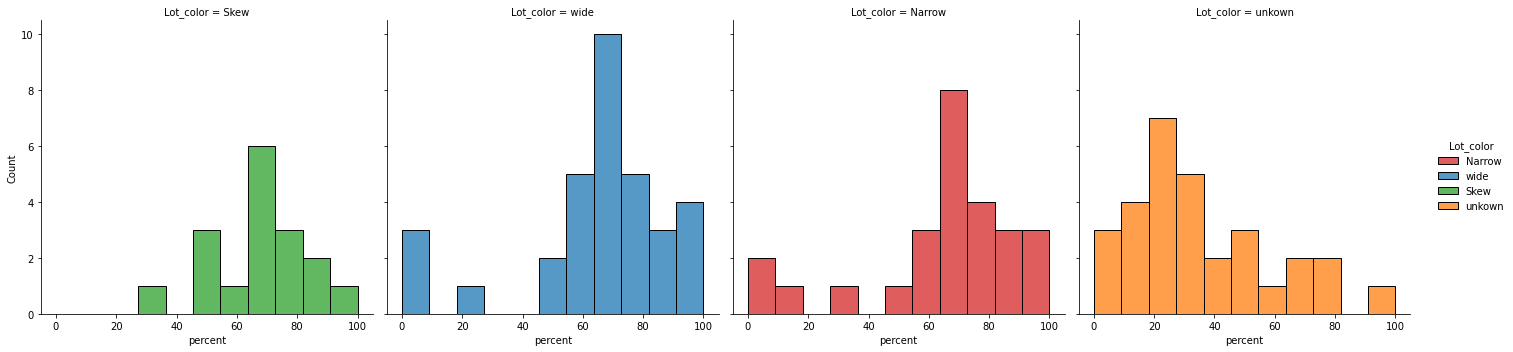

sub-1302


dist      means       stds      skew       sub
0       narrow  41.363636  16.415862 -0.097173  sub-1302
1         skew  72.500000  25.429641 -1.098066  sub-1302
2  True_unkown  53.750000  28.017851 -0.274750  sub-1302
3         wide  52.500000  26.708301 -0.761828  sub-1302

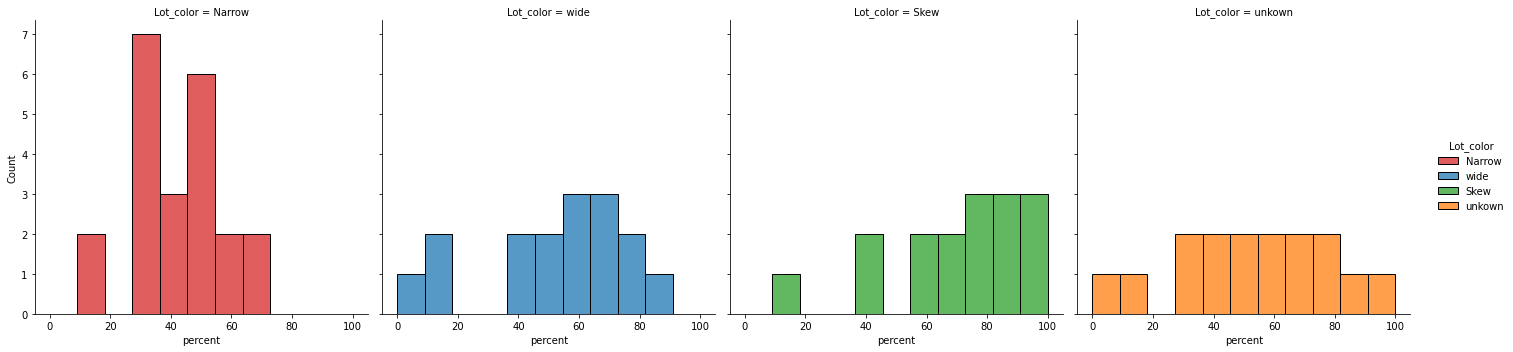

sub-3218


dist      means       stds      skew       sub
0       narrow  44.285714  28.209346 -0.324178  sub-3218
1         skew  65.000000  25.495098 -0.564814  sub-3218
2  True_unkown  50.000000  32.113081  0.000000  sub-3218
3         wide  65.384615  28.598010 -0.882540  sub-3218

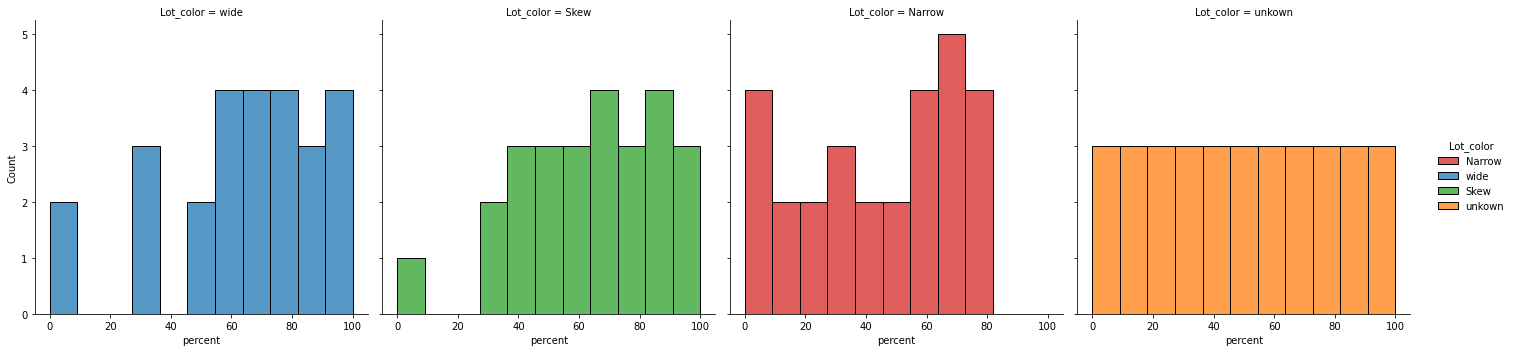

sub-1999
sub-1300


dist      means       stds      skew       sub
0       narrow  49.166667  24.654759 -0.056101  sub-1300
1         skew  65.135135  31.677333 -0.894734  sub-1300
2  True_unkown  58.775510  31.532566 -0.289979  sub-1300
3         wide  57.826087  35.413983 -0.442549  sub-1300

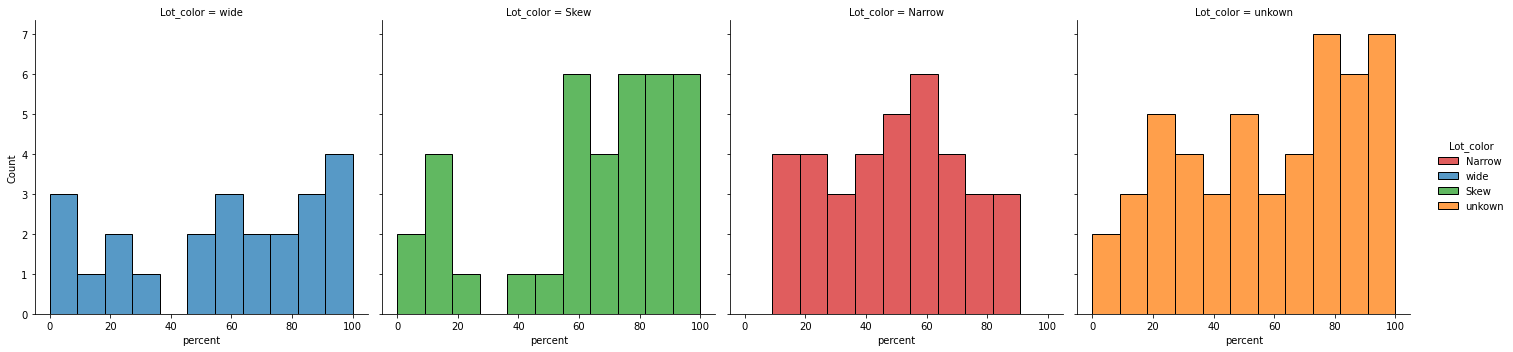

sub-1007


dist  means  stds  skew       sub
0       narrow     50   0.0     0  sub-1007
1         skew     90   0.0     0  sub-1007
2  True_unkown     70   0.0     0  sub-1007
3         wide     60   0.0     0  sub-1007

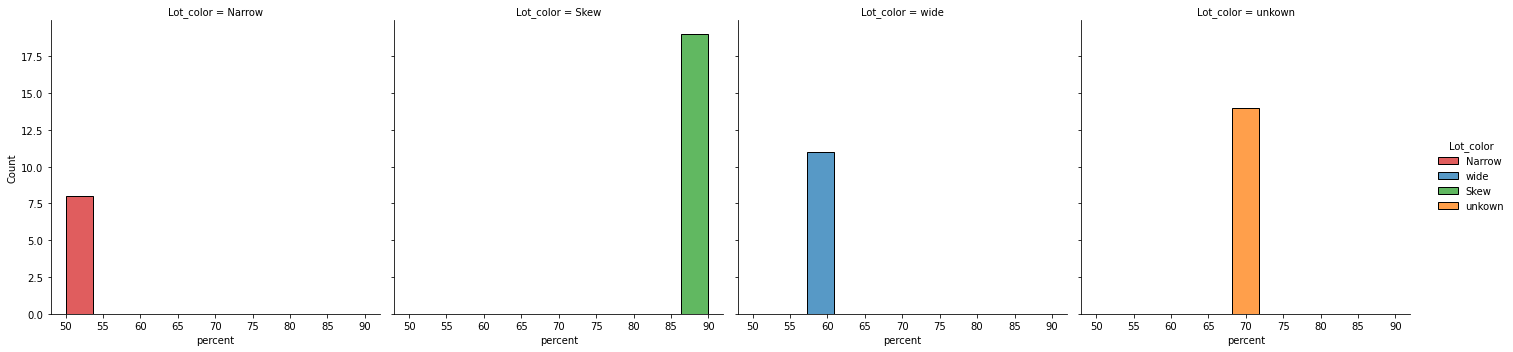

sub-1244
sub-3212


dist      means       stds      skew       sub
0       narrow  36.470588  24.223227  0.768231  sub-3212
1         skew  64.285714  21.347466 -0.998864  sub-3212
2  True_unkown  50.000000  25.115120  0.000000  sub-3212
3         wide  66.666667  35.260932 -1.244847  sub-3212

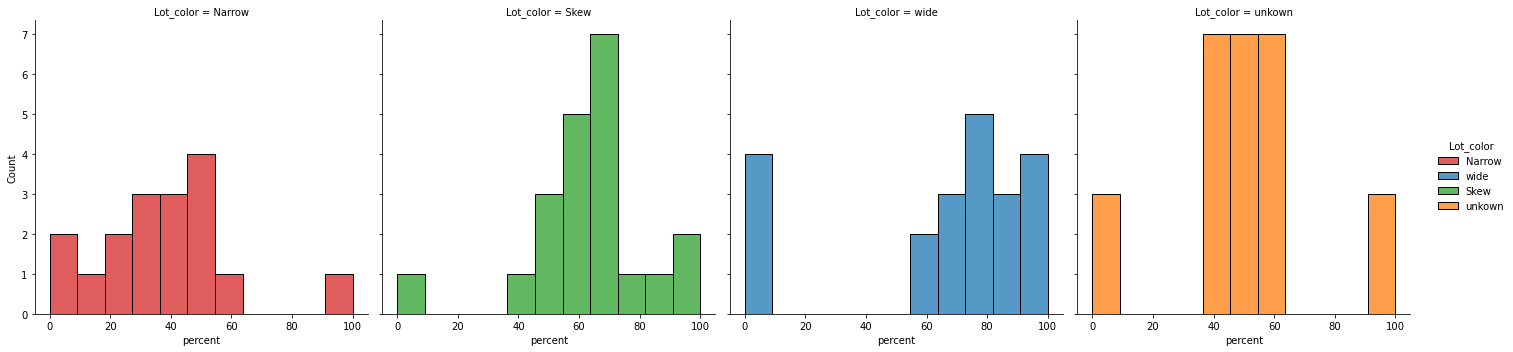

sub-3166


dist      means       stds      skew       sub
0       narrow  51.333333   8.338094 -0.274237  sub-3166
1         skew  71.428571  14.064217 -0.098753  sub-3166
2  True_unkown  28.571429  14.064217  0.098753  sub-3166
3         wide  50.000000  43.852901  0.000000  sub-3166

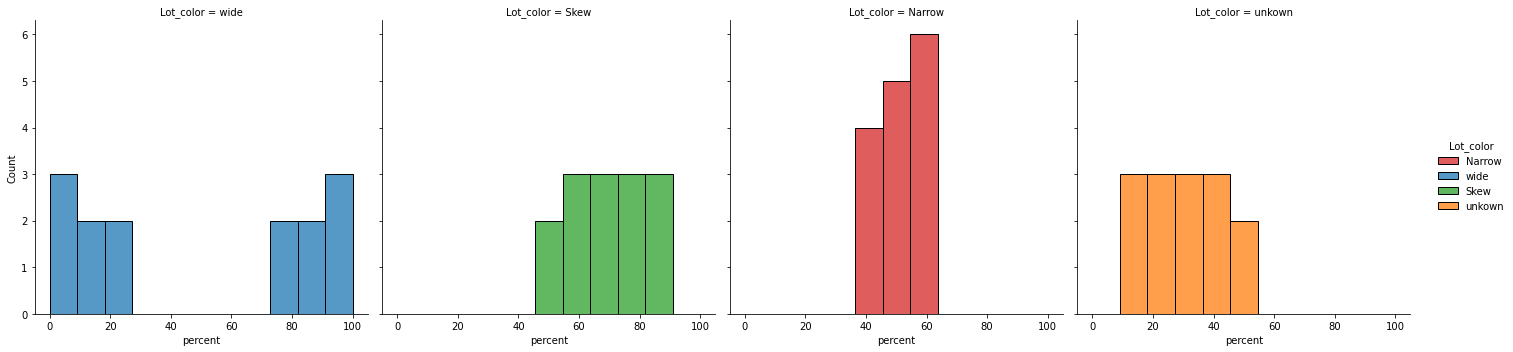

sub-1242


dist      means       stds      skew       sub
0       narrow  53.000000   6.749486 -0.433637  sub-1242
1         skew  85.555556  12.472191 -0.448898  sub-1242
2  True_unkown  70.327869  24.492666 -0.827289  sub-1242
3         wide  15.000000  21.213203  2.226077  sub-1242

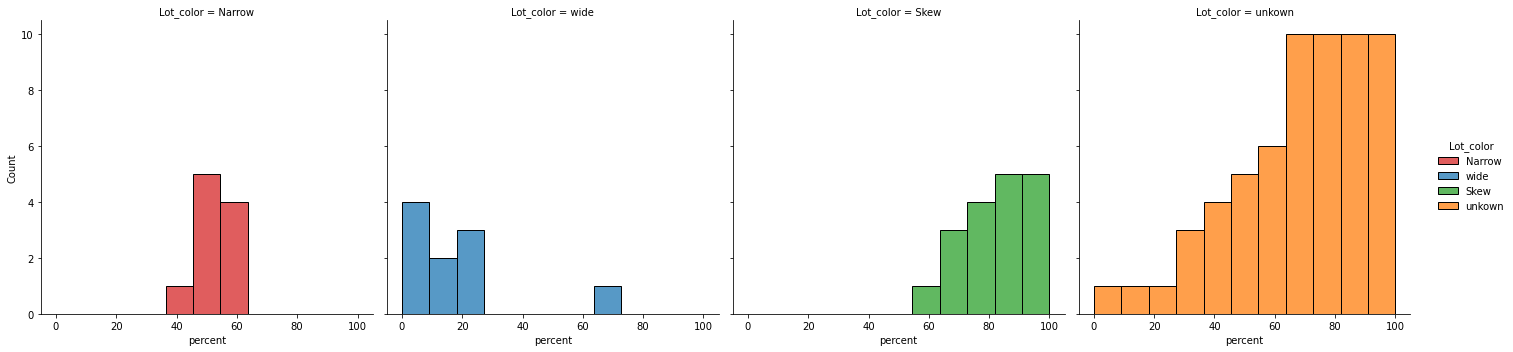

sub-3210


dist      means       stds      skew       sub
0       narrow  55.294118  12.805100  0.027315  sub-3210
1         skew  81.333333  12.459458  0.224608  sub-3210
2  True_unkown  21.000000  14.473206  0.155084  sub-3210
3         wide  63.333333  41.016496 -0.723741  sub-3210

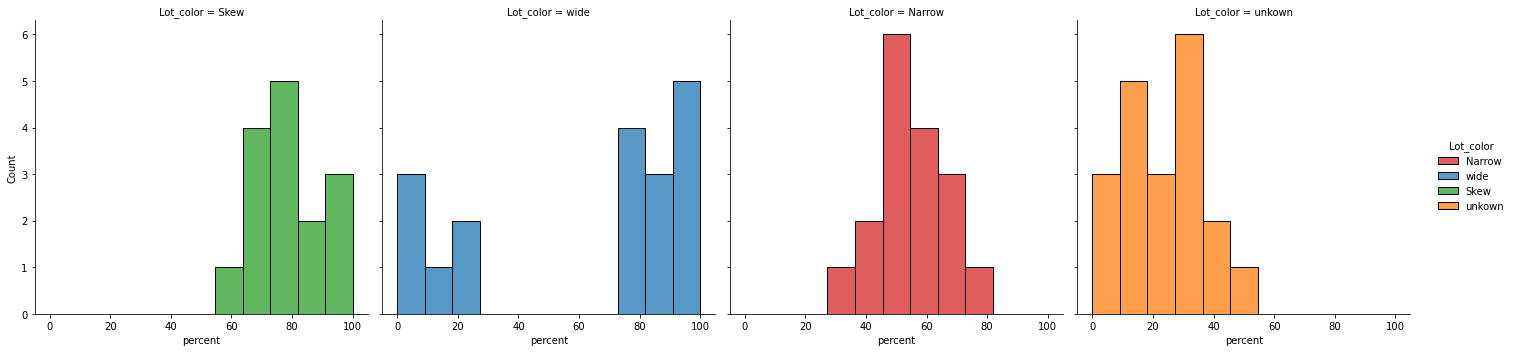

sub-1019


dist      means       stds      skew       sub
0       narrow  37.058824  23.120528  0.268791  sub-1019
1         skew  78.421053  17.404711 -0.154242  sub-1019
2  True_unkown  50.000000  36.228442  0.000000  sub-1019
3         wide  35.384615  31.013645  0.356632  sub-1019

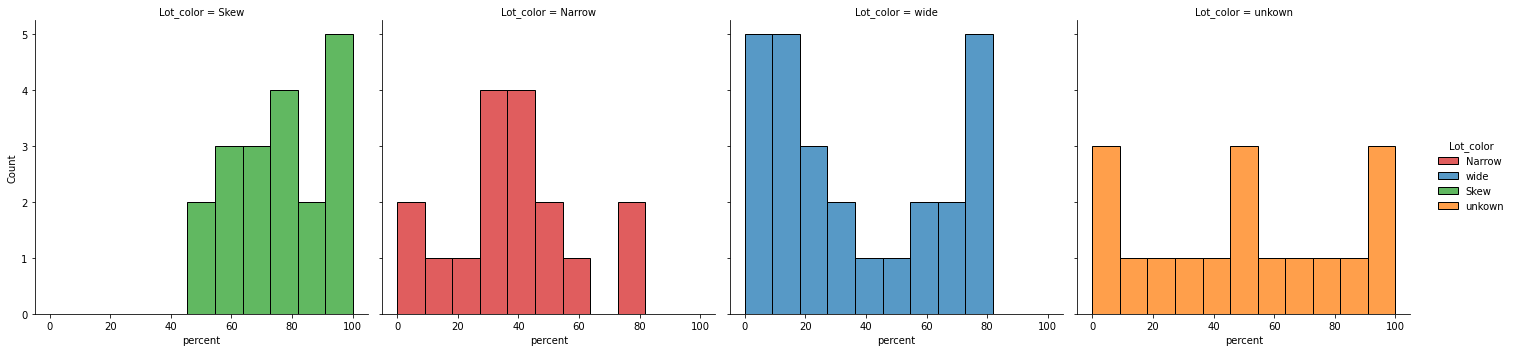

sub-3200


dist      means       stds      skew       sub
0       narrow  46.666667  19.402850 -0.392581  sub-3200
1         skew  75.000000  11.470787  0.000000  sub-3200
2  True_unkown  50.000000  26.157418  0.000000  sub-3200
3         wide  57.000000  44.140923 -0.393204  sub-3200

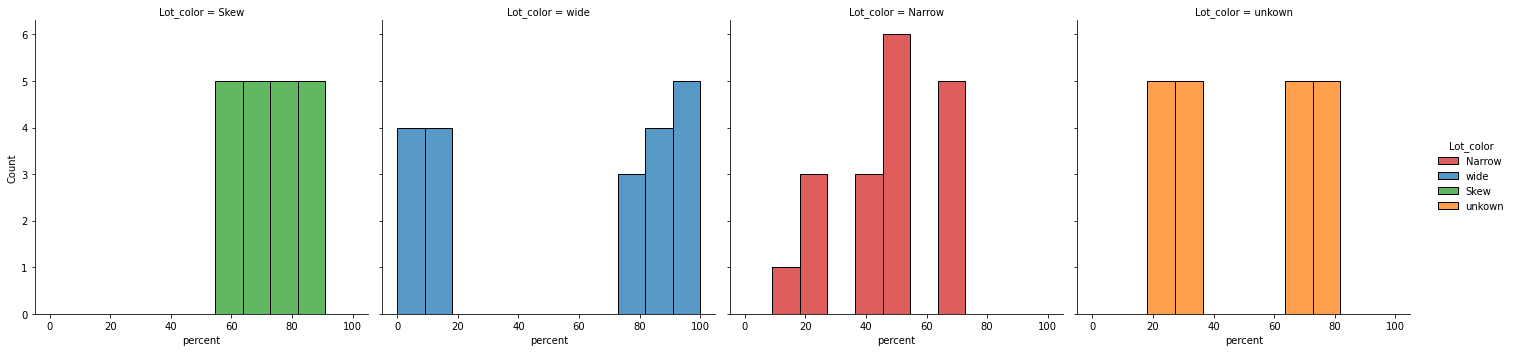

sub-1253


dist      means       stds      skew       sub
0       narrow  61.250000  25.787594  0.295732  sub-1253
1         skew  61.052632  21.575381  0.516341  sub-1253
2  True_unkown  55.652174  28.576228 -0.119002  sub-1253
3         wide  45.789474  37.165664  0.241270  sub-1253

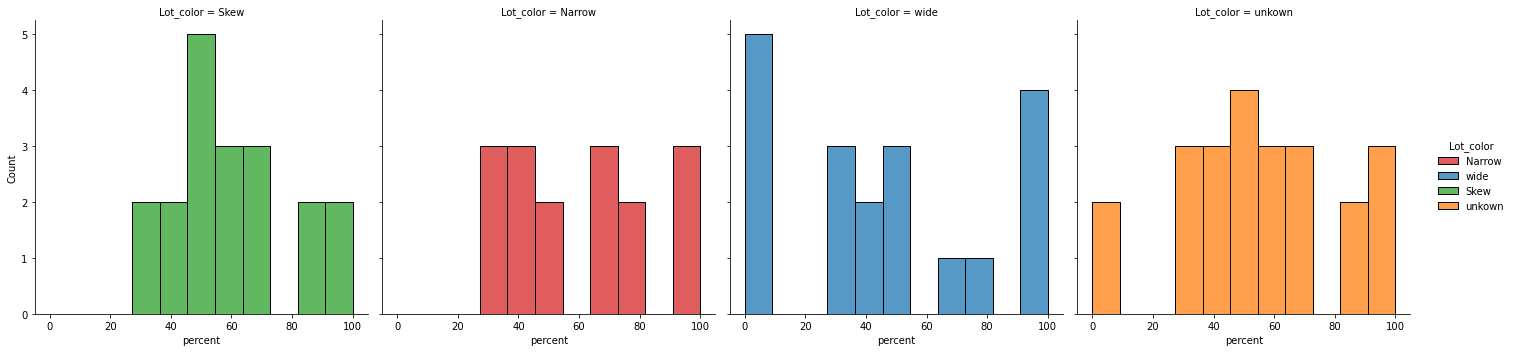

sub-3164


dist      means       stds      skew       sub
0       narrow  32.500000  18.708287 -0.831211  sub-3164
1         skew  72.105263  15.623595  0.258858  sub-3164
2  True_unkown  37.750000  21.422191  0.209381  sub-3164
3         wide  64.000000  21.591825  0.322396  sub-3164

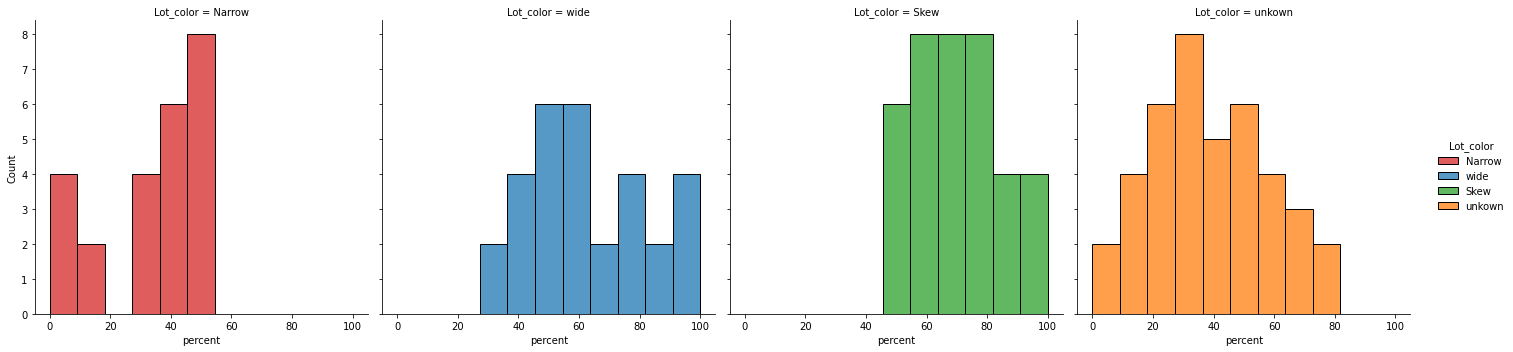

sub-3122


dist      means       stds      skew       sub
0       narrow  58.571429  12.149858  1.146967  sub-3122
1         skew  58.333333   8.348471  0.354139  sub-3122
2  True_unkown  65.000000   5.270463  0.000000  sub-3122
3         wide  60.000000  43.011626 -0.720335  sub-3122

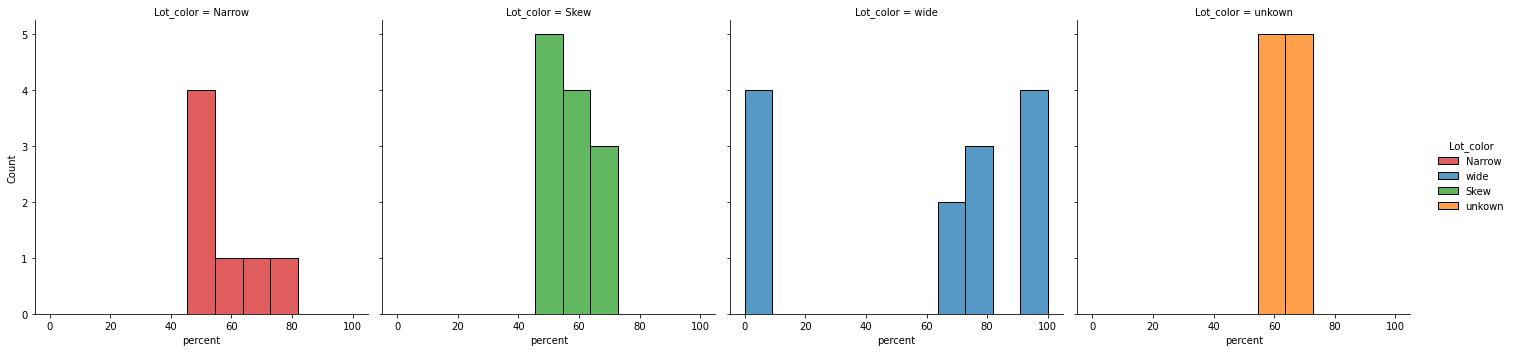

sub-1294


dist      means       stds      skew       sub
0       narrow  42.400000  18.321208  0.100533  sub-1294
1         skew  81.875000  14.244882 -0.058689  sub-1294
2  True_unkown  20.000000   0.000000  0.000000  sub-1294
3         wide  72.857143  32.682287 -1.792731  sub-1294

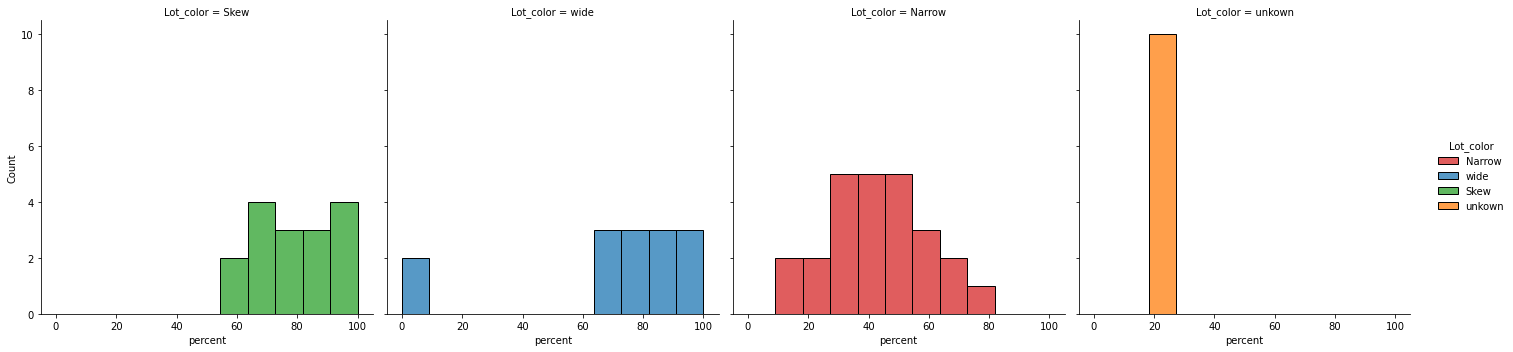

sub-3199


dist      means       stds      skew       sub
0       narrow  45.714286  31.905946 -0.410660  sub-3199
1         skew  87.647059  11.472473 -0.324313  sub-3199
2  True_unkown  93.684211   8.306976 -1.481655  sub-3199
3         wide  68.421053  34.199278 -1.228199  sub-3199

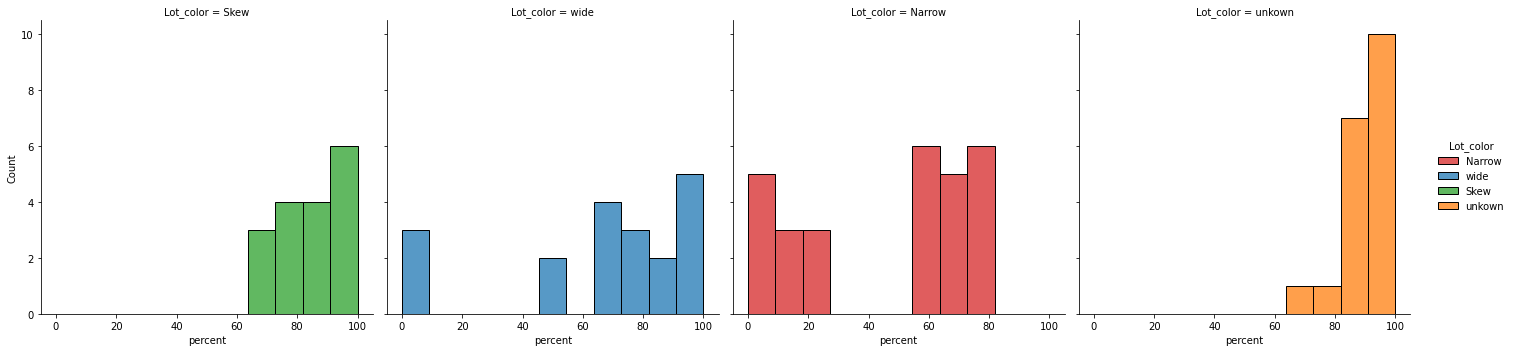

sub-1010


dist  means       stds      skew       sub
0       narrow  50.00  11.881771  0.000000  sub-1010
1         skew  84.50  13.945382 -0.403339  sub-1010
2  True_unkown  50.00  22.360680  0.000000  sub-1010
3         wide  53.75  45.588741 -0.239280  sub-1010

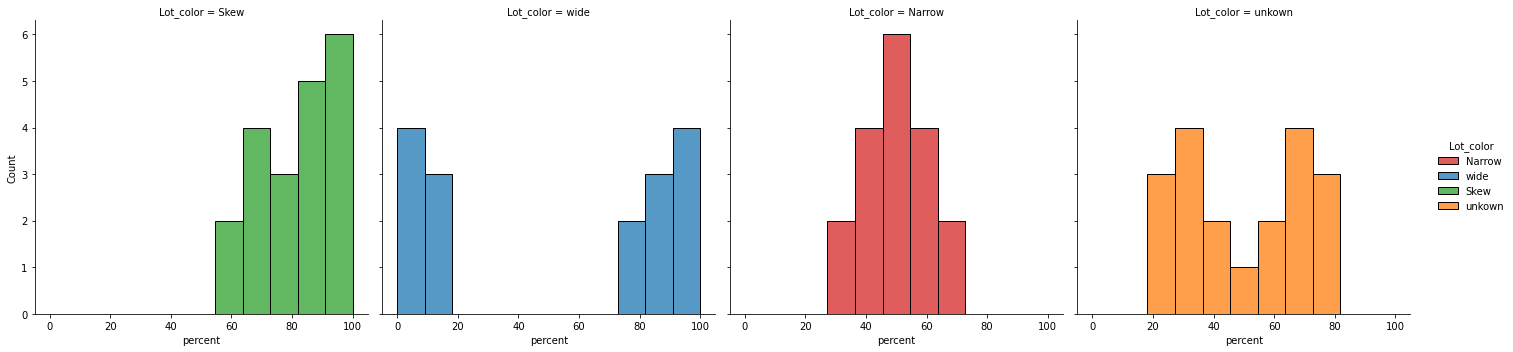

sub-1301


dist      means       stds      skew       sub
0       narrow  48.095238  22.938842 -0.511502  sub-1301
1         skew  74.375000  12.093387 -0.479581  sub-1301
2  True_unkown  77.333333  22.189659 -0.969848  sub-1301
3         wide  32.307692  40.032038  1.181599  sub-1301

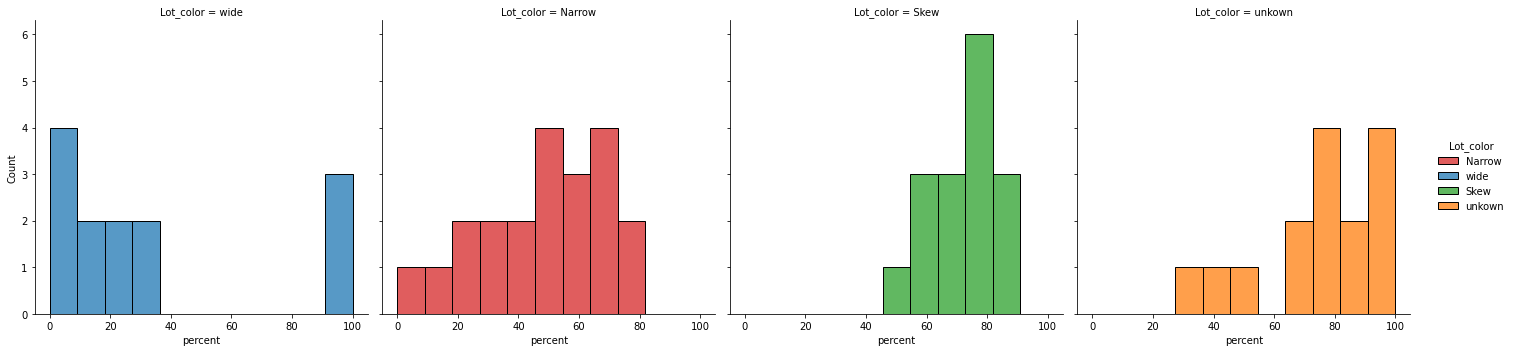

sub-1009


dist      means       stds      skew       sub
0       narrow  39.545455  20.581377 -0.654108  sub-1009
1         skew  70.000000  17.320508  0.245374  sub-1009
2  True_unkown  61.428571  29.880715 -0.463147  sub-1009
3         wide  59.047619  32.078772 -0.688357  sub-1009

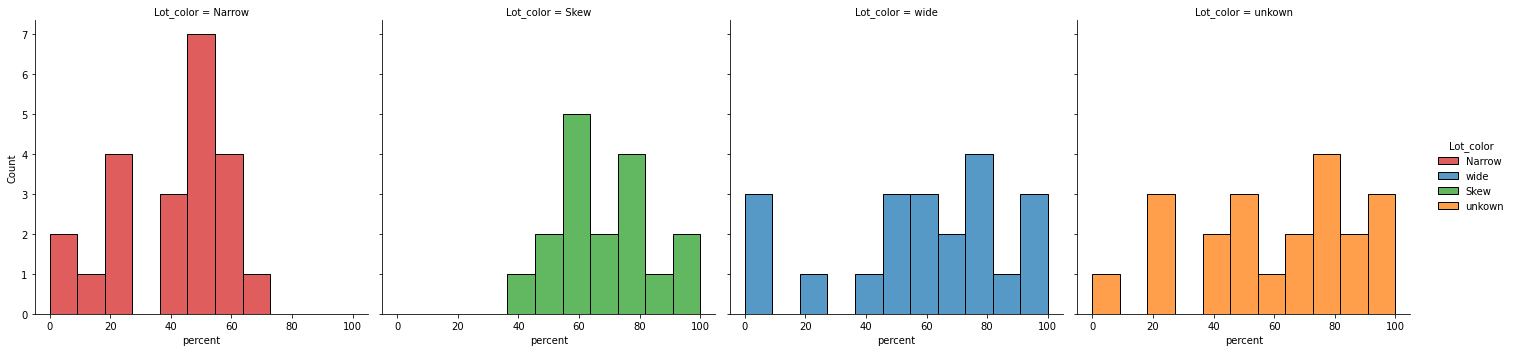

sub-1251


dist      means       stds      skew       sub
0       narrow  38.500000  19.808292  0.049773  sub-1251
1         skew  66.666667  33.431229 -1.298817  sub-1251
2  True_unkown  67.441860  19.529346 -0.386703  sub-1251
3         wide  63.000000  33.576307 -0.919720  sub-1251

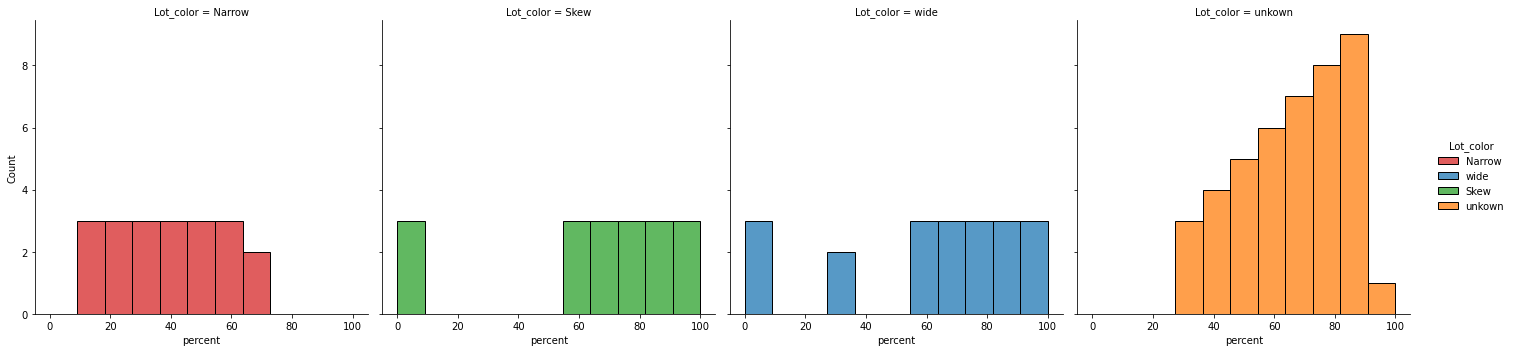

sub-3101


dist      means       stds      skew       sub
0       narrow  26.250000  19.278658  0.101681  sub-3101
1         skew  65.333333  38.334369 -0.920906  sub-3101
2  True_unkown  63.103448  33.284858 -0.697672  sub-3101
3         wide  87.500000   7.537784  0.477594  sub-3101

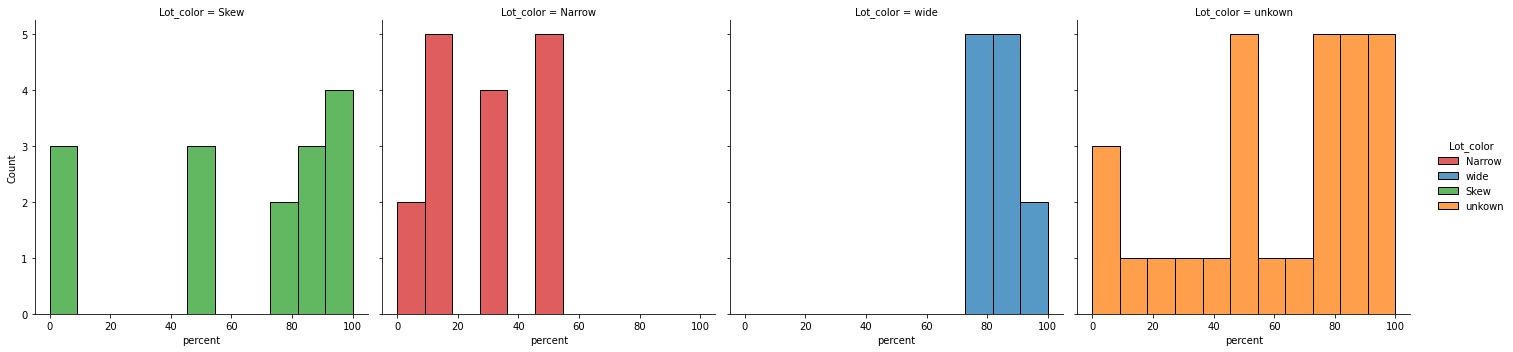

sub-3176


dist      means       stds      skew       sub
0       narrow  40.000000  20.000000 -0.865385  sub-3176
1         skew  78.571429  15.619092  0.132663  sub-3176
2  True_unkown  54.090909  22.180878  0.118531  sub-3176
3         wide  61.111111  16.764419  0.815334  sub-3176

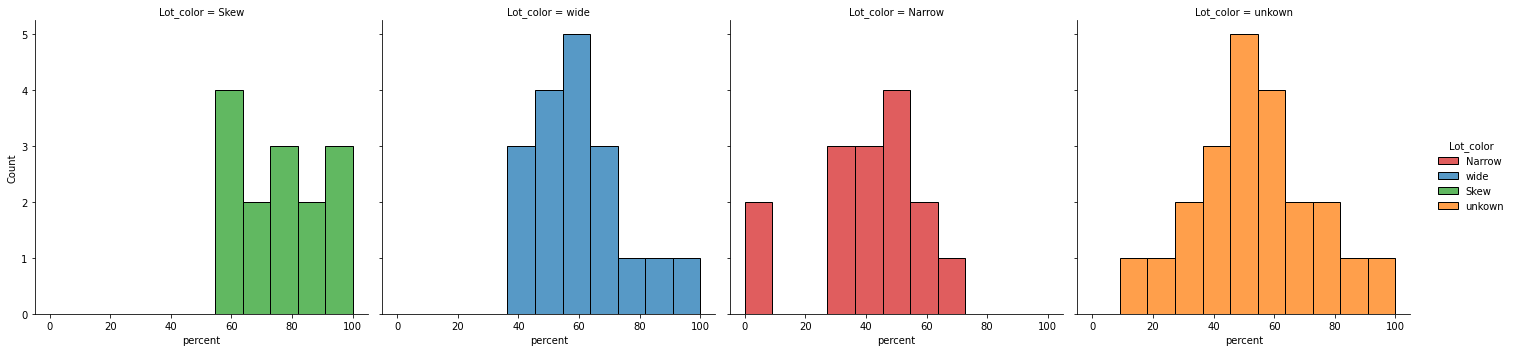

sub-3116


dist      means       stds      skew       sub
0       narrow  70.000000  14.770979 -0.812404  sub-3116
1         skew  52.500000   8.506963 -0.534322  sub-3116
2  True_unkown  56.086957  30.072376 -0.568520  sub-3116
3         wide  50.000000  42.257713  0.000000  sub-3116

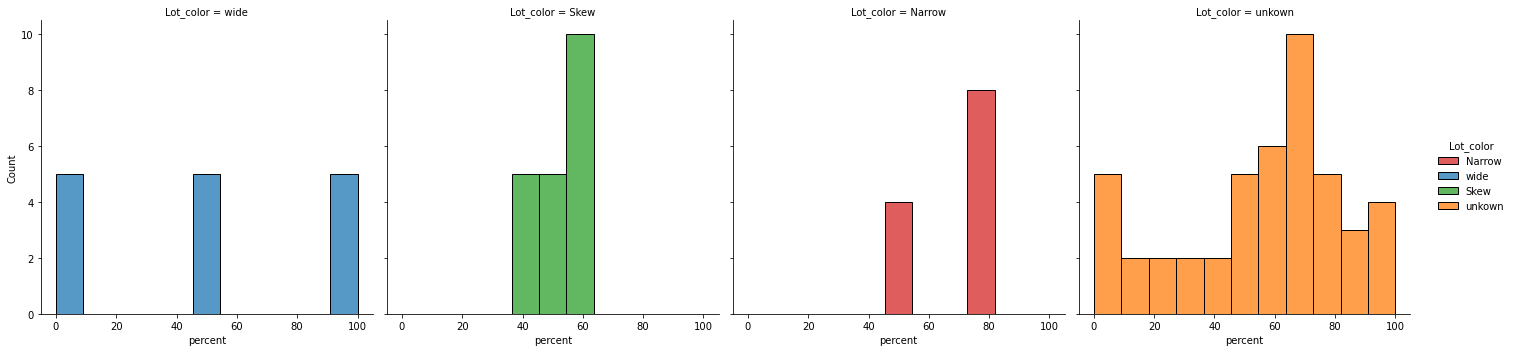

sub-3175


dist      means       stds      skew       sub
0       narrow  39.047619  19.469145 -0.212089  sub-3175
1         skew  80.526316  13.112201 -0.272374  sub-3175
2  True_unkown  67.200000  20.518285 -0.123617  sub-3175
3         wide  84.444444  11.991282 -0.313675  sub-3175

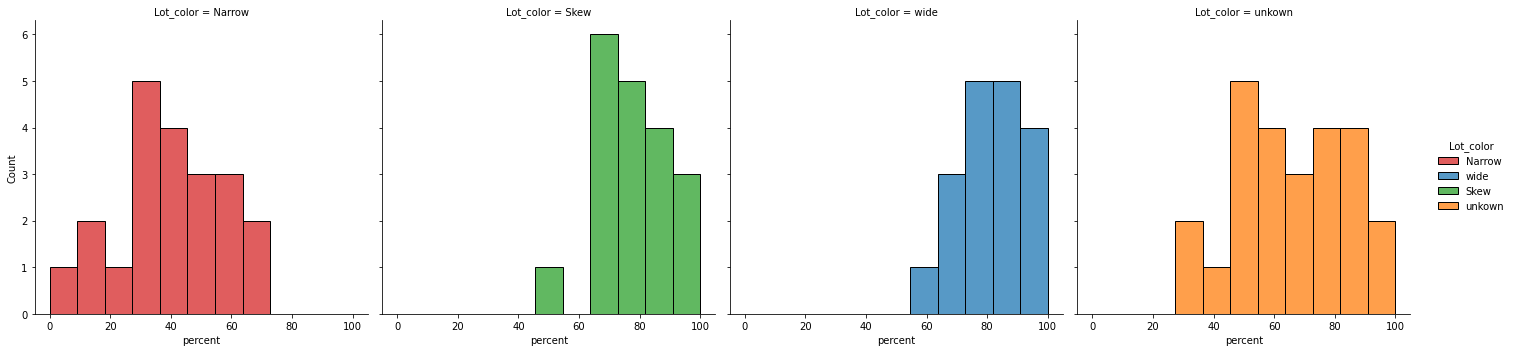

sub-1243


dist      means       stds      skew       sub
0       narrow  32.142857  14.769288  0.073336  sub-1243
1         skew  73.125000  20.564938 -0.060980  sub-1243
2  True_unkown  43.846154  25.993096 -0.265194  sub-1243
3         wide  52.941176  40.583972 -0.114401  sub-1243

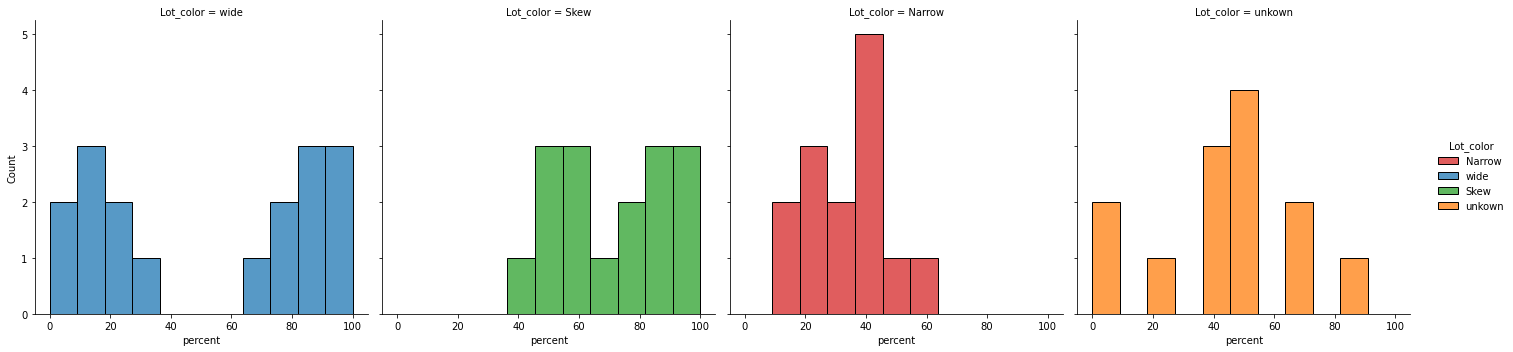

sub-3173


dist      means       stds      skew       sub
0       narrow  53.888889   9.785276  0.349658  sub-3173
1         skew  80.384615  13.410673 -0.183070  sub-3173
2  True_unkown  25.882353  11.213175 -0.249289  sub-3173
3         wide  50.000000  36.562851 -0.057428  sub-3173

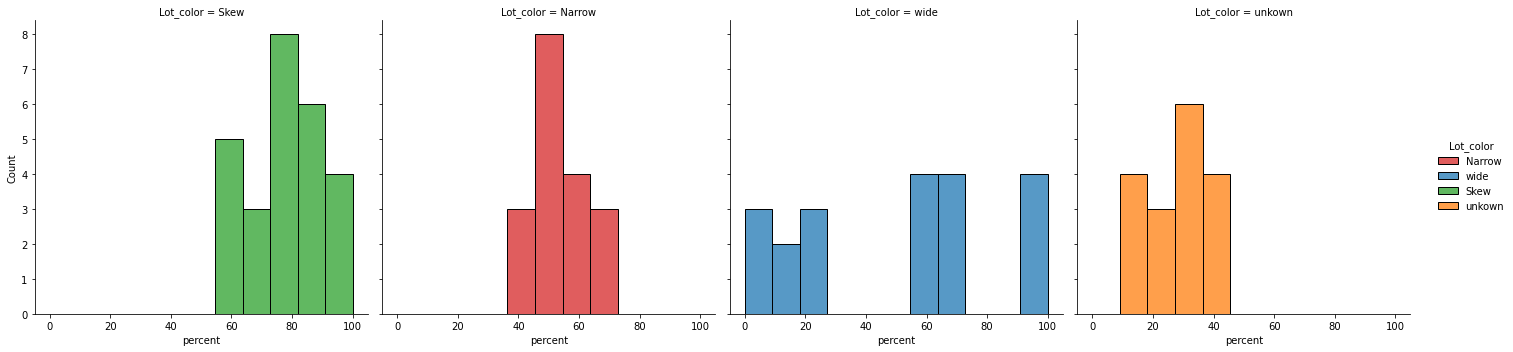

sub-3152


dist      means       stds      skew       sub
0       narrow  21.250000  13.601471 -0.073805  sub-3152
1         skew  74.736842  15.043796  0.056379  sub-3152
2  True_unkown  50.000000   7.254763  0.000000  sub-3152
3         wide  47.647059  47.503870  0.126264  sub-3152

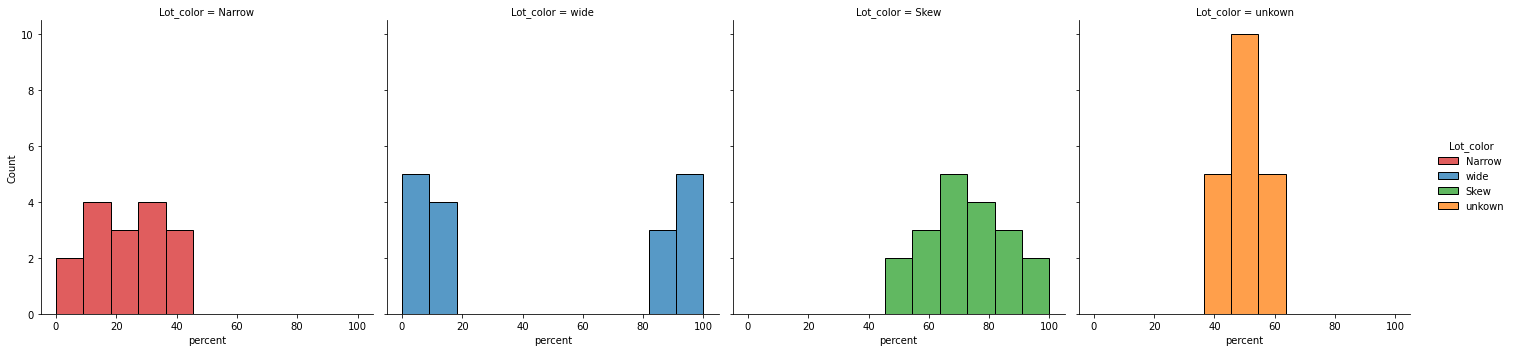

sub-1001


dist      means       stds      skew       sub
0       narrow  22.222222  19.860625  0.222881  sub-1001
1         skew  83.000000  11.595018  0.342125  sub-1001
2  True_unkown  47.419355  25.686279 -0.223343  sub-1001
3         wide  52.727273  33.493554  0.100812  sub-1001

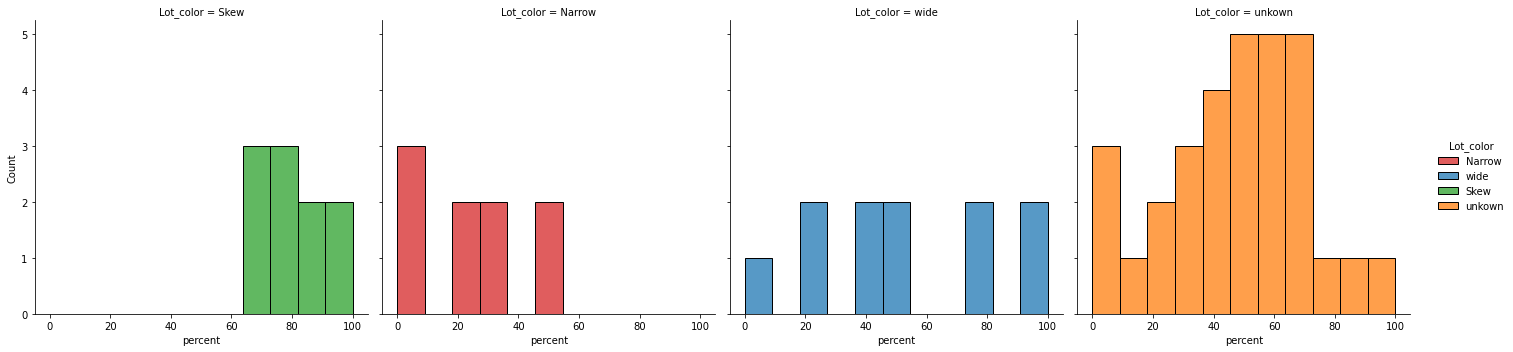

sub-1276
sub-1247
sub-3140


dist      means       stds      skew       sub
0       narrow  45.789474  17.099639 -0.150261  sub-3140
1         skew  62.400000  26.025628 -0.779465  sub-3140
2  True_unkown  49.090909  29.706760  0.113627  sub-3140
3         wide  56.666667  32.392520 -0.435083  sub-3140

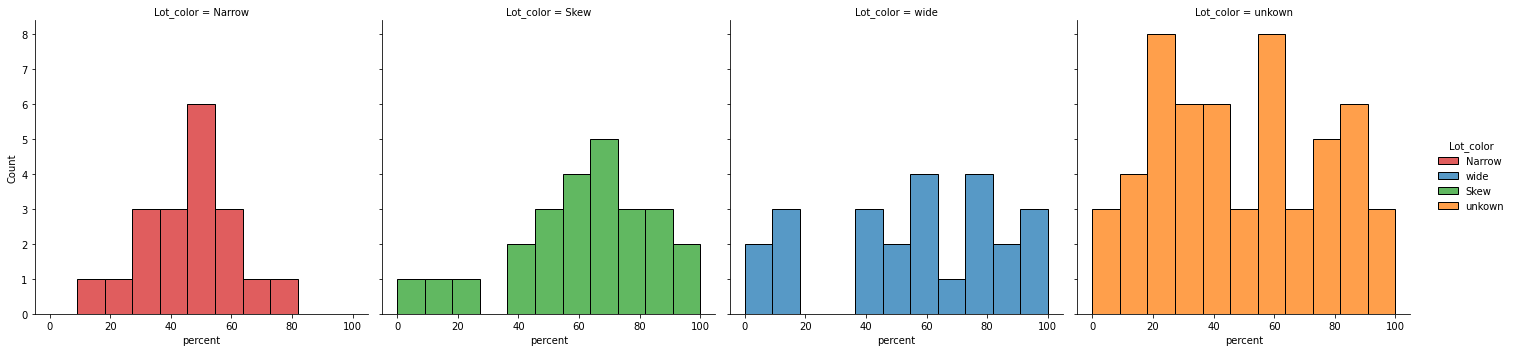

sub-1012


dist      means       stds      skew       sub
0       narrow  50.000000  20.493902  0.000000  sub-1012
1         skew  58.888889  22.072143 -0.821803  sub-1012
2  True_unkown  50.000000  43.969687  0.000000  sub-1012
3         wide  50.000000  41.598495  0.000000  sub-1012

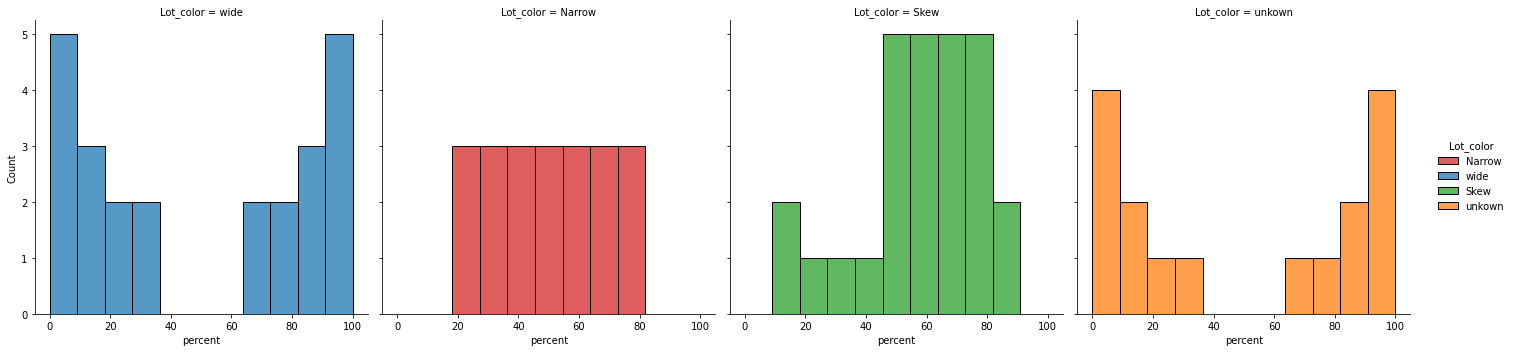

sub-3125


dist      means       stds      skew       sub
0       narrow  47.142857  12.666474  0.097334  sub-3125
1         skew  81.818182  11.677484  0.498585  sub-3125
2  True_unkown  50.000000  52.704628  0.000000  sub-3125
3         wide  50.714286  47.143690 -0.021343  sub-3125

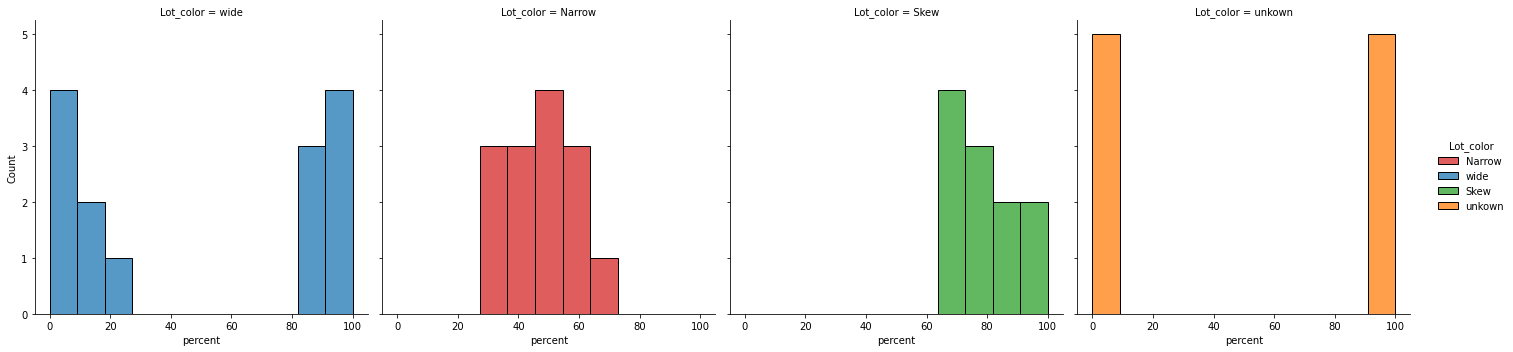

sub-3206


dist      means       stds      skew       sub
0       narrow  54.285714  16.967972  0.087727  sub-3206
1         skew  82.307692  19.215378 -1.219233  sub-3206
2  True_unkown  53.750000  37.215588 -0.320117  sub-3206
3         wide  49.333333  41.827309 -0.087859  sub-3206

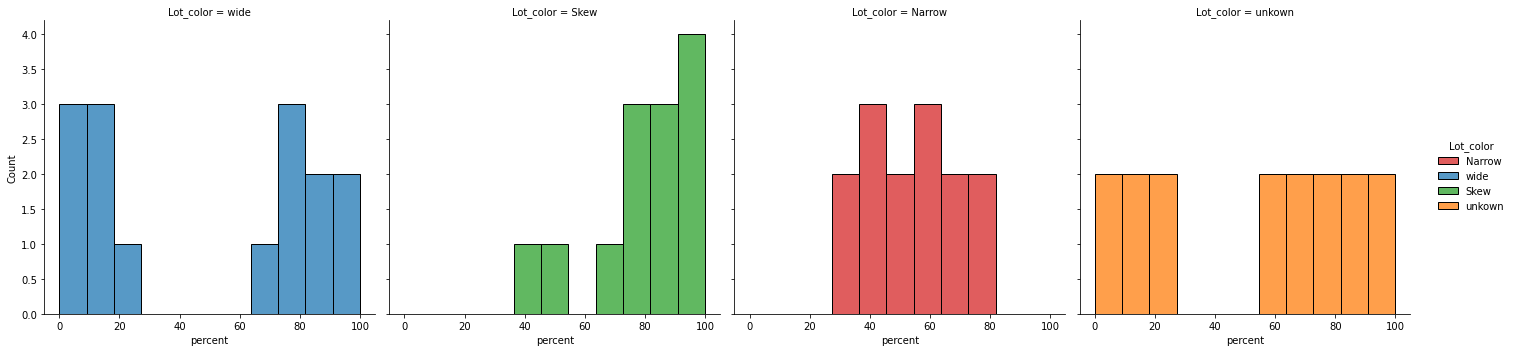

sub-1013


dist      means       stds      skew       sub
0       narrow  49.523810  12.835961 -0.216630  sub-1013
1         skew  74.761905  14.006801  0.234848  sub-1013
2  True_unkown  81.692308  16.160255 -0.627107  sub-1013
3         wide  54.062500  32.513955 -0.166728  sub-1013

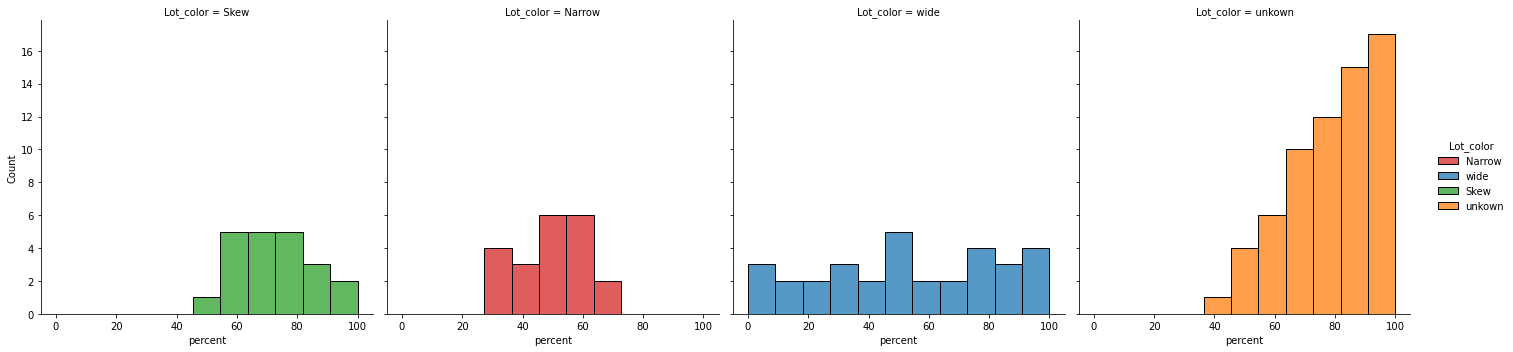

sub-1021


dist      means       stds      skew       sub
0       narrow  21.666667  16.020820  1.353758  sub-1021
1         skew  69.166667  17.816404  0.727923  sub-1021
2  True_unkown  64.000000  21.186998  0.392544  sub-1021
3         wide  63.571429  21.699749  0.200036  sub-1021

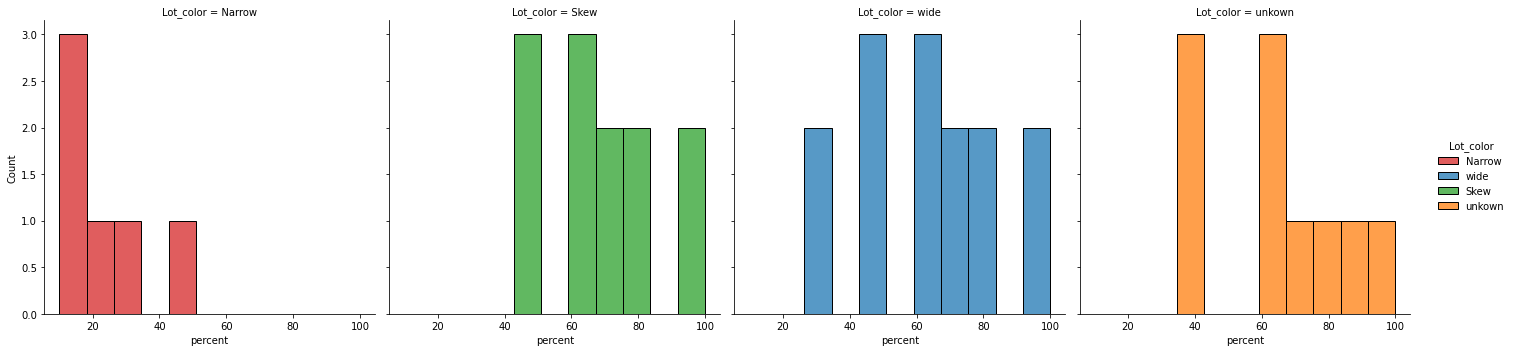

sub-1245


dist  means       stds      skew       sub
0       narrow     61   8.755950 -0.223451  sub-1245
1         skew     87  11.595018 -0.342125  sub-1245
2  True_unkown     46  20.655911  2.280673  sub-1245
3         wide     50  48.762463  0.000000  sub-1245

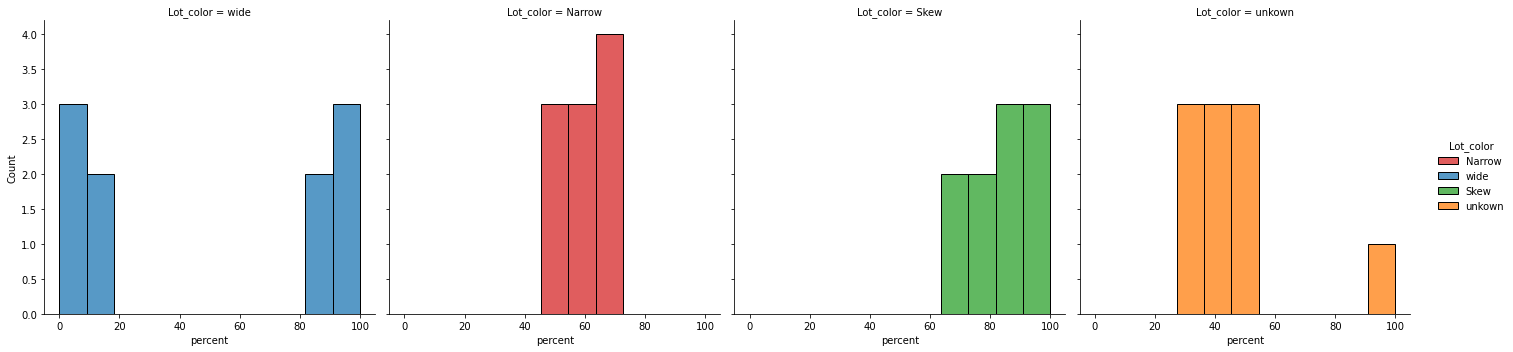

sub-1011


dist      means       stds      skew       sub
0       narrow  45.833333   9.962049 -0.274324  sub-1011
1         skew  82.500000  11.254629 -0.240503  sub-1011
2  True_unkown  27.368421  22.568933  1.953808  sub-1011
3         wide  50.000000  48.843774 -0.093361  sub-1011

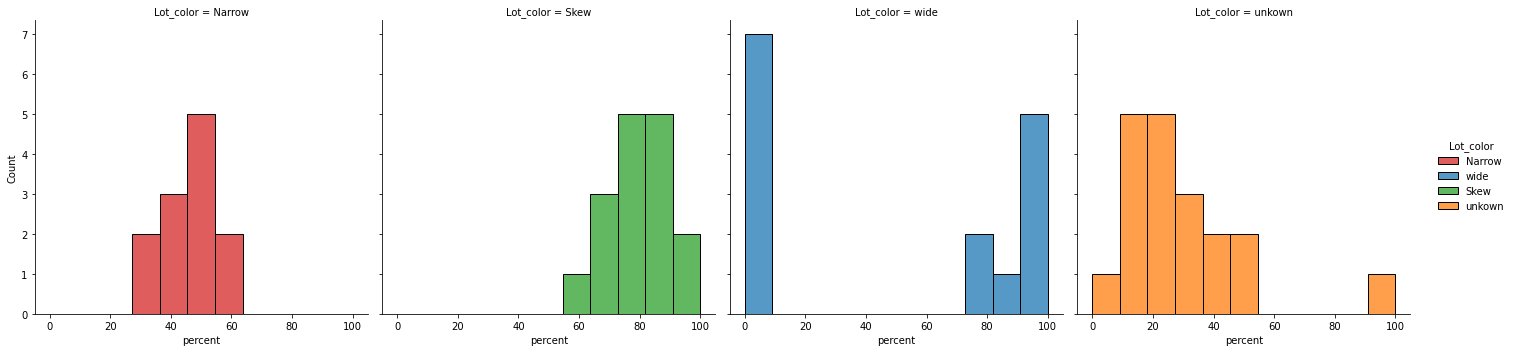

sub-1286


dist      means       stds      skew       sub
0       narrow  39.166667  36.545945  0.549212  sub-1286
1         skew  63.529412  31.808249 -0.827908  sub-1286
2  True_unkown  62.000000  25.410909 -0.951147  sub-1286
3         wide  50.000000  32.732684 -0.239704  sub-1286

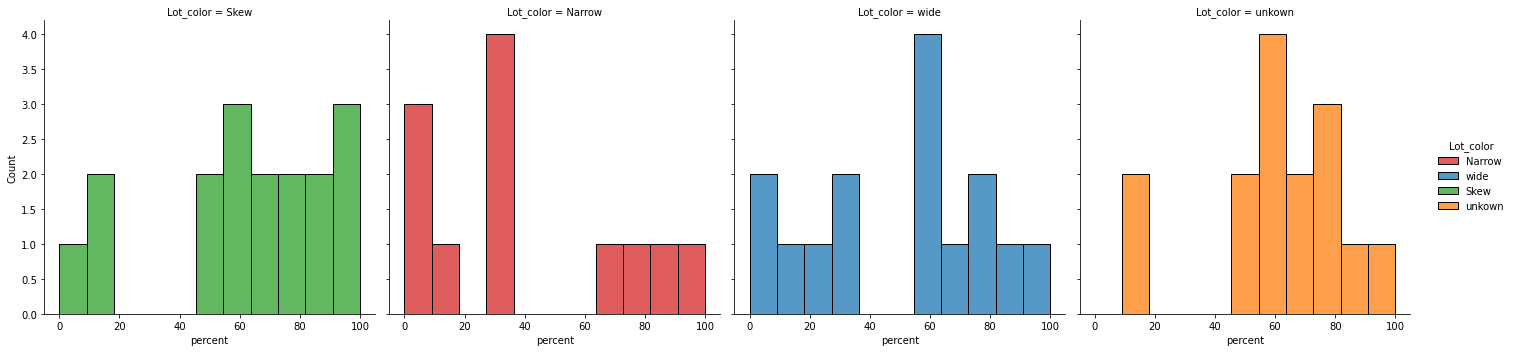

sub-3146


dist      means       stds      skew       sub
0       narrow  62.777778  20.524177  0.037799  sub-3146
1         skew  71.250000  17.078251 -0.312607  sub-3146
2  True_unkown  30.666667  21.865389  2.504038  sub-3146
3         wide  58.461538  44.692683 -0.508941  sub-3146

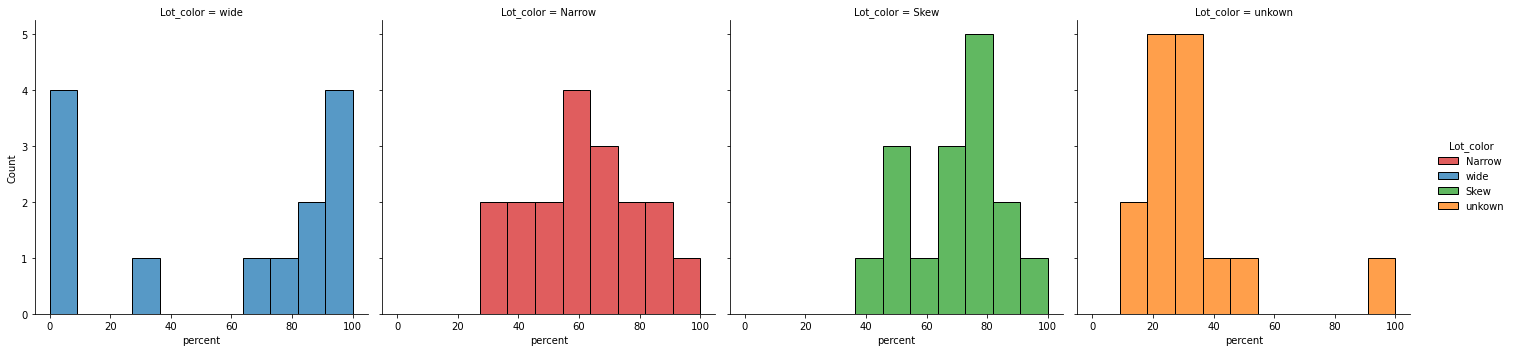

sub-1015


dist      means       stds      skew       sub
0       narrow  51.000000  22.509257  0.053675  sub-1015
1         skew  81.304348  12.174619 -0.270665  sub-1015
2  True_unkown  50.833333  26.689302  0.142277  sub-1015
3         wide  15.263158  16.454794  0.700687  sub-1015

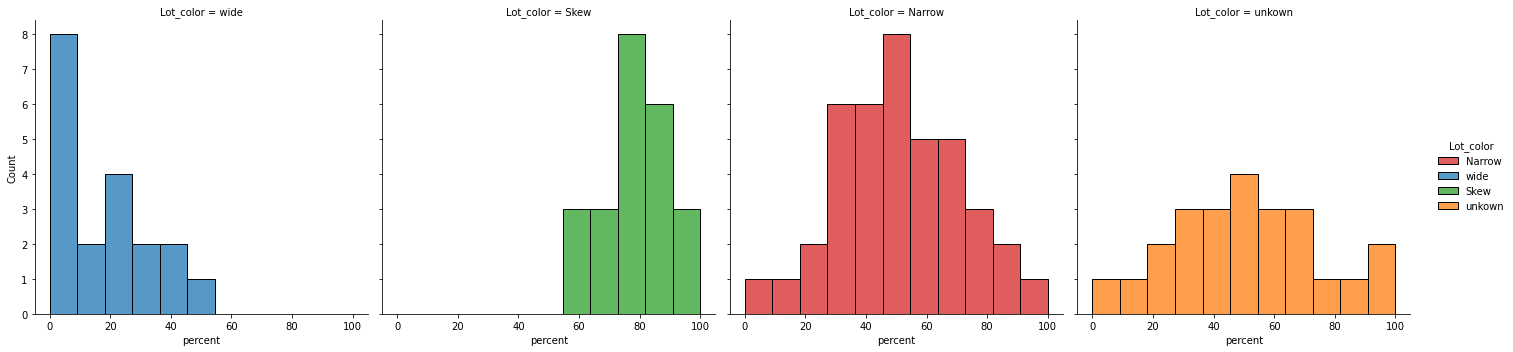

sub-1282


dist      means       stds      skew       sub
0       narrow  42.222222  16.647047 -0.395985  sub-1282
1         skew  74.444444  17.225911 -0.399268  sub-1282
2  True_unkown  50.526316  18.995229  0.350982  sub-1282
3         wide  57.777778  26.910649 -0.243569  sub-1282

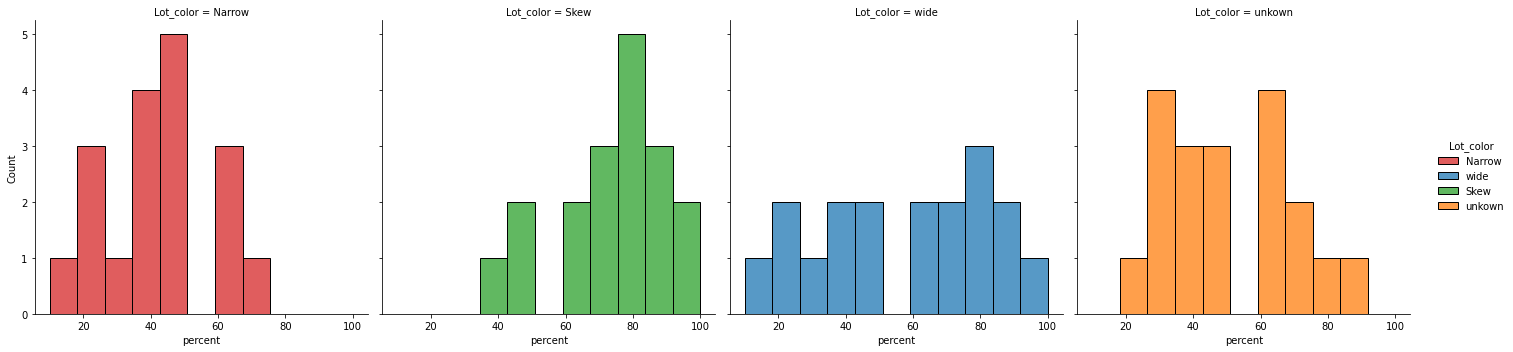

sub-3167


dist      means       stds      skew       sub
0       narrow  54.285714   8.701396 -0.010271  sub-3167
1         skew  65.833333  26.029526 -0.547226  sub-3167
2  True_unkown  49.354839  35.677769  0.287101  sub-3167
3         wide  45.294118  38.473548  0.209834  sub-3167

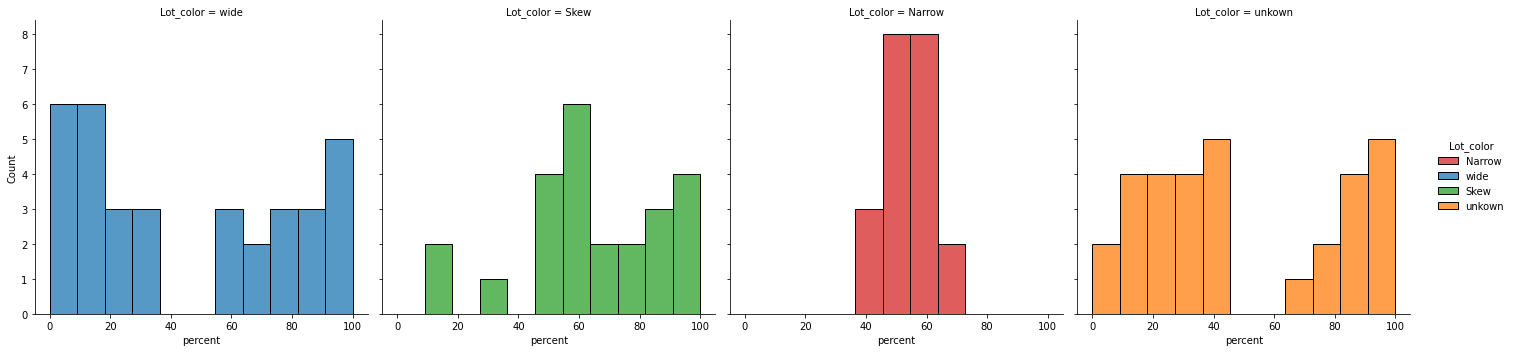

sub-3170


dist      means       stds      skew       sub
0       narrow  54.666667  12.459458 -0.296194  sub-3170
1         skew  76.428571   9.287827  0.185161  sub-3170
2  True_unkown  95.000000   5.222330  0.000000  sub-3170
3         wide  36.428571  43.607893  0.652037  sub-3170

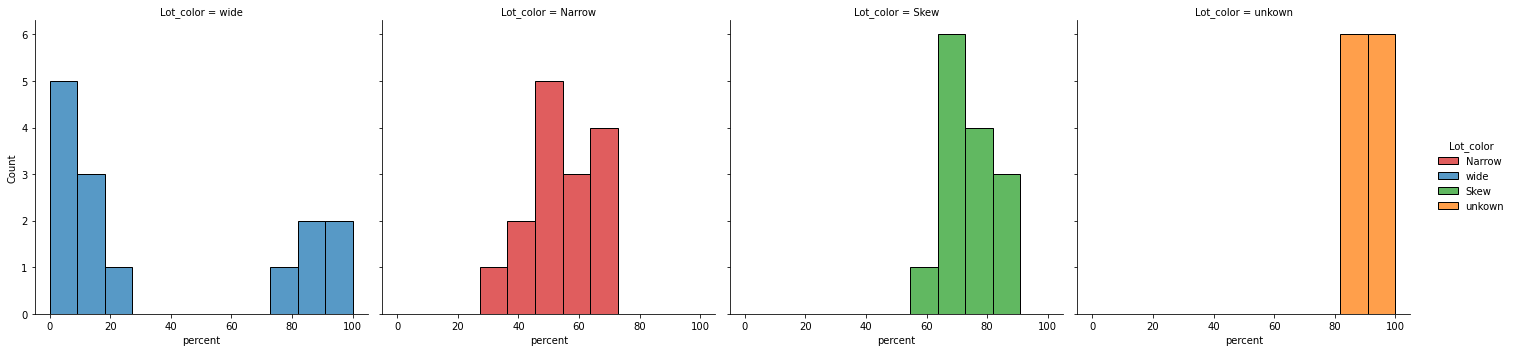

sub-3178


dist  means  stds  skew       sub
0       narrow     60   NaN   NaN  sub-3178
1         skew     90   NaN   NaN  sub-3178
2  True_unkown     60   NaN   NaN  sub-3178
3         wide     80   NaN   NaN  sub-3178

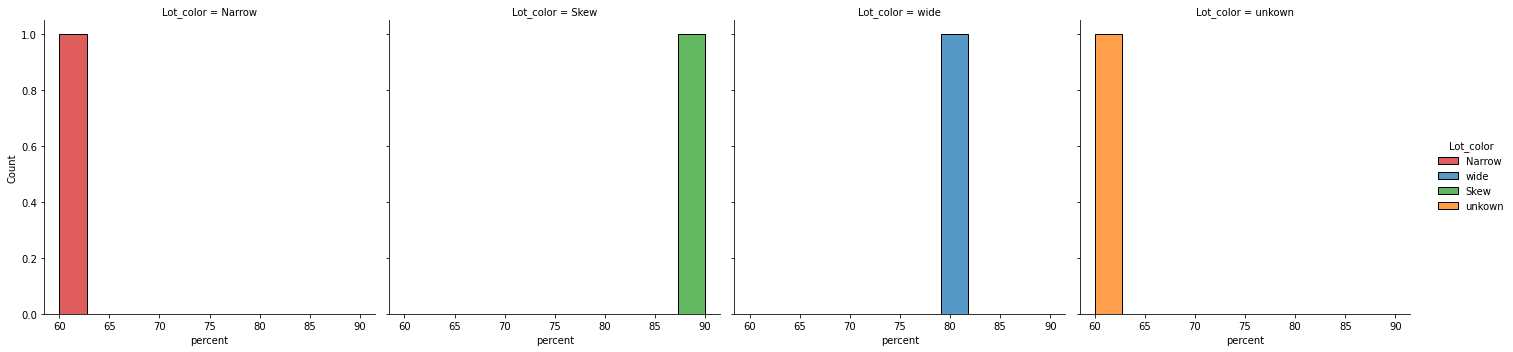

sub-3190


dist      means       stds      skew       sub
0       narrow  48.421053  21.670040 -0.139647  sub-3190
1         skew  70.000000  35.276684 -1.025060  sub-3190
2  True_unkown  39.545455  28.863764  0.219701  sub-3190
3         wide  44.782609  21.504664  1.414237  sub-3190

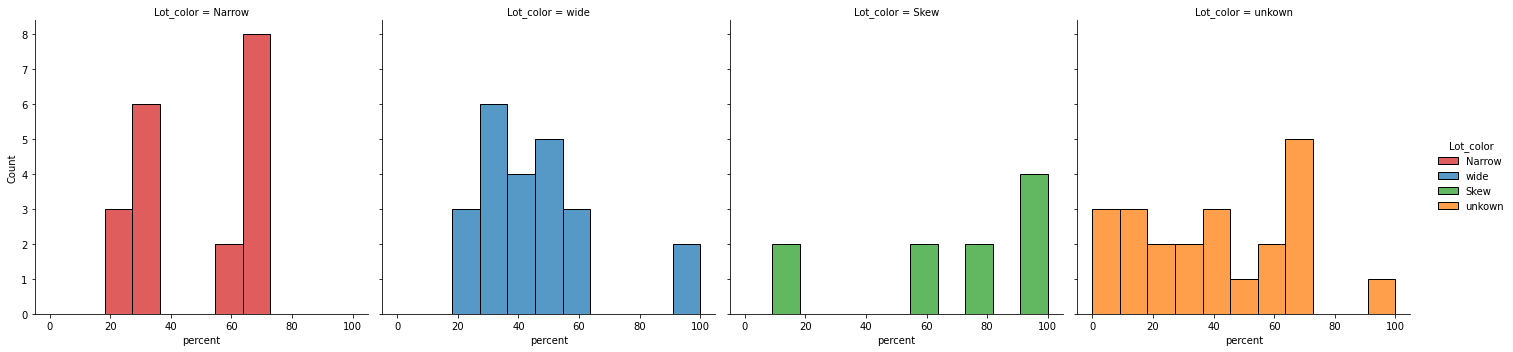

sub-1248


dist      means       stds      skew       sub
0       narrow  55.625000  20.966243  1.115053  sub-1248
1         skew  80.000000   9.258201  0.000000  sub-1248
2  True_unkown  29.523810  23.124920  0.331951  sub-1248
3         wide  56.764706  28.995359 -0.275471  sub-1248

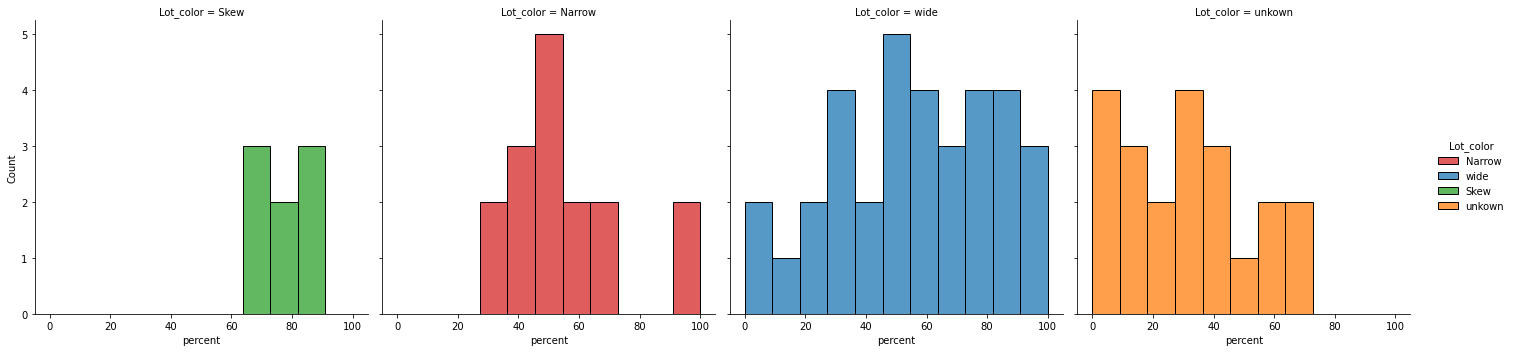

In [5]:
#with open('../data/sub-1013/1013_ManipulationCheck.pdf', 'rb') as f:
sub_df=[]
for sub in os.listdir('../data'):
    sub=sub[4:]
    checkFile='../data/sub-%s/%s_ManipulationCheck.pdf'%(sub,sub)
    if os.path.exists(checkFile):
        print('sub-%s'%(sub))
        f = PyPDF2.PdfFileReader(checkFile)
        ff = f.getFields()
        
        red=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='red')]['dist'].values[0]
        green=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='green')]['dist'].values[0]
        blue=df_r[(df_r['sub']=='sub-'+sub)&(df_r['Lot_color']=='blue')]['dist'].values[0]

        columns=np.array(['sub','best','worst',
                 red+'_0',red+'_10',red+'_20',red+'_30',red+'_40',red+'_50',red+'_60',red+'_70',red+'_80',red+'_90',red+'_100',
                 green+'_0',green+'_10',green+'_20',green+'_30',green+'_40',green+'_50',green+'_60',green+'_70',green+'_80',green+'_90',green+'_100',
                 blue+'_0',blue+'_10',blue+'_20',blue+'_30',blue+'_40',blue+'_50',blue+'_60',blue+'_70',blue+'_80',blue+'_90',blue+'_100',
                 'Acc_0','Acc_10','Acc_20','Acc_30','Acc_40','Acc_50','Acc_60','Acc_70','Acc_80','Acc_90','Acc_100',
                'unkown_0','unkown_10','unkown_20','unkown_30','unkown_40','unkown_50','unkown_60','unkown_70','unkown_80','unkown_90','unkown_100']).transpose()
        data=[ff[i]['/V'] for i in ff]

        df=pd.DataFrame(data=[data],columns=columns).melt(id_vars=['sub','best','worst'])
        df.replace('', 0, inplace=True) 
        df['value']=pd.to_numeric(df['value'],errors='coerce').fillna(0)
        
        df['Lot_color'] = df.variable.str.split('_', expand = True)[0]
        df['percent'] = pd.to_numeric(df.variable.str.split('_', expand = True)[1])
        df.percent=df.percent.astype(int)
        df['value']=df['value'].astype(int)
        df=pd.DataFrame(df.values.repeat(df.value, axis=0), columns=df.columns)
        df=df[df['Lot_color']!='Acc']
        df.percent=df.percent.apply(pd.to_numeric,errors='coerce')

        #display(df)
        #df=df[df['color']=='G']
        #sns.histplot(x='percent',data=df,color='Green',element='step',fill=True,bins=11,stat='probability')
        if sub!='3186':
            if np.any(df):
                mem_df=pd.DataFrame()
                mem_df['dist']=['narrow','skew','True_unkown','wide']
                mem_df['means']=df.groupby('Lot_color').mean()['percent'].values
                mem_df['stds']=df.groupby('Lot_color').std()['percent'].values
                mem_df['skew']=df.groupby('Lot_color').skew()['percent'].values
                mem_df['sub']='sub-%s'%(sub)
                display(mem_df)
                sub_df.append(mem_df)

                sns.displot(df, x="percent", col="Lot_color",hue='Lot_color',
                            hue_order=['Narrow','wide','Skew','unkown'], 
                            col_order=['Narrow','wide','Skew','unkown'],
                            palette=['tab:red','tab:blue','tab:green','tab:orange'],
                            bins=11)

                if sub=='test':
                    plt.savefig("test_dists.svg")
                plt.show()
           
            #display(df.groupby('Lot_color').mean(),df.groupby('Lot_color').std())
sub_df=pd.concat(sub_df)


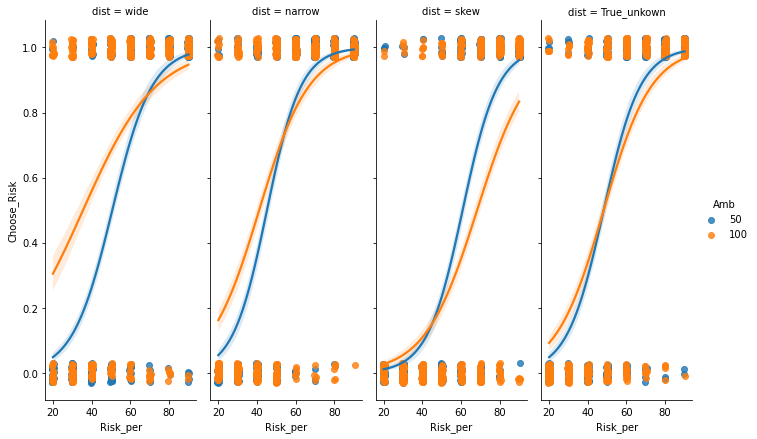

In [6]:

graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=df_a ,col='dist',height=6, aspect=.4,
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)



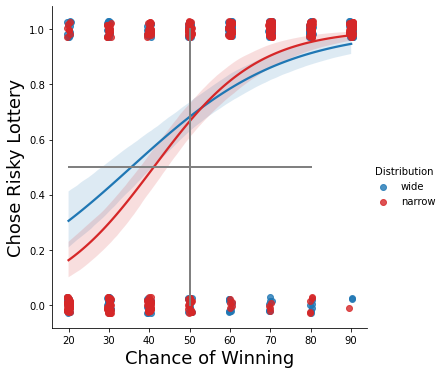

In [7]:
if 1==1:
    plotData=df_a[df_a['dist'].isin(['wide','narrow'])] # We need to get rid of the skew to make it fair
    plotData=plotData[plotData['Amb']==100]
    
    g=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
               hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,palette=['tab:blue','tab:red'])
    plt.xlabel('Chance of Winning').set_fontsize('18')
    plt.ylabel('Chose Risky Lottery').set_fontsize('18')
    
    g._legend.set_title("Distribution")
    
    plt.plot([20,80], [0.5,0.5], linewidth=2,color='grey')
    plt.plot([50,50], [0,1], linewidth=2,color='grey')

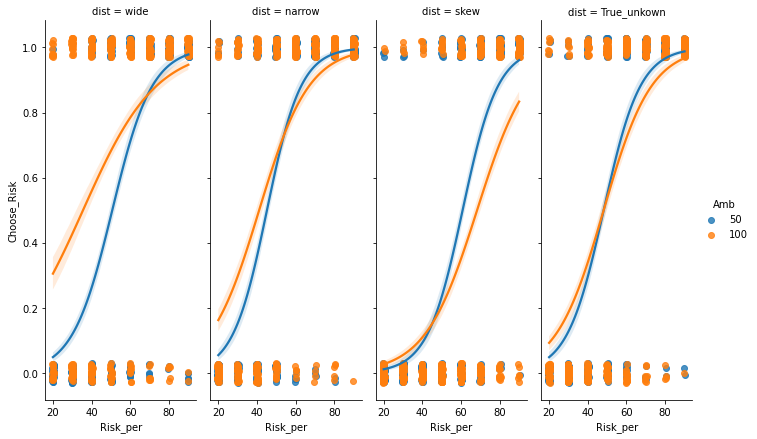

In [8]:

graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=df_a ,col='dist',height=6, aspect=.4,
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)



# Axiom: Efficiently compound lotteries
- [x] Do participants show aversion to second order variance in the 100% ambiguous case?
    Yes

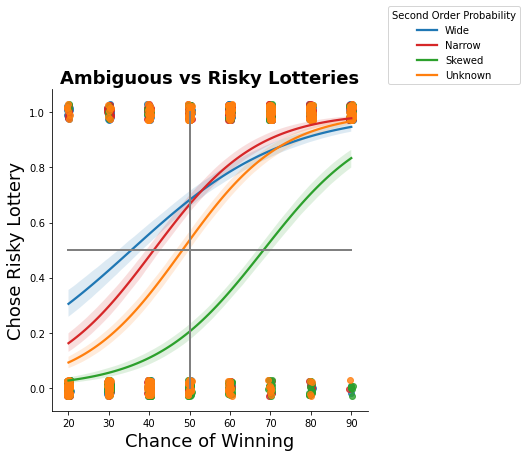

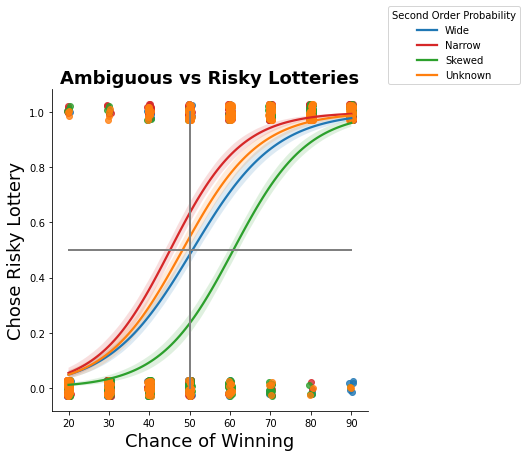

In [9]:
plotData=df_a[df_a['Amb']==100]
#plotData=plotData[plotData['dist'].isin(['wide','narrow'])]
    
ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',palette=['tab:blue','tab:red','tab:green','tab:orange'],
              logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68,legend=False)

plt.legend(title='Second Order Probability',bbox_to_anchor=(1.5,1),loc='lower right',
           labels=['Wide','Narrow','Skewed','Unknown'])

plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')
plt.xlabel('Chance of Winning').set_fontsize('18')
plt.ylabel('Chose Risky Lottery').set_fontsize('18')

#ax.axhline(y=0.5,color='grey')
#ax.axvline(x=50,color='grey')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

plt.savefig("Choice_behavior.svg")
plotData=df_a[df_a['Amb']==50]
    
ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',palette=['tab:blue','tab:red','tab:green','tab:orange'],
              logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68,legend=False)

plt.legend(title='Second Order Probability',bbox_to_anchor=(1.5,1),loc='lower right',
           labels=['Wide','Narrow','Skewed','Unknown'])

plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')
plt.xlabel('Chance of Winning').set_fontsize('18')
plt.ylabel('Chose Risky Lottery').set_fontsize('18')

#ax.axhline(y=0.5,color='grey')
#ax.axvline(x=50,color='grey')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

plt.savefig("Choice_behavior.svg")

Narrow vs Wide At 100
unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

Formula: Choose_Risk~dist*Risk_per+(1|sub)+(dist|sub)

Family: binomial	 Inference: parametric

Number of observations: 780	 Groups: {'sub': 51.0}

Log-likelihood: -342.389 	 AIC: 700.779

Random effects:

              Name    Var    Std
sub    (Intercept)  0.205  0.452
sub.1  (Intercept)  1.488  1.220
sub.1     distwide  2.681  1.637

               IV1       IV2   Corr
sub.1  (Intercept)  distwide -0.766

Fixed effects:



Estimate    2.5_ci   97.5_ci        SE        OR  \
(Intercept)       -4.079403 -5.141159 -3.017647  0.541722  0.016918   
distwide           1.736637  0.362254  3.111021  0.701229  5.678217   
Risk_per           0.098885  0.077247  0.120524  0.011040  1.103940   
distwide:Risk_per -0.033583 -0.060975 -0.006190  0.013976  0.966975   

                   OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci  \
(Intercept)         0.005851    0.048916  0.016636     0.005817      0.046635   
distwide            1.436564   22.443941  0.850259     0.589586      0.957345   
Risk_per            1.080309    1.128088  0.524701     0.519302      0.530095   
distwide:Risk_per   0.940846    0.993829  0.491605     0.484761      0.498452   

                     Z-stat         P-val  Sig  
(Intercept)       -7.530433  5.057230e-14  ***  
distwide           2.476563  1.326544e-02    *  
Risk_per           8.956825  3.341615e-19  ***  
distwide:Risk_per -2.402882  1.626642e-02    *

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


DF          SS          MS      F-stat
0   1    1.970467    1.970467    1.970467
1   1  170.872058  170.872058  170.872058
2   1    7.472620    7.472620    7.472620

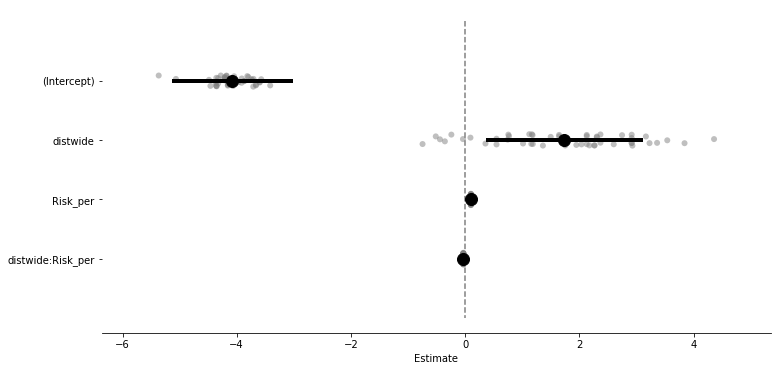

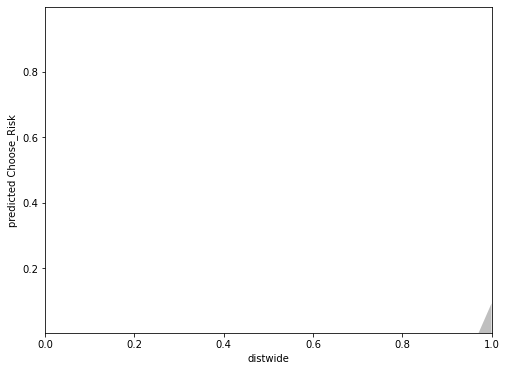

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer,Lm

print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb']==100)]

model = Lmer("Choose_Risk ~dist*Risk_per+(1|sub)+(dist|sub)", data=mod_df, family='binomial')
model.fit(robust="hcl")
display(model.coefs)

model.plot_summary()
model.plot("distwide", plot_ci=True, ylabel="predicted Choose_Risk")


display(model.anova())
# Pairwise comparisons



array(['sub-1240', 'sub-1302', 'sub-3218', 'sub-1300', 'sub-1007',
       'sub-3212', 'sub-3166', 'sub-1242', 'sub-3210', 'sub-3200',
       'sub-1253', 'sub-3164', 'sub-3122', 'sub-1294', 'sub-3199',
       'sub-1010', 'sub-1301', 'sub-1009', 'sub-1251', 'sub-3101',
       'sub-3176', 'sub-3116', 'sub-3175', 'sub-1243', 'sub-3173',
       'sub-3152', 'sub-1001', 'sub-3140', 'sub-1012', 'sub-3125',
       'sub-3206', 'sub-1013', 'sub-1021', 'sub-1245', 'sub-1011',
       'sub-1286', 'sub-3146', 'sub-1015', 'sub-1282', 'sub-3167',
       'sub-3170', 'sub-3178', 'sub-3190', 'sub-1248'], dtype=object)

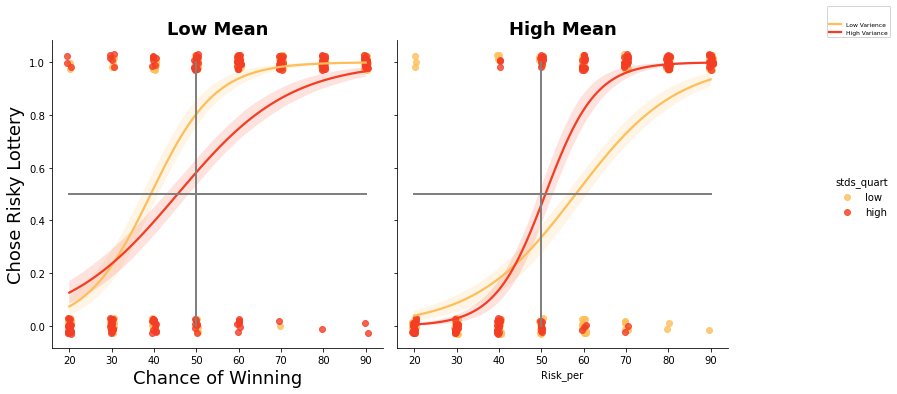

Model failed to converge with max|grad| = 0.0231691 (tol = 0.002, component 1) 

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Formula: Choose_Risk~Risk_per*means_quart*stds_quart+(1|Amb)+(1|sub)

Family: binomial	 Inference: parametric

Number of observations: 697	 Groups: {'sub': 43.0, 'Amb': 2.0}

Log-likelihood: -230.038 	 AIC: 480.076

Random effects:

            Name    Var    Std
sub  (Intercept)  1.312  1.145
Amb  (Intercept)  0.000  0.003

No random effect correlations specified

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE  \
(Intercept)                              -5.327  -6.706   -3.948  0.704   
Risk_per                                  0.128   0.098    0.157  0.015   
means_quartTRUE                          -2.568  -4.836   -0.299  1.158   
stds_quart.L                              1.418  -0.411    3.247  0.933   
Risk_per:means_quartTRUE                  0.020  -0.023    0.064  0.022   
Risk_per:stds_quart.L                    -0.047  -0.086   -0.008  0.020   
means_quartTRUE:stds_quart.L             -4.575  -7.831   -1.319  1.661   
Risk_per:means_quartTRUE:stds_quart.L     0.119   0.056    0.181  0.032   

                                          OR  OR_2.5_ci  OR_97.5_ci   Prob  \
(Intercept)                            0.005      0.001       0.019  0.005   
Risk_per                               1.136      1.103       1.170  0.532   
means_quartTRUE                        0.077      0.008       0.742  0.071   
stds_quart.L                           4.128      0.663      25.710  0.805   
Risk_per:means_quartTRUE               1.021      0.977       1.066  0.505   
Risk_per:stds_quart.L                  0.954      0.918       0.992  0.488   
means_quartTRUE:stds_quart.L           0.010      0.000       0.267  0.010   
Risk_per:means_quartTRUE:stds_quart.L  1.126      1.057       1.199  0.530   

                                       Prob_2.5_ci  Prob_97.5_ci  Z-stat  \
(Intercept)                                  0.001         0.019  -7.571   
Risk_per                                     0.525         0.539   8.472   
means_quartTRUE                              0.008         0.426  -2.218   
stds_quart.L                                 0.399         0.963   1.519   
Risk_per:means_quartTRUE                     0.494         0.516   0.921   
Risk_per:stds_quart.L                        0.479         0.498  -2.385   
means_quartTRUE:stds_quart.L                 0.000         0.211  -2.754   
Risk_per:means_quartTRUE:stds_quart.L        0.514         0.545   3.705   

                                       P-val  Sig  
(Intercept)                            0.000  ***  
Risk_per                               0.000  ***  
means_quartTRUE                        0.027    *  
stds_quart.L                           0.129       
Risk_per:means_quartTRUE               0.357       
Risk_per:stds_quart.L                  0.017    *  
means_quartTRUE:stds_quart.L           0.006   **  
Risk_per:means_quartTRUE:stds_quart.L  0.000  ***

In [11]:
#sns.set_style("white")
mod_df=pd.merge(sub_df,df_a,on=['sub','dist'])

display(mod_df['sub'].unique())
mod_df=mod_df[(mod_df['dist']=='True_unkown')]
#mod_df=mod_df[(mod_df['dist']=='True_unkown')&(mod_df['Amb']==100)]


#mod_df['stds_quart']=pd.qcut(mod_df['stds'],q=2,labels=['low','high'])
#mod_df['means_quart']=pd.qcut(mod_df['means'],q=2,labels=['low','high'])
mod_df['means_quart']=mod_df['means']>50
mod_df['stds_quart']=pd.qcut(mod_df['stds'],q=2,labels=['low','high'])


ax=sns.lmplot(x='Risk_per',y='Choose_Risk', data=mod_df ,col='means_quart',
           hue='stds_quart', palette='YlOrRd',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)

plt.legend(title=' ',bbox_to_anchor=(1.5,1),loc='lower right',prop={'size': 6},
           labels=['Low Varience','High Variance'])
ax.axes[0][0].plot([20,90],[.5,.5],linewidth=2,color='grey')
ax.axes[0][0].plot([50,50],[0,1],linewidth=2,color='grey')

ax.axes[0][1].plot([20,90],[.5,.5],linewidth=2,color='grey')
ax.axes[0][1].plot([50,50],[0,1],linewidth=2,color='grey')

ax.axes[0][0].set_xlabel('Chance of Winning').set_fontsize('18')
ax.axes[0][0].set_ylabel('Chose Risky Lottery').set_fontsize('18')


ax.axes[0][0].set_title('Low Mean',weight='bold').set_fontsize('18')
ax.axes[0][1].set_title('High Mean',weight='bold').set_fontsize('18')

plt.savefig("unkown.svg")
#plt.
#plt.ylabel('Chose Risky Lottery').set_fontsize('18')
plt.show()

model = Lmer("Choose_Risk ~Risk_per*means_quart*stds_quart+(1|Amb)+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

#plt.title('Ambiguous vs Risky Lotteries',weight='bold').set_fontsize('18')


Risk_per  Money  Color  Amb  RiskisLeft response        RT    dist  \
16        20     13   blue  100           0    ['f']  1.983339  narrow   
17        30     13   blue  100           0    ['f']  3.762144  narrow   
18        40     13   blue  100           0    ['j']  1.295977  narrow   
19        50     13   blue  100           1    ['f']  1.478654  narrow   
20        60     13   blue  100           1    ['f']  1.627614  narrow   
..       ...    ...    ...  ...         ...      ...       ...     ...   
27        50     13  green   50           0    ['f']  1.061714  narrow   
28        60     13  green   50           1    ['f']  1.297238  narrow   
29        70     13  green   50           1    ['f']  1.152894  narrow   
30        80     13  green   50           0    ['j']  0.908592  narrow   
31        90     13  green   50           0    ['j']  1.013969  narrow   

         sub  Choose_Risk  
16  sub-1240        False  
17  sub-1240        False  
18  sub-1240         True  
19  sub-1240         True  
20  sub-1240         True  
..       ...          ...  
27  sub-1248        False  
28  sub-1248         True  
29  sub-1248         True  
30  sub-1248         True  
31  sub-1248         True  

[804 rows x 10 columns]

[1] "Model failed to converge with max|grad| = 1.09635 (tol = 0.002, component 1)"
[2] " \n"                                                                         

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

[1] "Model is nearly unidentifiable: large eigenvalue ratio\n - Rescale variables?"
[2] " \n"                                                                          

Formula: Choose_Risk~Amb*Risk_per+(Amb|sub)

Family: binomial	 Inference: parametric

Number of observations: 804	 Groups: {'sub': 51.0}

Log-likelihood: -277.351 	 AIC: 568.702

Random effects:

            Name    Var    Std
sub  (Intercept)  3.844  1.961
sub          Amb  0.000  0.006

             IV1  IV2   Corr
sub  (Intercept)  Amb -0.999

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)    -10.048 -15.005   -5.091  2.529  0.000      0.000       0.006   
Amb              0.060   0.005    0.114  0.028  1.061      1.005       1.121   
Risk_per         0.214   0.107    0.320  0.054  1.238      1.113       1.377   
Amb:Risk_per    -0.001  -0.002    0.000  0.001  0.999      0.998       1.000   

               Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val  Sig  
(Intercept)   0.000        0.000         0.006  -3.973  0.000  ***  
Amb           0.515        0.501         0.529   2.135  0.033    *  
Risk_per      0.553        0.527         0.579   3.942  0.000  ***  
Amb:Risk_per  0.500        0.499         0.500  -1.901  0.057    .

Formula: Choose_Risk~Amb*Risk_per+(Amb|sub)

Family: binomial	 Inference: parametric

Number of observations: 804	 Groups: {'sub': 51.0}

Log-likelihood: -277.351 	 AIC: 568.702

Random effects:

            Name    Var    Std
sub  (Intercept)  3.844  1.961
sub          Amb  0.000  0.006

             IV1  IV2   Corr
sub  (Intercept)  Amb -0.999

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)    -10.048 -15.005   -5.091  2.529  0.000      0.000       0.006   
Amb              0.060   0.005    0.114  0.028  1.061      1.005       1.121   
Risk_per         0.214   0.107    0.320  0.054  1.238      1.113       1.377   
Amb:Risk_per    -0.001  -0.002    0.000  0.001  0.999      0.998       1.000   

               Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val  Sig  
(Intercept)   0.000        0.000         0.006  -3.973  0.000  ***  
Amb           0.515        0.501         0.529   2.135  0.033    *  
Risk_per      0.553        0.527         0.579   3.942  0.000  ***  
Amb:Risk_per  0.500        0.499         0.500  -1.901  0.057    .

Estimate     2.5_ci   97.5_ci        SE        OR  \
(Intercept)  -10.047959 -15.004879 -5.091039  2.529087  0.000043   
Amb            0.059548   0.004893  0.114203  0.027886  1.061357   
Risk_per       0.213555   0.107376  0.319733  0.054174  1.238071   
Amb:Risk_per  -0.001141  -0.002318  0.000036  0.000600  0.998859   

                 OR_2.5_ci  OR_97.5_ci      Prob   Prob_2.5_ci  Prob_97.5_ci  \
(Intercept)   3.044135e-07    0.006152  0.000043  3.044134e-07      0.006114   
Amb           1.004905e+00    1.120980  0.514883  5.012233e-01      0.528520   
Risk_per      1.113353e+00    1.376761  0.553187  5.268182e-01      0.579259   
Amb:Risk_per  9.976846e-01    1.000036  0.499715  4.994205e-01      0.500009   

                Z-stat     P-val  Sig  
(Intercept)  -3.972958  0.000071  ***  
Amb           2.135441  0.032725    *  
Risk_per      3.942027  0.000081  ***  
Amb:Risk_per -1.900664  0.057346    .

<AxesSubplot:xlabel='Estimate'>

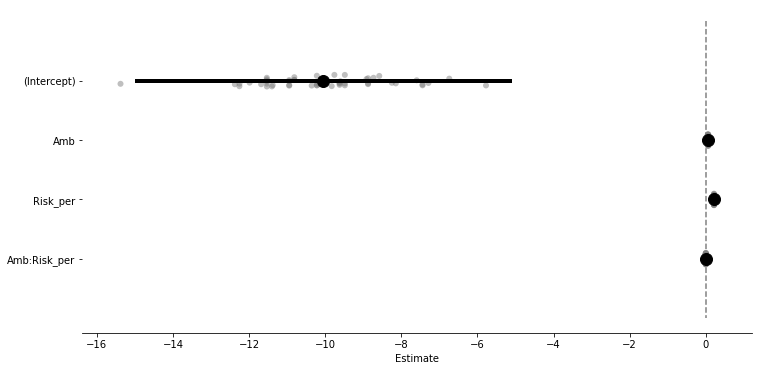

In [12]:
mod_df=df_a[(df_a['dist'].isin(['narrow']))&(df_a['Amb'].isin([50,100]))]
display(mod_df)

model = Lmer("Choose_Risk ~Amb*Risk_per+(Amb|sub)", data=mod_df, family='binomial')
display(model.fit(robust='hcl'))
display(model.summary())
display(model.coefs)

model.plot_summary()

## Individual Differences
- [ ] Beliefs
- [ ] Personality
- [ ] Choice

## Beliefs


dist      means       stds      skew       sub
0       narrow  22.222222  19.860625  0.222881  sub-1001
1         skew  83.000000  11.595018  0.342125  sub-1001
2  True_unkown  47.419355  25.686279 -0.223343  sub-1001
3         wide  52.727273  33.493554  0.100812  sub-1001

Number of subs with Complete Manipulation Checks =45
Test Skew(mean)>Other(mean) t=12.570143930487546 p=3.6840417992699153e-16
Test Wide(std)>Other(std) t=nan p=nan


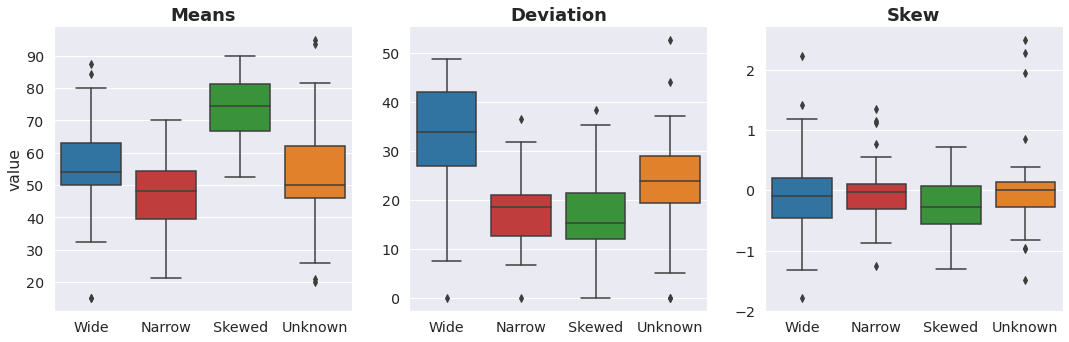

In [13]:
belief_df=sub_df.copy()

display(belief_df[belief_df['sub']=='sub-1001'])

print("Number of subs with Complete Manipulation Checks =%s"%(len(belief_df['sub'].unique())))

plt_df=belief_df.melt(id_vars=['sub','dist'])
#display(plt_df[plt_df['sub']=='sub-1001'])
sns.set(font_scale=1.3)  # crazy big

g=sns.catplot(x='dist',y='value',col='variable',data=plt_df,kind="box",sharey=False,
            order=['wide','narrow','skew','True_unkown'],
            palette=['tab:blue','tab:red','tab:green','tab:orange'])
g.set_axis_labels( "")
g.set_xticklabels(["Wide", "Narrow", "Skewed", "Unknown"])
g.set_titles('Means','Deviation','Skew')
g.axes[0][0].set_title('Means',weight='bold').set_fontsize('18')
g.axes[0][1].set_title('Deviation',weight='bold').set_fontsize('18')
g.axes[0][2].set_title('Skew',weight='bold').set_fontsize('18')
#plt.title("Realtionship Mania and Reported Means",weight='bold').set_fontsize('18')
#plt.xlabel('Reported Variance').set_fontsize('18')
#plt.ylabel('ASRM Score').set_fontsize('18')


from scipy import stats

a=belief_df[belief_df['dist']=='skew']['means']
b=belief_df[belief_df['dist']=='narrow']['means']
t,p=stats.ttest_rel(a,b)
print("Test Skew(mean)>Other(mean) t=%s p=%s"%(t,p))
a=belief_df[belief_df['dist']=='wide']['stds']
b=belief_df[belief_df['dist']=='narrow']['stds']
t,p=stats.ttest_rel(a,b)
print("Test Wide(std)>Other(std) t=%s p=%s"%(t,p))


plt.savefig("dist_memory.svg")

In [14]:
pal=sns.color_palette("tab10")
print(pal.as_hex())
pal


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Personality

In [15]:

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']
to_remove=[col for col in per_df.columns if 'appt2_q' in col]+['participant_id','Event Name']
per_df.drop(columns=to_remove,inplace=True)
per_df=per_df[per_df['sub'].isin(belief_df['sub'])].reset_index(drop=True)

print("A list of mood and clinical inventories")

display(per_df.columns)

display(per_df)

A list of mood and clinical inventories


Index(['Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale',
       'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale',
       'IRI subscale Perspective Taking', 'IRI subscale Fantasy',
       'IRI subscale Empathic Concern', 'IRI subscale Personal Distress',
       'AQ subscale Social Skill', 'AQ subscale Attention Switching',
       'AQ subscale Attention to detail', 'AQ subscale Communication',
       'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing',
       'TEI Subscale selfcontrol', 'TEI Subscale emotionality',
       'TEI Subscale sociability',
       'TEI Total or global trait emotional intelligence', 'TOTAL PNR',
       'PVSS Total Score', 'PVSS Food Subscale',
       'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale',
       'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale',
       'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE',
       'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Su

Total BDI score  TEPS Anticipatory Scale  TEPS Consummatory Scale  \
0              28.0                     52.0                     40.0   
1               4.0                     47.0                     43.0   
2               0.0                     52.0                     50.0   
3              14.0                     27.0                     27.0   
4              11.0                     45.0                     42.0   
5               0.0                     48.0                     39.0   
6               6.0                     50.0                     45.0   
7              10.0                     47.0                     50.0   
8               8.0                     48.0                     49.0   
9              10.0                     21.0                     32.0   
10             24.0                     39.0                     42.0   
11              6.0                     37.0                     47.0   
12              3.0                     42.0                     50.0   
13              3.0                     51.0                     49.0   
14              6.0                     55.0                     52.0   
15              0.0                     34.0                     39.0   
16              2.0                      NaN                      NaN   
17             12.0                     49.0                     53.0   
18             10.0                      NaN                      NaN   
19              0.0                     51.0                     44.0   
20              7.0                     47.0                     50.0   
21             11.0                     46.0                     40.0   
22             14.0                     53.0                     46.0   
23              3.0                      NaN                      NaN   
24              3.0                     54.0                     47.0   
25              9.0                     56.0                     49.0   
26             15.0                      NaN                      NaN   
27             14.0                     54.0                     41.0   
28              NaN                     45.0                     40.0   
29              6.0                      NaN                      NaN   
30              NaN                     55.0                     51.0   
31              NaN                     47.0                     42.0   
32              NaN                      NaN                      NaN   
33              NaN                     44.0                     44.0   
34              NaN                     53.0                     34.0   
35              NaN                     42.0                     39.0   
36              2.0                     46.0                     43.0   
37              NaN                      NaN                      NaN   
38              NaN                     20.0                     36.0   
39              NaN                      NaN                      NaN   

    Total AADIS Score  SUSD Mania Scale  SUSD Depression Scale  \
0                 0.0               5.0                   20.0   
1                 4.0               3.0                    6.0   
2                 0.0               0.0                    0.0   
3                 4.0               8.0                   10.0   
4                 0.0               3.0                    2.0   
5                 0.0               0.0                    0.0   
6                 3.0               2.0                    0.0   
7                 5.0               0.0                    5.0   
8                 2.0               4.0                    2.0   
9                 0.0               0.0                    3.0   
10                4.0               3.0                    5.0   
11                1.0               0.0                    0.0   
12                6.0               1.0                    0.0   
13                3.0               2.0                    2.0   
14                1.

## Choices


Number of subs with Complete Ambiguity Choices =51


sub         dist  Amb  Choose_Risk  Risk_per  Money   Color  \
0   sub-1001  True_unkown   50        False        60      8  yellow   
1   sub-1001  True_unkown   50         True        80      8  yellow   
2   sub-1001  True_unkown  100        False        60      8  yellow   
3   sub-1001  True_unkown  100         True        80      8  yellow   
4   sub-1001       narrow   50        False        80      8   green   
5   sub-1001       narrow   50         True        70      8   green   
6   sub-1001       narrow  100        False        40      8   green   
7   sub-1001       narrow  100         True        80      8   green   
8   sub-1001         skew   50        False        60      8     red   
9   sub-1001         skew   50         True        80      8     red   
10  sub-1001         skew  100        False        70      8     red   
11  sub-1001         skew  100         True        80      8     red   
12  sub-1001         wide   50        False        50      8    blue   
13  sub-1001         wide   50         True        80      8    blue   
14  sub-1001         wide  100        False        50      8    blue   
15  sub-1001         wide  100         True        80      8    blue   

    RiskisLeft response        RT  Max_risk  
0            1    ['j']  2.695651        60  
1            0    ['j']  3.295174        80  
2            1    ['j']  2.378856        60  
3            1    ['f']  1.886913        80  
4            1    ['j']  1.932334        80  
5            1    ['j']  1.354108        70  
6            1    ['j']  2.662421        40  
7            1    ['j']  1.324383        80  
8            0    ['f']  2.000311        60  
9            1    ['j']  2.448564        80  
10           1    ['j']  1.959695        70  
11           1    ['f']  1.536554        80  
12           1    ['j']  3.603561        50  
13           1    ['j']  2.023689        80  
14           1    ['j']  3.408539        50  
15           1    ['j']  1.825292        80

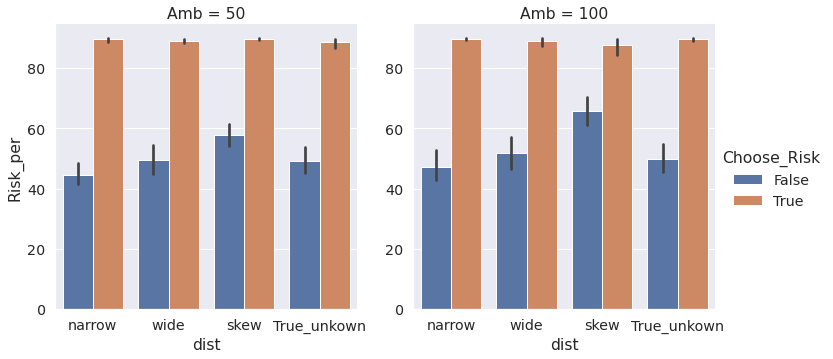

In [16]:
df_aMax=df_a.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()
df_aMax['Max_risk']=df_aMax['Risk_per']
print("Number of subs with Complete Ambiguity Choices =%s"%(len(df_aMax['sub'].unique())))

display(df_aMax[df_aMax['sub']=='sub-1001'])
sns.catplot(x='dist',y='Risk_per',col='Amb',hue='Choose_Risk',
            order=['narrow','wide','skew','True_unkown'],
            data=df_aMax,kind="bar",sharey=False)


## Merge


In [17]:
full_df=belief_df.merge(df_aMax,on=['sub','dist'])
print("Number of subs with Complete Manipulation Checks =%s"%(len(full_df['sub'].unique())))

display(full_df[full_df['sub']=='sub-1001'].head())
full_df=full_df.merge(per_df,on=['sub'])
display(full_df[full_df['sub']=='sub-1001'].head())




Number of subs with Complete Manipulation Checks =44


dist      means       stds      skew       sub  Amb  Choose_Risk  \
405  narrow  22.222222  19.860625  0.222881  sub-1001   50        False   
406  narrow  22.222222  19.860625  0.222881  sub-1001   50         True   
407  narrow  22.222222  19.860625  0.222881  sub-1001  100        False   
408  narrow  22.222222  19.860625  0.222881  sub-1001  100         True   
409    skew  83.000000  11.595018  0.342125  sub-1001   50        False   

     Risk_per  Money  Color  RiskisLeft response        RT  Max_risk  
405        80      8  green           1    ['j']  1.932334        80  
406        70      8  green           1    ['j']  1.354108        70  
407        40      8  green           1    ['j']  2.662421        40  
408        80      8  green           1    ['j']  1.324383        80  
409        60      8    red           0    ['f']  2.000311        60

dist      means       stds      skew       sub  Amb  Choose_Risk  \
344  narrow  22.222222  19.860625  0.222881  sub-1001   50        False   
345  narrow  22.222222  19.860625  0.222881  sub-1001   50         True   
346  narrow  22.222222  19.860625  0.222881  sub-1001  100        False   
347  narrow  22.222222  19.860625  0.222881  sub-1001  100         True   
348    skew  83.000000  11.595018  0.342125  sub-1001   50        False   

     Risk_per  Money  Color  ...  TOTAL RSE TOTAL BPAQ  \
344        80      8  green  ...       33.0       62.0   
345        70      8  green  ...       33.0       62.0   
346        40      8  green  ...       33.0       62.0   
347        80      8  green  ...       33.0       62.0   
348        60      8    red  ...       33.0       62.0   

     BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
344                    11.0                  11.0                 18.0   
345                    11.0                  11.0                 18.0   
346                    11.0                  11.0                 18.0   
347                    11.0                  11.0                 18.0   
348                    11.0                  11.0                 18.0   

     BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
344                     22.0          5.0               0.0   
345                     22.0          5.0               0.0   
346                     22.0          5.0               0.0   
347                     22.0          5.0               0.0   
348                     22.0          5.0               0.0   

     TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
344                       49.0                       41.0  
345                       49.0                       41.0  
346                       49.0                       41.0  
347                       49.0                       41.0  
348                       49.0                       41.0  

[5 rows x 54 columns]

# Personality

['means', 'stds', 'skew', 'Amb', 'Risk_per', 'Money', 'RiskisLeft', 'RT', 'Max_risk', 'Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale', 'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale', 'IRI subscale Perspective Taking', 'IRI subscale Fantasy', 'IRI subscale Empathic Concern', 'IRI subscale Personal Distress', 'AQ subscale Social Skill', 'AQ subscale Attention Switching', 'AQ subscale Attention to detail', 'AQ subscale Communication', 'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing', 'TEI Subscale selfcontrol', 'TEI Subscale emotionality', 'TEI Subscale sociability', 'TEI Total or global trait emotional intelligence', 'TOTAL PNR', 'PVSS Total Score', 'PVSS Food Subscale', 'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale', 'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale', 'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE', 'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Subscale', 'BPAQ Ange

sub         dist      means       stds      skew   Amb  Choose_Risk  \
0  sub-1001  True_unkown  47.419355  25.686279 -0.223343  75.0          0.5   
1  sub-1001       narrow  22.222222  19.860625  0.222881  75.0          0.5   
2  sub-1001         skew  83.000000  11.595018  0.342125  75.0          0.5   
3  sub-1001         wide  52.727273  33.493554  0.100812  75.0          0.5   
4  sub-1007  True_unkown  70.000000   0.000000  0.000000  75.0          0.5   
5  sub-1007       narrow  50.000000   0.000000  0.000000  75.0          0.5   
6  sub-1007         skew  90.000000   0.000000  0.000000  75.0          0.5   
7  sub-1007         wide  60.000000   0.000000  0.000000  75.0          0.5   
8  sub-1009  True_unkown  61.428571  29.880715 -0.463147  75.0          0.5   
9  sub-1009       narrow  39.545455  20.581377 -0.654108  75.0          0.5   

   Risk_per  Money  RiskisLeft  ...  TOTAL RSE  TOTAL BPAQ  \
0      70.0    8.0        0.75  ...       33.0        62.0   
1      67.5    8.0        1.00  ...       33.0        62.0   
2      72.5    8.0        0.75  ...       33.0        62.0   
3      65.0    8.0        1.00  ...       33.0        62.0   
4      77.5   13.0        0.75  ...       20.0        66.0   
5      80.0   13.0        0.75  ...       20.0        66.0   
6      80.0   13.0        1.00  ...       20.0        66.0   
7      67.5   13.0        1.00  ...       20.0        66.0   
8      65.0   13.0        1.00  ...       11.0        55.0   
9      62.5   13.0        1.00  ...       11.0        55.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    11.0                  11.0                 18.0   
2                    11.0                  11.0                 18.0   
3                    11.0                  11.0                 18.0   
4                    18.0                  13.0                 16.0   
5                    18.0                  13.0                 16.0   
6                    18.0                  13.0                 16.0   
7                    18.0                  13.0                 16.0   
8                    13.0                  11.0                  9.0   
9                    13.0                  11.0                  9.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     22.0          5.0               0.0   
2                     22.0          5.0               0.0   
3                     22.0          5.0               0.0   
4                     19.0          5.0               3.0   
5                     19.0          5.0               3.0   
6                     19.0          5.0               3.0   
7                     19.0          5.0               3.0   
8                     22.0          6.0               0.0   
9                     22.0          6.0               0.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       49.0                       41.0  
2                       49.0                       41.0  
3                       49.0                       41.0  
4                       44.0                       38.0  
5                       44.0                       38.0  
6                       44.0                       38.0  
7                       44.0                       38.0  
8                       50.0                       53.0  
9                       50.0                       53.0  

[10 rows x 52 columns]

39
156
means
True_unkown
38
Kendall r:-0.025806988704625458 p:0.820726525333727
pearson r:-0.05774332862086634 p:0.7305826075955615
spearman] r:-0.06923375606550593 p:0.6795883311979127
narrow
38
Kendall r:-0.0655739204011865 p:0.5629432924041001
pearson r:-0.1000895694521245 p:0.5499151242152708
spearman] r:-0.12225019445763084 p:0.4646716457920471
skew
38
Kendall r:-0.4800569800569801 p:2.26121851086478e-05
pearson r:-0.518391825953513 p:0.0008559978095876876
spearman] r:-0.5802144889472531 p:0.0001343719201876542
wide
38
Kendall r:-0.2731559001638054 p:0.01709544984488113
pearson r:-0.25685184343203227 p:0.11954272226658313
spearman] r:-0.3621114255121656 p:0.02547885248420167


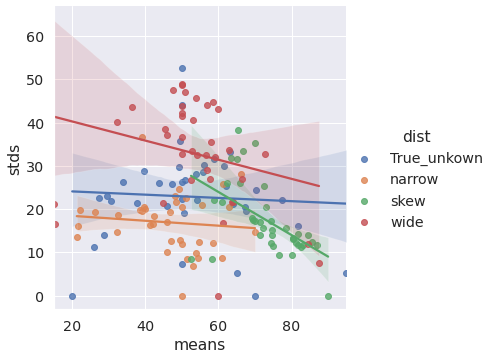

stds
True_unkown
38
Kendall r:1.0 p:1.0764447124280881e-18
pearson r:0.9999999999999999 p:2.273512378882565e-283
spearman] r:1.0 p:0.0
narrow
38
Kendall r:1.0 p:3.823926410080564e-45
pearson r:1.0 p:0.0
spearman] r:1.0 p:0.0
skew
38
Kendall r:1.0 p:1.0764447124280881e-18
pearson r:1.0 p:0.0
spearman] r:1.0 p:0.0
wide
38
Kendall r:1.0 p:3.823926410080564e-45
pearson r:0.9999999999999998 p:5.959876290497906e-278
spearman] r:1.0 p:0.0


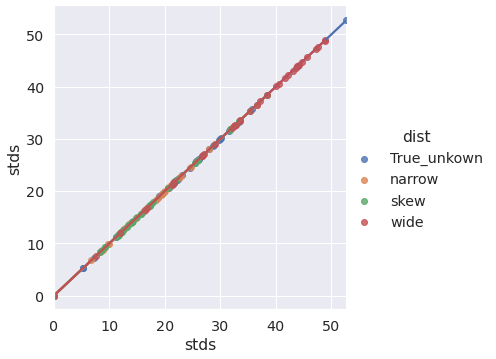

skew
True_unkown
38
Kendall r:-0.08914528176086825 p:0.43976973026801347
pearson r:-0.05821580971848267 p:0.7284613210720297
spearman] r:-0.1311918907370284 p:0.4323903018296601
narrow
38
Kendall r:0.03706352022675759 p:0.7436949019604717
pearson r:-0.011883387831842125 p:0.9435493947106997
spearman] r:0.04279304031596568 p:0.7986468477562609
skew
38
Kendall r:-0.33238264918347576 p:0.003385981751507077
pearson r:-0.6461327468253624 p:1.1781258873855433e-05
spearman] r:-0.5011766061085892 p:0.001349900603684689
wide
38
Kendall r:-0.07593318030420582 p:0.5046505905968078
pearson r:-0.21280963959645469 p:0.19957010490394686
spearman] r:-0.14799001101425172 p:0.3752438431522156


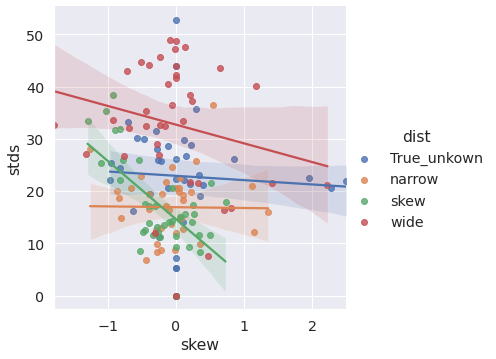

Amb
True_unkown
38
Kendall r:nan p:nan
pearson r:nan p:nan
spearman] r:nan p:nan
narrow
38
Kendall r:0.1494907446995551 p:0.26758200997407455
pearson r:0.12196692394974017 p:0.46571483678530207
spearman] r:0.18323763653332462 p:0.27082020687553304
skew
38
Kendall r:nan p:nan
pearson r:nan p:nan
spearman] r:nan p:nan
wide
38
Kendall r:-0.1752868001431074 p:0.1973957318444991
pearson r:-0.18557508000047596 p:0.2646487902212693
spearman] r:-0.21191140815549528 p:0.20151892489894


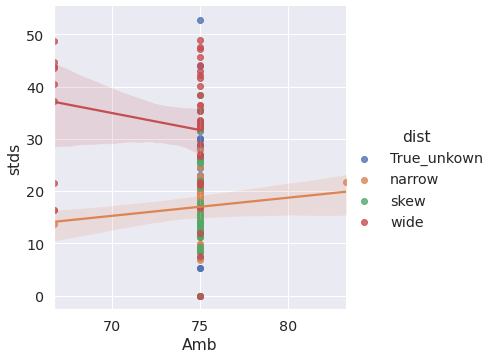

Risk_per
True_unkown
38
Kendall r:-0.06611034762523617 p:0.5759108529742417
pearson r:-0.010849100222860036 p:0.948455790154763
spearman] r:-0.07981576668379704 p:0.6338302297839533
narrow
38
Kendall r:-0.09331129250565419 p:0.43022802235845137
pearson r:-0.11646640789284007 p:0.48621627831223635
spearman] r:-0.1241498288982299 p:0.45770819602767054
skew
38
Kendall r:0.03611747350946889 p:0.7602326343426177
pearson r:0.07632909652880157 p:0.6487699065249911
spearman] r:0.04966531511074741 p:0.7671437123403706
wide
38
Kendall r:-0.009001503376606323 p:0.9391750030362496
pearson r:-0.0737273134687095 p:0.6600072937956463
spearman] r:-0.03779821041646411 p:0.8217453642096076


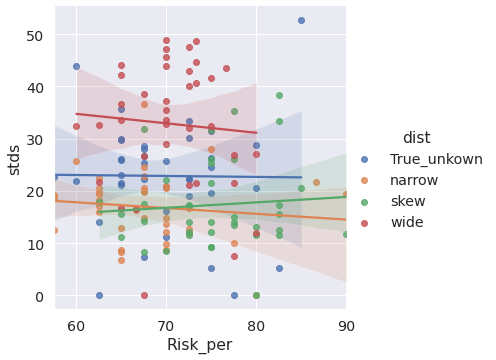

Money
True_unkown
38
Kendall r:-0.04343387947791317 p:0.749582446834135
pearson r:-0.044171468034636494 p:0.7923010481598377
spearman] r:-0.05247451117300187 p:0.7543683767689257
narrow
38
Kendall r:-0.08060552811668388 p:0.5533491579206133
pearson r:-0.07295348780817457 p:0.6633638937219088
spearman] r:-0.09744733176929701 p:0.5605484305313334
skew
38
Kendall r:0.1365064783591557 p:0.3157795487761993
pearson r:0.11306486729378144 p:0.49912426531646753
spearman] r:0.16491989225800588 p:0.3224330071047504
wide
38
Kendall r:0.006200425239744913 p:0.9636321974104355
pearson r:-0.009339875939842908 p:0.9556184742240141
spearman] r:0.007495948597638234 p:0.9643742432152657


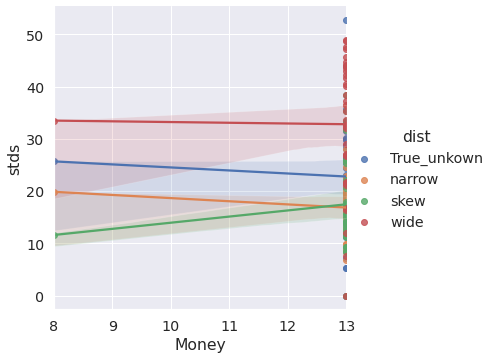

RiskisLeft
True_unkown
38
Kendall r:0.2963919895329875 p:0.02613127623595085
pearson r:0.30731533350341045 p:0.06054006858297103
spearman] r:0.3657412242599626 p:0.023936916708971467
narrow
38
Kendall r:-0.1995445897281691 p:0.12772649008028206
pearson r:-0.1716176281892342 p:0.30289230851370164
spearman] r:-0.2552672166977261 p:0.12192135687730903
skew
38
Kendall r:0.13445233075310348 p:0.31802437408284523
pearson r:0.11449954205035819 p:0.4936588763242003
spearman] r:0.16204186769047915 p:0.3310661059263632
wide
38
Kendall r:0.14903414900435663 p:0.2632913805560356
pearson r:0.11168708412971257 p:0.5044017498951064
spearman] r:0.17432102529960083 p:0.2952235301970762


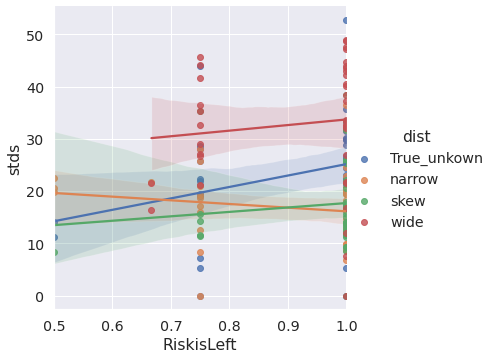

RT
True_unkown
38
Kendall r:-0.08256229849224529 p:0.4658621405818971
pearson r:-0.069128205571027 p:0.680050835819174
spearman] r:-0.11840017526065812 p:0.4789559842862734
narrow
38
Kendall r:-0.18065433854907542 p:0.11034778241543676
pearson r:-0.23524232961361113 p:0.1551044342023041
spearman] r:-0.2754130648867491 p:0.09421149069504985
skew
38
Kendall r:0.09395020173255497 p:0.40664548394407196
pearson r:0.0455854515214136 p:0.7858052276127151
spearman] r:0.14378727383780476 p:0.38910412691752616
wide
38
Kendall r:-0.09815078236130868 p:0.3856892363856863
pearson r:-0.1816747967872911 p:0.2749987404003693
spearman] r:-0.14476419739577634 p:0.38585599797873005


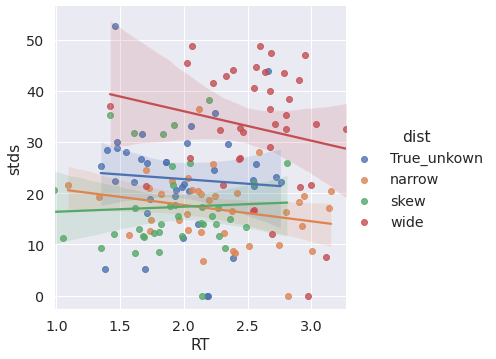

Max_risk
True_unkown
38
Kendall r:-0.06611034762523617 p:0.5759108529742417
pearson r:-0.010849100222860036 p:0.948455790154763
spearman] r:-0.07981576668379704 p:0.6338302297839533
narrow
38
Kendall r:-0.09331129250565419 p:0.43022802235845137
pearson r:-0.11646640789284007 p:0.48621627831223635
spearman] r:-0.1241498288982299 p:0.45770819602767054
skew
38
Kendall r:0.03611747350946889 p:0.7602326343426177
pearson r:0.07632909652880157 p:0.6487699065249911
spearman] r:0.04966531511074741 p:0.7671437123403706
wide
38
Kendall r:-0.009001503376606323 p:0.9391750030362496
pearson r:-0.0737273134687095 p:0.6600072937956463
spearman] r:-0.03779821041646411 p:0.8217453642096076


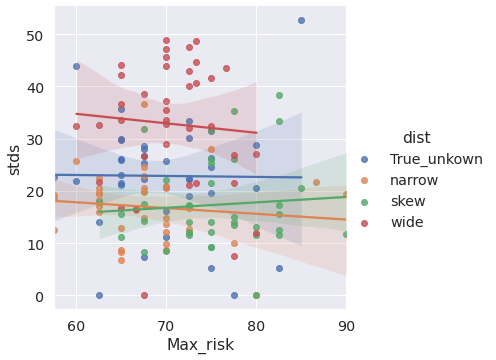

Total BDI score
True_unkown
29
Kendall r:0.07392284758051436 p:0.5840431654967284
pearson r:0.1621446868811297 p:0.4007127912662404
spearman] r:0.08850208330357577 p:0.6480076833263284
narrow
29
Kendall r:-0.030551070398840495 p:0.8208054121223893
pearson r:0.138155288830261 p:0.47479355672394497
spearman] r:-0.04950555712504218 p:0.7987038119086899
skew
29
Kendall r:-0.11980599435462672 p:0.3749125847461334
pearson r:-0.12565334737591274 p:0.5160273066216532
spearman] r:-0.1607890995962866 p:0.40471515807177416
wide
29
Kendall r:0.040734760531787324 p:0.7626427217185519
pearson r:0.06528298046551025 p:0.736528043747262
spearman] r:0.02549536191939672 p:0.8955550121136192


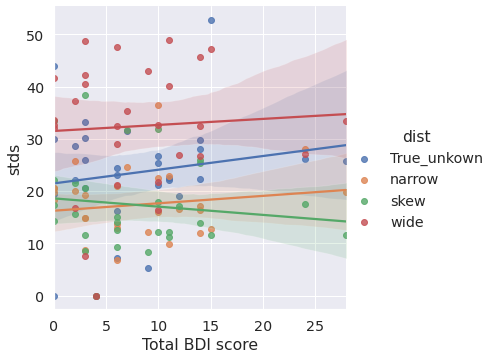

TEPS Anticipatory Scale
True_unkown
31
Kendall r:-0.0043720259844616674 p:0.9728135483950997
pearson r:-0.11276186269649763 p:0.5458685201248202
spearman] r:0.010504004979361718 p:0.9552765591326984
narrow
31
Kendall r:-0.04148956233503535 p:0.7461559783930529
pearson r:-0.06294823806914128 p:0.7365601349758185
spearman] r:-0.05433254785893908 p:0.7715914930340421
skew
31
Kendall r:-0.20548522126969837 p:0.1092111882282353
pearson r:-0.3729219889722327 p:0.038807697366170776
spearman] r:-0.28320413425125246 p:0.12263262024739277
wide
31
Kendall r:0.02838759528186629 p:0.8247130598502584
pearson r:0.15835549969298163 p:0.3948575242871271
spearman] r:0.07069290613616609 p:0.705504828502205


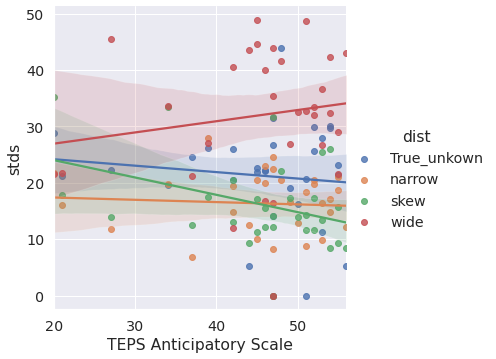

TEPS Consummatory Scale
True_unkown
31
Kendall r:0.05935227147524927 p:0.6451255776288829
pearson r:0.014641765015052877 p:0.9376881737307409
spearman] r:0.08713259399050169 p:0.6411541397205966
narrow
31
Kendall r:0.02195867314071102 p:0.8645790549980019
pearson r:0.0641298679073696 p:0.7317940834107831
spearman] r:0.030927941840088614 p:0.8688162021420895
skew
31
Kendall r:-0.14728156254969263 p:0.25310828134383334
pearson r:-0.14381462670184741 p:0.4402056035432961
spearman] r:-0.18265498531419552 p:0.3253642416109467
wide
31
Kendall r:-0.1141851003316973 p:0.37515940334585673
pearson r:-0.06977247579535484 p:0.7091725385085416
spearman] r:-0.1322017906105749 p:0.4783608883831384


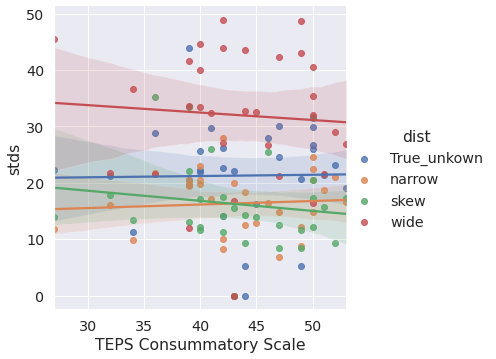

Total AADIS Score
True_unkown
31
Kendall r:0.07911856299830435 p:0.5541703227460457
pearson r:0.08493616258884414 p:0.6496176971461084
spearman] r:0.10519900378241065 p:0.5732850373076704
narrow
31
Kendall r:0.15806688697368337 p:0.23685196539495834
pearson r:0.2370187387453145 p:0.1992050223353088
spearman] r:0.22869728129964834 p:0.21590668823971876
skew
31
Kendall r:0.23037463931859206 p:0.0850016809948769
pearson r:0.2538467579536744 p:0.1682120180184152
spearman] r:0.29418664658525406 p:0.10817958603093583
wide
31
Kendall r:-0.14876883479876085 p:0.265575275623683
pearson r:-0.1796618622541274 p:0.33349026881771004
spearman] r:-0.2284914331616649 p:0.21633157750465687


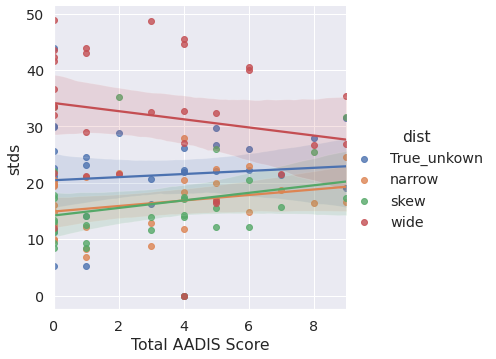

SUSD Mania Scale
True_unkown
31
Kendall r:-0.10828688249899952 p:0.4163387076537507
pearson r:-0.18144983942279852 p:0.32862129765562104
spearman] r:-0.1517613070412523 p:0.41508132265458597
narrow
31
Kendall r:-0.07364791987930008 p:0.5800467602074081
pearson r:-0.007062520409386444 p:0.9699213648095031
spearman] r:-0.0791985232632826 p:0.6719274458670118
skew
31
Kendall r:-0.06220735803134016 p:0.640555915919732
pearson r:-0.024401573043968935 p:0.896330484326963
spearman] r:-0.07296413480810039 p:0.6964823225783419
wide
31
Kendall r:0.07364791987930008 p:0.5800467602074081
pearson r:0.037595433835972455 p:0.8408617551091301
spearman] r:0.1279045918334667 p:0.49290082454245254


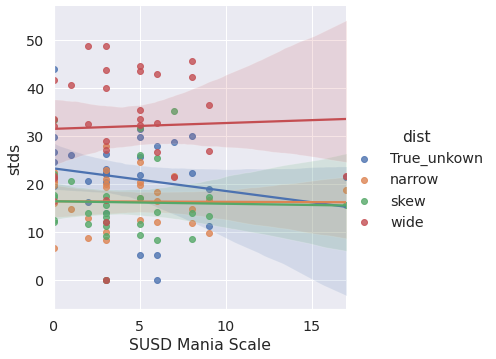

SUSD Depression Scale
True_unkown
31
Kendall r:-0.006795753527744529 p:0.9588690411905078
pearson r:0.014091443676191862 p:0.9400259441020312
spearman] r:-0.011195280057652007 p:0.9523364980638183
narrow
31
Kendall r:0.0995638208843125 p:0.44946869684269186
pearson r:0.1655149030114797 p:0.37355320457322994
spearman] r:0.13148039696403002 p:0.4807861649421362
skew
31
Kendall r:-0.07928379115701951 p:0.5473848855742292
pearson r:-0.040278590271940855 p:0.8296636912555692
spearman] r:-0.10085929579211944 p:0.5892909850835573
wide
31
Kendall r:-0.04978191044215625 p:0.705318762991533
pearson r:-0.08017572081607485 p:0.6681077477850018
spearman] r:-0.06512960840323469 p:0.7277693068749059


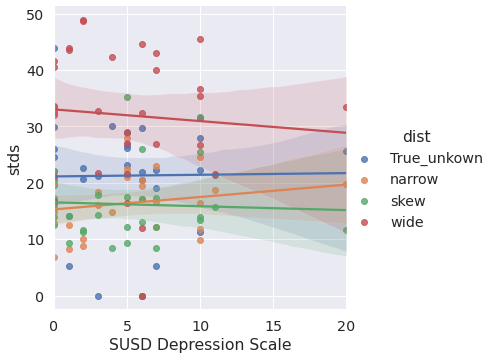

IRI subscale Perspective Taking
True_unkown
31
Kendall r:0.2137082356932146 p:0.09791869230166157
pearson r:0.3002644310230457 p:0.10075120691541309
spearman] r:0.2932980293748094 p:0.10929917646973267
narrow
31
Kendall r:0.0836306813619177 p:0.51680927714634
pearson r:0.05366737132498192 p:0.7743155188314051
spearman] r:0.12090626680964285 p:0.5170513262384917
skew
31
Kendall r:0.03745402068850153 p:0.7717729659981374
pearson r:-0.11561638103416373 p:0.5356831929519502
spearman] r:0.045698279654399813 p:0.8071466287707759
wide
31
Kendall r:-0.11444198502157159 p:0.3750204601442426
pearson r:-0.14359912508833947 p:0.44089822899636955
spearman] r:-0.16882396786965181 p:0.3639388044059999


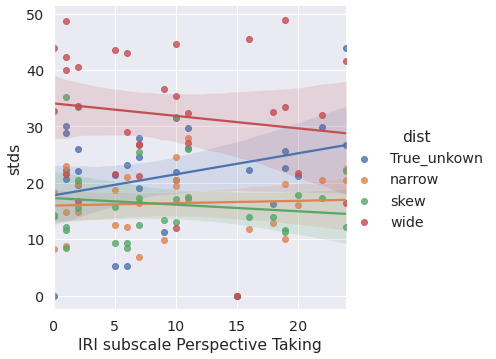

IRI subscale Fantasy
True_unkown
31
Kendall r:0.0841961719179852 p:0.5158746164340962
pearson r:0.03062667107446261 p:0.8700832602697776
spearman] r:0.11750532752488896 p:0.5289934199844041
narrow
31
Kendall r:0.25895668399457367 p:0.04548185881898022
pearson r:0.3544095559691326 p:0.05044117805356194
spearman] r:0.39076711391280816 p:0.02973935089736484
skew
31
Kendall r:-0.004431377469367641 p:0.9727211224342761
pearson r:0.16068259628820666 p:0.38785769982700286
spearman] r:0.009015494956650964 p:0.9616092468991372
wide
31
Kendall r:-0.01549313493984629 p:0.9047458977329399
pearson r:-0.041125886559054775 p:0.8261342190451613
spearman] r:-0.030993970154826155 p:0.8685385485714123


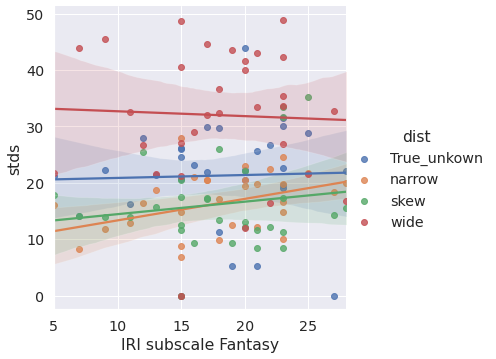

IRI subscale Empathic Concern
True_unkown
31
Kendall r:0.09033028518991545 p:0.48420951411798097
pearson r:0.056341802192011556 p:0.7633795145181713
spearman] r:0.14093672973060473 p:0.4495038409797574
narrow
31
Kendall r:0.06602422212782977 p:0.6087956131520953
pearson r:0.06231249432601749 p:0.7391283695379038
spearman] r:0.08855676398432034 p:0.6356897873869352
skew
31
Kendall r:-0.1476129050664472 p:0.2529704648618635
pearson r:-0.1714191734970465 p:0.3565020998637041
spearman] r:-0.23637738458404153 p:0.20045947568431655
wide
31
Kendall r:0.07482745174487372 p:0.5618926912968667
pearson r:0.17762137354738333 p:0.339100425545533
spearman] r:0.11605384138584446 p:0.5341303272423388


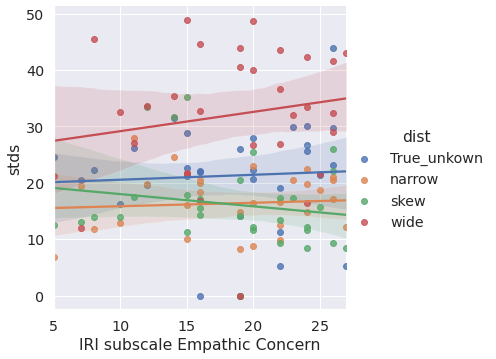

IRI subscale Personal Distress
True_unkown
31
Kendall r:-0.1580955859669866 p:0.21955890346656426
pearson r:-0.28714289353845524 p:0.11729364675178616
spearman] r:-0.2153400632581239 p:0.24466568627885413
narrow
31
Kendall r:0.010967048556913484 p:0.932066486789763
pearson r:0.030174491569006034 p:0.8719855892329449
spearman] r:0.014751984869285152 p:0.9372200192533928
skew
31
Kendall r:-0.06587316081957775 p:0.6089712740702997
pearson r:-0.021996801117643086 p:0.9065002435671511
spearman] r:-0.09711018338388414 p:0.6032736690129363
wide
31
Kendall r:0.04167478451627124 p:0.7459898063659296
pearson r:0.11003690931304058 p:0.555675577619471
spearman] r:0.029706051723081064 p:0.8739570655446472


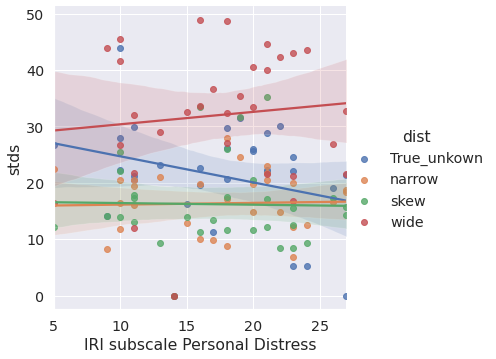

AQ subscale Social Skill
True_unkown
31
Kendall r:0.046371289157255365 p:0.7199588869005065
pearson r:-0.018864409697020974 p:0.9197686690580498
spearman] r:0.087194468526114 p:0.6409163495405301
narrow
31
Kendall r:-0.02205780986658792 p:0.864461875994892
pearson r:0.034207976409311766 p:0.8550426109773577
spearman] r:-0.018205826098899768 p:0.9225611615166018
skew
31
Kendall r:0.028706036144967608 p:0.8243628665518605
pearson r:0.1265425980519309 p:0.49755558010340806
spearman] r:-0.0021242271914714544 p:0.9909512616883451
wide
31
Kendall r:0.07058499157308136 p:0.5849071638803441
pearson r:0.11101917938037319 p:0.5521310315218804
spearman] r:0.09467029571427879 p:0.6124486333881363


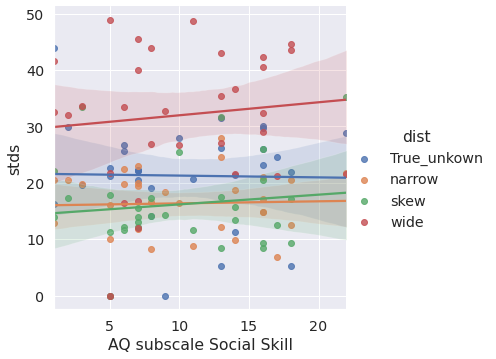

AQ subscale Attention Switching
True_unkown
38
Kendall r:-0.1270450494682574 p:0.2880654356678143
pearson r:-0.1395231194848769 p:0.4034672647011286
spearman] r:-0.18266980049956735 p:0.2723335720390567
narrow
38
Kendall r:0.0030591483879952447 p:0.9795783111888278
pearson r:-0.12189539906083714 p:0.4659784360170351
spearman] r:0.009449837816004664 p:0.9550964793699412
skew
38
Kendall r:-0.15459698790715656 p:0.19609072530558358
pearson r:-0.19499557391570288 p:0.2407226080174263
spearman] r:-0.22925449094954828 p:0.16619587392760343
wide
38
Kendall r:0.03365063226794769 p:0.7782706000486981
pearson r:0.023055531022890652 p:0.8907191414996442
spearman] r:0.03246297226203955 p:0.846582145207821


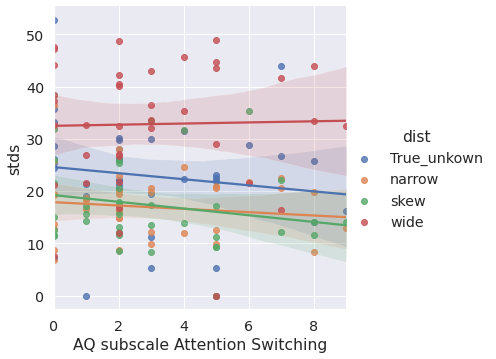

AQ subscale Attention to detail
True_unkown
38
Kendall r:-0.20633466120542315 p:0.08134499847106419
pearson r:-0.29675570471486645 p:0.07041754454885667
spearman] r:-0.2696208219718287 p:0.10162847283029246
narrow
38
Kendall r:-0.0602008338746156 p:0.6108578612896554
pearson r:-0.2010307016085003 p:0.22618611811413622
spearman] r:-0.0783725723467115 p:0.6399971342125415
skew
38
Kendall r:-0.16717625834891947 p:0.15790318498521672
pearson r:-0.29057619306202565 p:0.0767596110562556
spearman] r:-0.2422607754617723 p:0.14280096796877262
wide
38
Kendall r:-0.27692383582323177 p:0.01924727723151722
pearson r:-0.2729975005622896 p:0.09725241114968754
spearman] r:-0.3776032540710386 p:0.019428007929112093


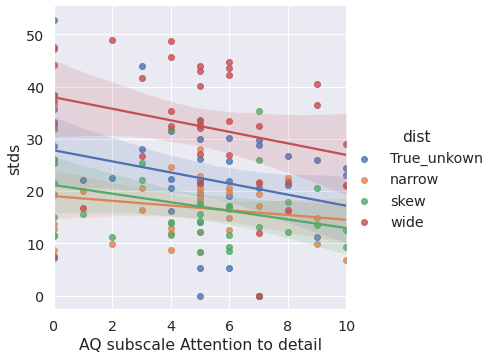

AQ subscale Communication
True_unkown
38
Kendall r:-0.18165956718075602 p:0.12431887639359912
pearson r:-0.26420546761445485 p:0.10895789216211084
spearman] r:-0.27361521903823316 p:0.09646771899858173
narrow
38
Kendall r:0.09301553489159868 p:0.43102251062996577
pearson r:0.06811403981563938 p:0.6845005951836713
spearman] r:0.1347583315877062 p:0.41987070647533953
skew
38
Kendall r:-0.16064110486232147 p:0.17412346665748712
pearson r:-0.20240387897536616 p:0.2229642601571366
spearman] r:-0.19657470960350676 p:0.23685960697226455
wide
38
Kendall r:-0.11101854164481131 p:0.3472937529435969
pearson r:-0.06275745698176141 p:0.7081743745954903
spearman] r:-0.1311162145177682 p:0.43265817689816755


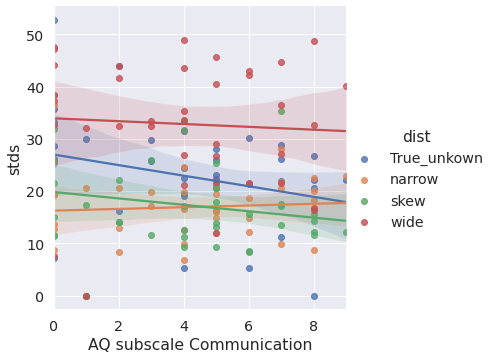

AQ subscale Imagination
True_unkown
38
Kendall r:-0.2535441984407802 p:0.03308542438578065
pearson r:-0.2978605836149751 p:0.0693282902663969
spearman] r:-0.3428954856342991 p:0.03507382851353076
narrow
38
Kendall r:-0.1547491498162849 p:0.19308624379267147
pearson r:-0.21925251607092747 p:0.1859772523962596
spearman] r:-0.20619162906702015 p:0.21424064425579745
skew
38
Kendall r:-0.2505077409744235 p:0.035245752466915116
pearson r:-0.2847282789614064 p:0.08316375526015335
spearman] r:-0.34356065631448207 p:0.03469833392705946
wide
38
Kendall r:0.02427437644177018 p:0.8382305182960699
pearson r:-0.0009244732334764971 p:0.995604907663513
spearman] r:0.035252117227587317 p:0.8335782339758235


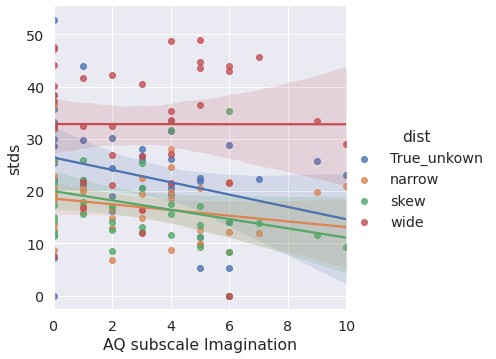

AQ Total
True_unkown
29
Kendall r:0.1540884954922991 p:0.2607642082640168
pearson r:0.07932562723136188 p:0.6825127627031673
spearman] r:0.1884543435236969 p:0.32756699949595935
narrow
29
Kendall r:-0.03130141308636871 p:0.819107954074275
pearson r:-0.1777166502460616 p:0.356368220660112
spearman] r:-0.035713256568181743 p:0.8540758698294775
skew
29
Kendall r:-0.05738592399167597 p:0.6750191744310109
pearson r:-0.2768941446620544 p:0.14590791428429678
spearman] r:-0.07192599924221217 p:0.7108040495578396
wide
29
Kendall r:-0.11477184798335194 p:0.4017280385636329
pearson r:-0.18284915571084465 p:0.34241885028448266
spearman] r:-0.15459094976017132 p:0.42330001649202376


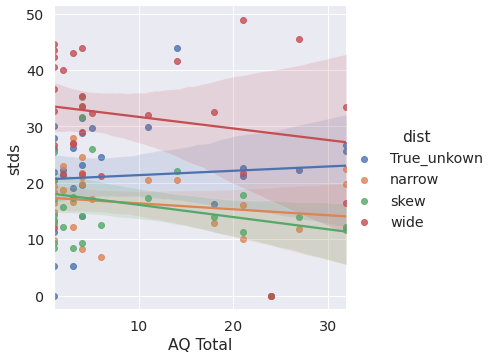

TEI Subscale wellbeing
True_unkown
38
Kendall r:-0.20167293250819376 p:0.08111232928529394
pearson r:-0.2663757196968172 p:0.10597395046380331
spearman] r:-0.2868948461926154 p:0.08074447517954643
narrow
38
Kendall r:-0.010222508034046292 p:0.9295025957043838
pearson r:-0.04171152673113169 p:0.8036347132475635
spearman] r:-0.015058407468348686 p:0.9285014864663759
skew
38
Kendall r:-0.05553312634283596 p:0.6310100053729171
pearson r:-0.049404181610104486 p:0.7683344070881768
spearman] r:-0.09024546694411388 p:0.5900052901824964
wide
38
Kendall r:-0.01606394119635846 p:0.8894301275177168
pearson r:-0.002899768285857293 p:0.9862146318803416
spearman] r:-0.046823953149755765 p:0.7801272611123298


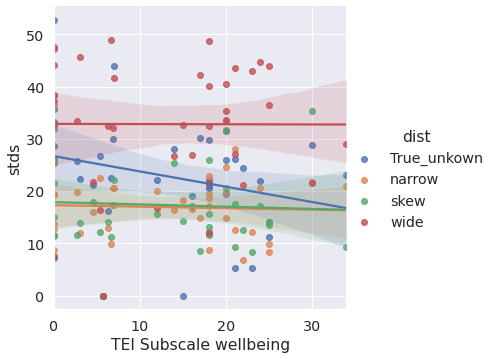

TEI Subscale selfcontrol
True_unkown
31
Kendall r:0.06558038976692501 p:0.6091788947417826
pearson r:0.06680130905460285 p:0.7210552485786343
spearman] r:0.11313150012568278 p:0.5445444929150856
narrow
31
Kendall r:0.07642814114348616 p:0.5509283811895509
pearson r:0.12232057242633548 p:0.5121243719706106
spearman] r:0.09473807970128523 p:0.6121929506441481
skew
31
Kendall r:0.20985724725416002 p:0.10184234551443254
pearson r:0.25548319094951144 p:0.16539255921884818
spearman] r:0.2951520030064688 p:0.10697307508440572
wide
31
Kendall r:-0.03712223998397899 p:0.7720723760325574
pearson r:-0.010193408768619107 p:0.9565977454159752
spearman] r:-0.05656004758285686 p:0.762489027638733


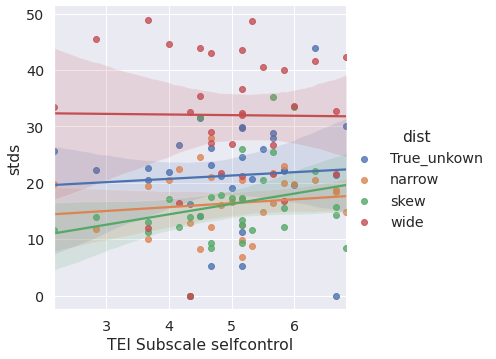

TEI Subscale emotionality
True_unkown
31
Kendall r:-0.06754213385032669 p:0.5975300111174313
pearson r:0.05547978819005779 p:0.7668996015439768
spearman] r:-0.06653211182116904 p:0.7221350668274304
narrow
31
Kendall r:0.03917582060034102 p:0.7592151596649042
pearson r:0.03813991809434328 p:0.8385868265608655
spearman] r:0.054310573116742394 p:0.7716814414336322
skew
31
Kendall r:-0.04139679171471636 p:0.746251628184017
pearson r:-0.018730544846522673 p:0.9203362011337495
spearman] r:-0.039071209825178185 p:0.8346987340832333
wide
31
Kendall r:0.01741147582237379 p:0.8916415374638467
pearson r:0.061374306645500046 p:0.7429234296236016
spearman] r:0.028871419909643724 p:0.8774715278503016


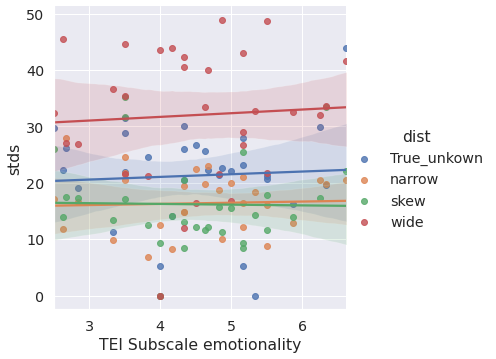

TEI Subscale sociability
True_unkown
31
Kendall r:-0.07205858541118958 p:0.5740302941236752
pearson r:-0.15231204484751057 p:0.4133704162136513
spearman] r:-0.09521415005489865 p:0.6103984640892697
narrow
31
Kendall r:-0.00872497713445512 p:0.9456846514067331
pearson r:0.016203979528773067 p:0.9310547062626481
spearman] r:-0.007470982822284183 p:0.9681826102016786
skew
31
Kendall r:0.11573045535736508 p:0.36662772843073477
pearson r:0.03614027157524173 p:0.8469477516646028
spearman] r:0.20264559826106213 p:0.27425793120932795
wide
31
Kendall r:-0.0872497713445512 p:0.4957015683939411
pearson r:-0.04561266784974904 p:0.8075011937686952
spearman] r:-0.14053524444080515 p:0.45080933329938655


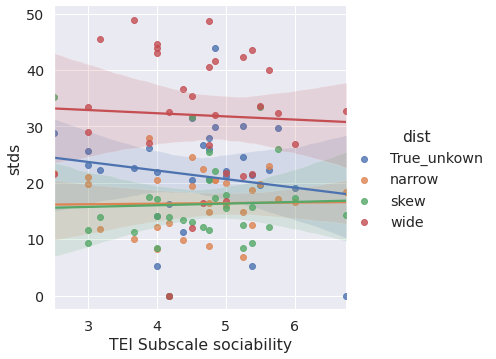

TEI Total or global trait emotional intelligence
True_unkown
31
Kendall r:-0.10123223747743652 p:0.4323797659499867
pearson r:-0.008770801606915273 p:0.9626504952117401
spearman] r:-0.15070368403884452 p:0.41837799375341544
narrow
31
Kendall r:0.12530499218149083 p:0.3306836368835795
pearson r:0.1569059127493516 p:0.3992541490650765
spearman] r:0.15271115568309684 p:0.41213302569462607
skew
31
Kendall r:0.1364434505130666 p:0.2899582793731058
pearson r:-0.06409285031554496 p:0.7319432446533666
spearman] r:0.1962182194868177 p:0.2900878187062213
wide
31
Kendall r:-0.1384949913584899 p:0.2823159725439235
pearson r:-0.09080487090762031 p:0.6271022950262918
spearman] r:-0.2150092165445456 p:0.24540884403272867


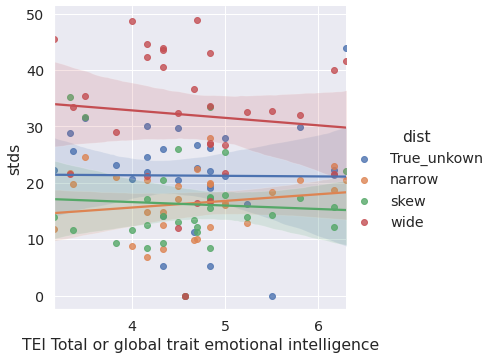

TOTAL PNR
True_unkown
31
Kendall r:-0.07127446429881984 p:0.5746574059699261
pearson r:-0.05910742526191083 p:0.7521174862553932
spearman] r:-0.0807785413768219 p:0.6657554715026545
narrow
31
Kendall r:-0.1251354988732131 p:0.32402535211823813
pearson r:-0.2852649789091379 p:0.11981717289982748
spearman] r:-0.2161944235254349 p:0.24275352231518676
skew
31
Kendall r:-0.15334808985503662 p:0.22726185816016065
pearson r:-0.30103098490044133 p:0.09984235997277645
spearman] r:-0.20542557900697409 p:0.2675878186685804
wide
31
Kendall r:-0.03452013762019672 p:0.7855754349717059
pearson r:-0.07902889825458159 p:0.6725913023343497
spearman] r:-0.012302108055085378 p:0.9476303445463539


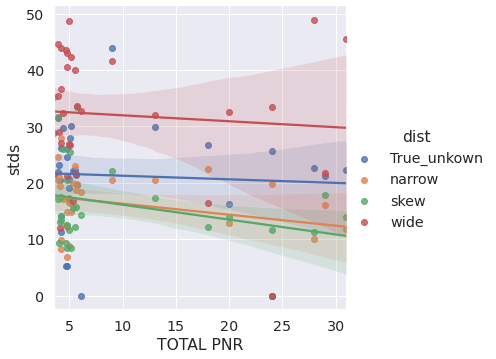

PVSS Total Score
True_unkown
30
Kendall r:0.03699444214706842 p:0.7750972830514693
pearson r:0.027063784805602828 p:0.8871104287811497
spearman] r:0.06010686259166048 p:0.7523704993805831
narrow
30
Kendall r:-0.006928480375033516 p:0.9572834241332644
pearson r:0.005321043609718398 p:0.9777368912889691
spearman] r:-0.023372290764130253 p:0.9024299968909595
skew
30
Kendall r:-0.04388037570854561 p:0.734435241732387
pearson r:-0.15583641897655826 p:0.41089244486149945
spearman] r:-0.058096837042266626 p:0.7604073618817102
wide
30
Kendall r:0.0023094934583445053 p:0.9857550893713608
pearson r:0.050841214820280894 p:0.7896164838843247
spearman] r:0.04897051398198719 p:0.7971946836075375


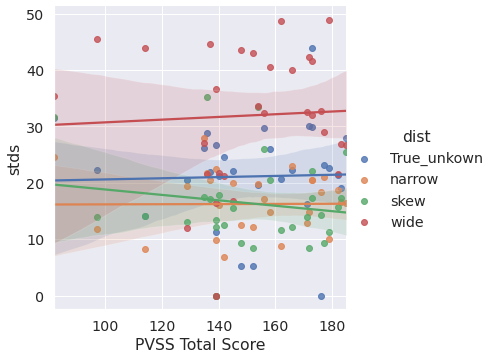

PVSS Food Subscale
True_unkown
30
Kendall r:-0.057529975708042795 p:0.6657579466617943
pearson r:-0.0949662079291995 p:0.6176525932201754
spearman] r:-0.08448389753244899 p:0.6571365943797656
narrow
30
Kendall r:-0.14605385359820927 p:0.27230132184797073
pearson r:-0.1658908889197795 p:0.3809723852438091
spearman] r:-0.19852627726499028 p:0.29294531144679437
skew
30
Kendall r:-0.21309496672525616 p:0.10922716570770415
pearson r:-0.25751821833549704 p:0.16948748447361983
spearman] r:-0.3036152434470224 p:0.10287501454693171
wide
30
Kendall r:-0.01676027828176172 p:0.8997520656981912
pearson r:-0.10315109938794247 p:0.5875255172178814
spearman] r:-0.017477482648610883 p:0.9269623923374213


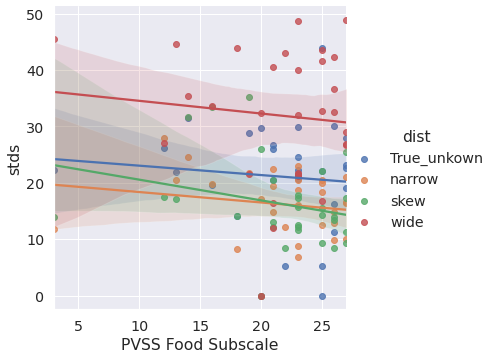

PVSS Physical Touch Subscale
True_unkown
30
Kendall r:0.002364865944515378 p:0.9856958156144472
pearson r:-0.012056774510146258 p:0.9495803418895498
spearman] r:0.00993753551971947 p:0.9584342959900198
narrow
30
Kendall r:-0.0047242922875886245 p:0.9714005794223733
pearson r:0.06782529971387473 p:0.7217510006673913
spearman] r:0.001786324505060502 p:0.9925252508625643
skew
30
Kendall r:0.08503726117659524 p:0.5187125356017189
pearson r:-0.03005987058349341 p:0.874705772131302
spearman] r:0.113878187197607 p:0.549047877838507
wide
30
Kendall r:0.08976155346418387 p:0.4957557019411447
pearson r:0.24314027265325228 p:0.1954314442798415
spearman] r:0.1480416433568891 p:0.43496757400555763


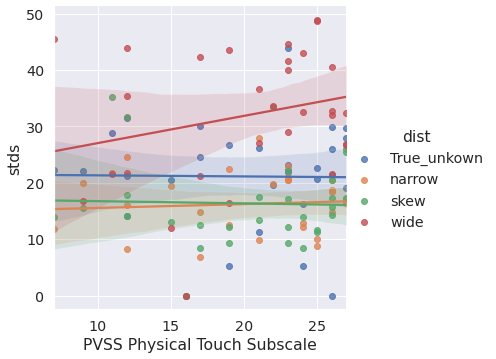

PVSS Outdoors Subscale
True_unkown
30
Kendall r:0.10392805172250993 p:0.4303181560807453
pearson r:0.15288454733795503 p:0.41992031636091826
spearman] r:0.14556902350938117 p:0.4427621070788833
narrow
30
Kendall r:0.035389270042846095 p:0.7880712392653473
pearson r:0.0525153182111174 p:0.7828505905479973
spearman] r:0.06429327472547611 p:0.7357137010288242
skew
30
Kendall r:-0.035389270042846095 p:0.7880712392653473
pearson r:-0.07574133431119022 p:0.6907798945455988
spearman] r:-0.03951357509169885 p:0.8357683517708449
wide
30
Kendall r:-0.16279064219709202 p:0.21625276415420203
pearson r:-0.1973346111409101 p:0.2959112632941416
spearman] r:-0.21832924542192927 p:0.2464256986109597


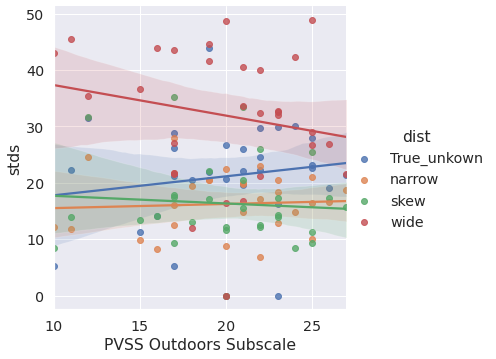

PVSS Positive Feedback Subscale
True_unkown
30
Kendall r:0.12912084870870794 p:0.33154515211417124
pearson r:0.1636924763747684 p:0.3874038607707479
spearman] r:0.1891897495979925 p:0.3166896371627724
narrow
30
Kendall r:0.15046773997039273 p:0.2573524303448569
pearson r:0.20008781112457769 p:0.28908744873967673
spearman] r:0.2017053281292519 p:0.2851255540419987
skew
30
Kendall r:0.06448617427302546 p:0.6273710449051986
pearson r:0.03861431072211419 p:0.8394573396061922
spearman] r:0.09827817874444128 p:0.6053847402278115
wide
30
Kendall r:-0.04060240602375677 p:0.7598777048650113
pearson r:0.03548159073673609 p:0.8523340482522599
spearman] r:-0.04052016025681975 p:0.8316431599745688


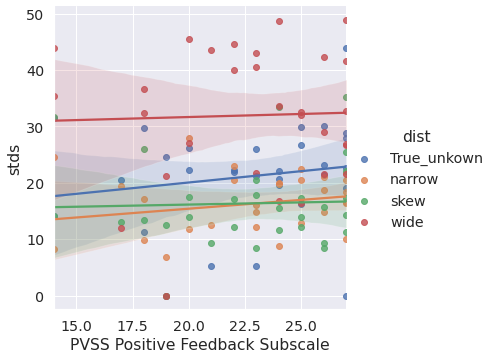

PVSS Hobbies Subscale
True_unkown
30
Kendall r:0.009588329284673798 p:0.9426111114107941
pearson r:-0.06618080271526966 p:0.7282413895448631
spearman] r:0.03932427376666537 p:0.836544628033604
narrow
30
Kendall r:0.11253329703468583 p:0.3976989965454153
pearson r:-0.001920274893360597 p:0.9919647621802656
spearman] r:0.14137240146947505 p:0.4561623402397281
skew
30
Kendall r:-0.05028083484528516 p:0.7055176050261693
pearson r:-0.13111895178603905 p:0.4897900250043586
spearman] r:-0.04884181223509598 p:0.7977167271956107
wide
30
Kendall r:-0.08380139140880859 p:0.5288223108390773
pearson r:-0.021510196281117007 p:0.9101710199907249
spearman] r:-0.0701260882091057 p:0.7127021838246947


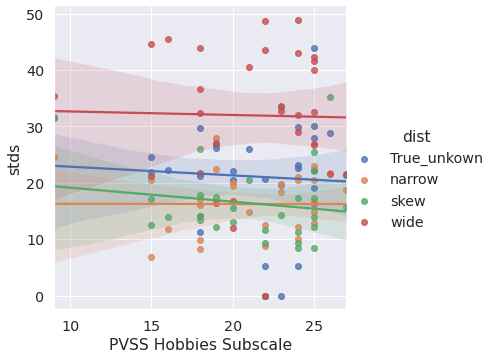

PVSS Social Interactions Subscale
True_unkown
30
Kendall r:0.060766306577943845 p:0.6514428871480317
pearson r:-0.040608429956118325 p:0.8312816200468465
spearman] r:0.09231457809382118 p:0.6275478858134086
narrow
30
Kendall r:0.02913428162916919 p:0.8283545476817117
pearson r:-0.09552428901532041 p:0.6155782113221558
spearman] r:0.011467770416141155 p:0.9520405920077853
skew
30
Kendall r:0.038845708838892254 p:0.7725177090410943
pearson r:-0.13823517031301452 p:0.4663188715719696
spearman] r:0.03822590138713718 p:0.8410517197307823
wide
30
Kendall r:0.10196998570209218 p:0.44794623943856526
pearson r:0.2273329165245237 p:0.22699284028982775
spearman] r:0.16414651772123615 p:0.3860704586250211


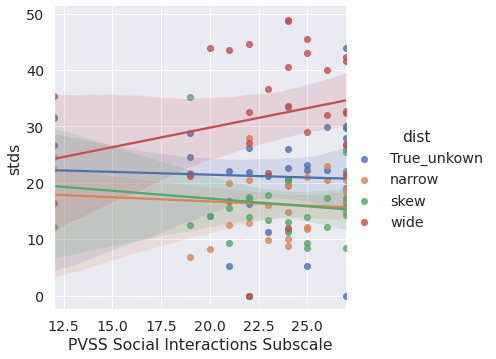

PVSS Goals Subscale
True_unkown
30
Kendall r:0.19688283331253803 p:0.1429279798145419
pearson r:0.08788734689260227 p:0.6442106127038072
spearman] r:0.2626776705584676 p:0.16080234482520372
narrow
30
Kendall r:0.03398999523403073 p:0.8001381752585914
pearson r:0.0012485068747603509 p:0.9947756739249156
spearman] r:0.031958937368049466 p:0.8668579472320962
skew
30
Kendall r:-0.09225855849236911 p:0.4919749439132354
pearson r:-0.23750089368733507 p:0.2063211731385167
spearman] r:-0.1276106865329863 p:0.5015782192216287
wide
30
Kendall r:-0.02427856802430766 p:0.8564974923107147
pearson r:0.06700231758572528 p:0.7249967558293993
spearman] r:-0.02295641979958483 p:0.9041581033645152


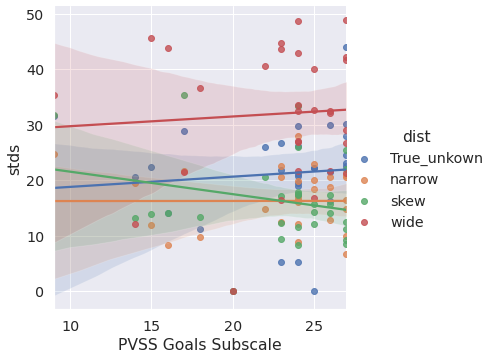

TOTAL RSE
True_unkown
37
Kendall r:-0.02783148373094381 p:0.8130658181145434
pearson r:-0.04604351332233615 p:0.7866968077528221
spearman] r:-0.059299692479111155 p:0.7273651111456457
narrow
37
Kendall r:0.07261651803331455 p:0.5369666916183222
pearson r:0.11733683706743518 p:0.48916970694508816
spearman] r:0.10729218110376543 p:0.5273466857251674
skew
37
Kendall r:0.07112490286796751 p:0.5456313404719563
pearson r:0.115589113079752 p:0.49570829516041254
spearman] r:0.12145433504748746 p:0.4739427358362941
wide
37
Kendall r:-0.07879664722763918 p:0.502888617603293
pearson r:-0.06690820258329956 p:0.6939802613500243
spearman] r:-0.09944153370592894 p:0.558162670289935


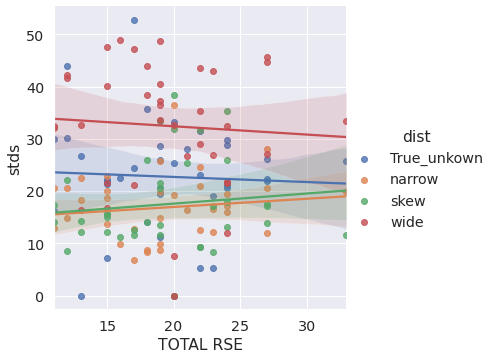

TOTAL BPAQ
True_unkown
36
Kendall r:-0.2208045221229201 p:0.059882169571527005
pearson r:-0.17805742738447128 p:0.29881759389931706
spearman] r:-0.3066074824364397 p:0.06894081624843593
narrow
36
Kendall r:-0.2765858947525808 p:0.018340225314500257
pearson r:-0.33812232261704717 p:0.04369767042794747
spearman] r:-0.40208651983410393 p:0.015058583846482792
skew
36
Kendall r:-0.17920367012874674 p:0.12672508499565927
pearson r:-0.2554168603638496 p:0.13271510947867113
spearman] r:-0.26983519248239496 p:0.11148460540344392
wide
36
Kendall r:0.08153688226810185 p:0.48684698766789325
pearson r:0.058579718405450606 p:0.7343342827725566
spearman] r:0.11694252402606226 p:0.496992901954341


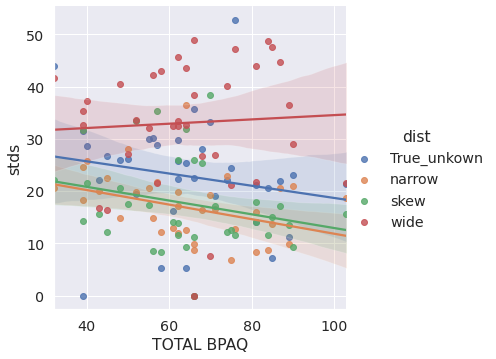

BPAQ Physical Subscale
True_unkown
36
Kendall r:-0.1963096181462686 p:0.0981456096880509
pearson r:-0.19555348816954243 p:0.25304281289042724
spearman] r:-0.29521946258246623 p:0.08046389064686534
narrow
36
Kendall r:-0.1945326495738865 p:0.1009853386931524
pearson r:-0.24999186157113729 p:0.1414320067517851
spearman] r:-0.27823047065966583 p:0.10036353287350498
skew
36
Kendall r:-0.09572121876553594 p:0.4199820197286048
pearson r:-0.09401091997164115 p:0.5854997916858344
spearman] r:-0.1553209281827314 p:0.3657076112174811
wide
36
Kendall r:-0.01945326495738865 p:0.8697236359374682
pearson r:-0.11270194724401393 p:0.5128302747164861
spearman] r:-0.02258364209899885 p:0.8959839408181889


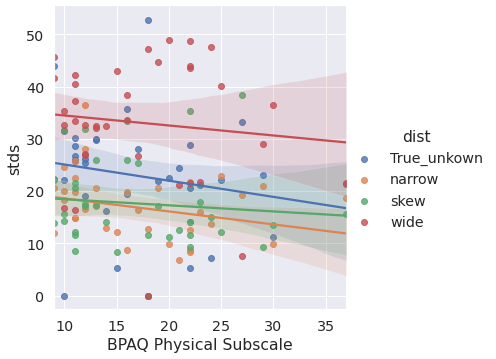

BPAQ Verbal Subscale
True_unkown
36
Kendall r:-0.1382403780185484 p:0.24970194594910144
pearson r:-0.13097441145706407 p:0.44641736488225553
spearman] r:-0.19010881050510905 p:0.26675653945111205
narrow
36
Kendall r:-0.3042162461217742 p:0.011248556587508231
pearson r:-0.2743740655274877 p:0.10536221045609442
spearman] r:-0.3982975890609687 p:0.016130713250962925
skew
36
Kendall r:-0.1184917525873272 p:0.32382183165674316
pearson r:-0.11332663828553607 p:0.5104815636968122
spearman] r:-0.16618355204018034 p:0.3327099930391618
wide
36
Kendall r:0.0805761949187402 p:0.5019651816484536
pearson r:0.03272868788535585 p:0.8497069054515847
spearman] r:0.10500572802516446 p:0.5422009387465856


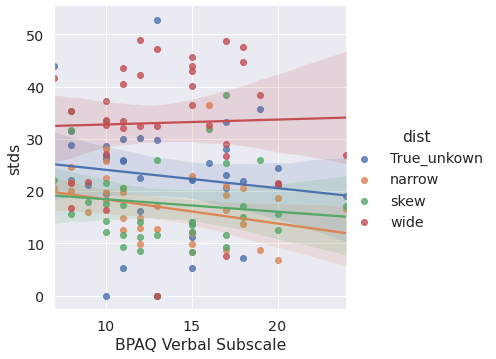

BPAQ Anger Subscale
True_unkown
36
Kendall r:-0.1579890034497696 p:0.1881993436448829
pearson r:-0.07993151122397936 p:0.6430732150750086
spearman] r:-0.2466396203468773 p:0.1470242632154396
narrow
36
Kendall r:-0.20555151764984744 p:0.08665854840279688
pearson r:-0.2400900079191312 p:0.15841331077218973
spearman] r:-0.3257270384872573 p:0.05254670538623544
skew
36
Kendall r:-0.0757030641530146 p:0.5283366219376956
pearson r:-0.1715556994490085 p:0.3170930457755449
spearman] r:-0.12852686221590487 p:0.45503200826192947
wide
36
Kendall r:0.041110303529969486 p:0.7318552287281009
pearson r:0.038304102341850166 p:0.8244735086129737
spearman] r:0.0622218846355722 p:0.71846919430349


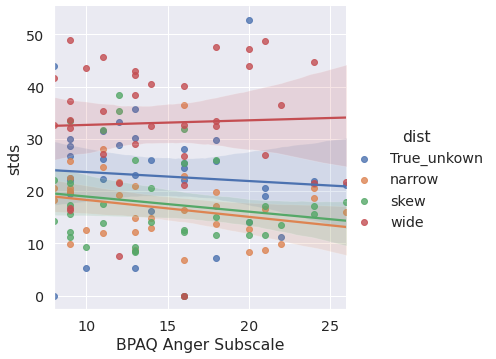

BPAQ Hostility Subscale
True_unkown
36
Kendall r:-0.16738388988985164 p:0.15909041964534587
pearson r:-0.12789368678615365 p:0.45727506016570263
spearman] r:-0.2527276591723246 p:0.13698506979771866
narrow
36
Kendall r:-0.2468169990464571 p:0.03772388516936667
pearson r:-0.2961864348334176 p:0.07943093223292921
spearman] r:-0.3643535596532641 p:0.028911936368962003
skew
36
Kendall r:-0.3071413125163297 p:0.009770043047214367
pearson r:-0.4277139408567857 p:0.009265856897879262
spearman] r:-0.46182817391142866 p:0.004576589999393747
wide
36
Kendall r:0.2630549595100398 p:0.026791484866238044
pearson r:0.26792112571950344 p:0.11414534061810071
spearman] r:0.3841006707503061 p:0.020734576380128898


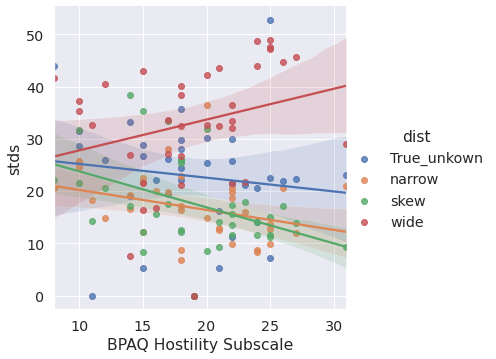

score_ios_p
True_unkown
37
Kendall r:-0.01529018799434744 p:0.9028824338264458
pearson r:-0.00034658197859202197 p:0.9983756556892288
spearman] r:-0.019966595974493094 p:0.9066262299536587
narrow
37
Kendall r:0.008488169201119186 p:0.9459571522129046
pearson r:0.00618558847874022 p:0.9710157518179366
spearman] r:0.003184667028264121 p:0.9850750732533395
skew
37
Kendall r:-0.12571932350907894 p:0.3157241956544622
pearson r:-0.13489058895848993 p:0.42603584058864113
spearman] r:-0.16800114342955383 p:0.3202598812571077
wide
37
Kendall r:0.18504208858439822 p:0.13948730931256667
pearson r:0.26245965051127795 p:0.11656904241052583
spearman] r:0.25146620803947073 p:0.1332642511575934


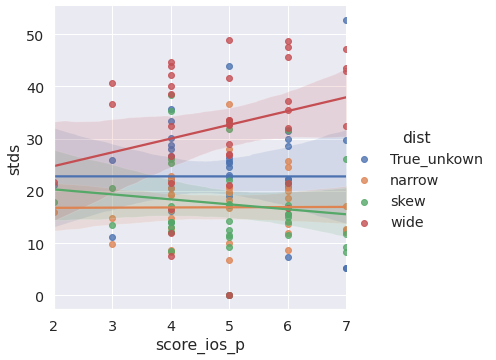

Total ASRM Score
True_unkown
36
Kendall r:0.016599185209153454 p:0.8907398338743842
pearson r:0.09762890012651393 p:0.5710835079979811
spearman] r:0.009850538159393546 p:0.9545303214258376
narrow
36
Kendall r:-0.061368222276681005 p:0.6113003951245155
pearson r:0.07458512128053318 p:0.6655086008571882
spearman] r:-0.1254566752635941 p:0.46596336234031654
skew
36
Kendall r:-0.06307690379478313 p:0.6016711444696625
pearson r:-0.03258512181679892 p:0.8503587197205732
spearman] r:-0.08638662741099734 p:0.6163953408061944
wide
36
Kendall r:0.21727667887149224 p:0.07196067694752399
pearson r:0.2306126935753946 p:0.1760027678321977
spearman] r:0.29134979957909046 p:0.08470222800887704


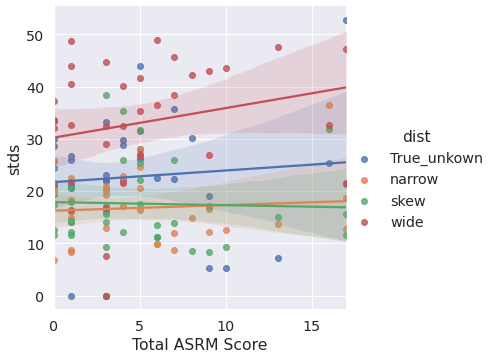

TEPS Anticipatory Scale.1
True_unkown
36
Kendall r:0.10968897668471382 p:0.35322871041614856
pearson r:0.07777848216082957 p:0.6520721597962472
spearman] r:0.15715871629403197 p:0.3599921308878721
narrow
36
Kendall r:-0.02740047184208396 p:0.8164873406395269
pearson r:-0.05081301807059495 p:0.7685221287417799
spearman] r:-0.016243415875458734 p:0.9250876947858089
skew
36
Kendall r:-0.12259356217703309 p:0.2994740617189392
pearson r:-0.1895958931548335 p:0.2680731278702842
spearman] r:-0.15825457280633654 p:0.35660968721453135
wide
36
Kendall r:-0.04674198137767264 p:0.6921965058748212
pearson r:0.1195428590979383 p:0.4874060536978031
spearman] r:-0.002578319980231545 p:0.9880928436926755


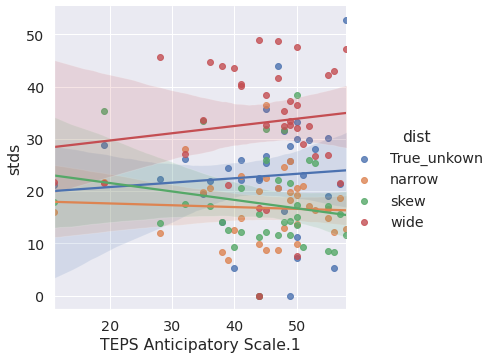

TEPS Consummatory Scale.1
True_unkown
36
Kendall r:0.16803485294929596 p:0.15563407359587852
pearson r:0.19541944986812892 p:0.2533746797154983
spearman] r:0.26887161840131557 p:0.11281816122403829
narrow
36
Kendall r:0.10170952554312156 p:0.38975601830539375
pearson r:0.2144184498168484 p:0.20919792590382918
spearman] r:0.18061131461521973 p:0.29182658984098775
skew
36
Kendall r:-0.0064628789595883055 p:0.9564476596185665
pearson r:0.05222101277500242 p:0.7622902329332832
spearman] r:0.016244461241220698 p:0.925082887265334
wide
36
Kendall r:-0.08556515640929273 p:0.4693466748451819
pearson r:-0.06429131549711563 p:0.709505747710383
spearman] r:-0.107644859174667 p:0.5320398122420791


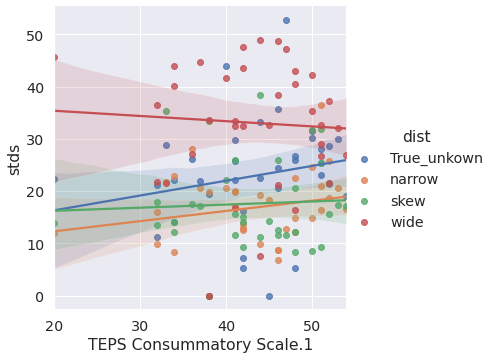

In [18]:
from scipy.stats import pearsonr, spearmanr, kendalltau

var='stds'

columns=full_df.select_dtypes(include=np.number).columns.tolist()
print(columns)
#[full_df['dist']=='True_unkown']

plt_df=full_df[full_df['dist'].isin(
    ['wide','narrow','True_unkown','skew'])].groupby(
    by=['sub','dist']).mean().reset_index()

display(plt_df.head(10))


print(len(plt_df['sub'].unique()))
print(len(plt_df))
#plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=plt_df[(plt_df['stds']>10) & ((plt_df['stds']<24))]

for column in columns:
    print(column)
    
    sns.lmplot(x=column,y=var,data=plt_df,hue='dist')
    #pltr=plt_df[plt_df[column].notna()]
    #print(len(pltr['sub'].unique()))
    #r,p=kendalltau(pltr[var],pltr[column])
    #print("Kendall r:%s p:%s"%(r,p))
    #r,p=pearsonr(pltr[var],pltr[column])
    #print("pearson r:%s p:%s"%(r,p))
    #r,p=spearmanr(pltr[var],pltr[column])
    #print("spearman] r:%s p:%s"%(r,p))

    for dist in plt_df['dist'].unique():
        print(dist)
        
        pltr=plt_df[plt_df['dist']==dist]
        pltr=pltr[(pltr[column].notna())&(pltr[var].notna())]
        
        print(len(pltr['sub'].unique()))
        
        r,p=kendalltau(pltr[var],pltr[column])
        print("Kendall r:%s p:%s"%(r,p))
        r,p=pearsonr(pltr[var],pltr[column])
        print("pearson r:%s p:%s"%(r,p))
        r,p=spearmanr(pltr[var],pltr[column])
        print("spearman] r:%s p:%s"%(r,p))
    plt.show()

['means', 'stds', 'skew', 'Amb', 'Risk_per', 'Money', 'RiskisLeft', 'RT', 'Max_risk', 'Total BDI score', 'TEPS Anticipatory Scale', 'TEPS Consummatory Scale', 'Total AADIS Score', 'SUSD Mania Scale', 'SUSD Depression Scale', 'IRI subscale Perspective Taking', 'IRI subscale Fantasy', 'IRI subscale Empathic Concern', 'IRI subscale Personal Distress', 'AQ subscale Social Skill', 'AQ subscale Attention Switching', 'AQ subscale Attention to detail', 'AQ subscale Communication', 'AQ subscale Imagination', 'AQ Total', 'TEI Subscale wellbeing', 'TEI Subscale selfcontrol', 'TEI Subscale emotionality', 'TEI Subscale sociability', 'TEI Total or global trait emotional intelligence', 'TOTAL PNR', 'PVSS Total Score', 'PVSS Food Subscale', 'PVSS Physical Touch Subscale', 'PVSS Outdoors Subscale', 'PVSS Positive Feedback Subscale', 'PVSS Hobbies Subscale', 'PVSS Social Interactions Subscale', 'PVSS Goals Subscale', 'TOTAL RSE', 'TOTAL BPAQ', 'BPAQ Physical Subscale', 'BPAQ Verbal Subscale', 'BPAQ Ange

sub      means       stds      skew        Amb  Choose_Risk  Risk_per  \
0  sub-1001  51.342212  22.658869  0.110619  75.000000     0.500000    68.750   
1  sub-1007  67.500000   0.000000  0.000000  75.000000     0.500000    76.250   
2  sub-1009  57.505411  24.965343 -0.390059  75.000000     0.500000    68.125   
3  sub-1010  59.562500  23.444143 -0.160655  75.000000     0.500000    71.875   
4  sub-1011  51.425439  23.157346  0.336405  75.000000     0.500000    67.500   
5  sub-1012  52.222222  32.033556 -0.205451  75.000000     0.500000    68.750   
6  sub-1013  65.010130  18.879243 -0.193904  75.000000     0.500000    66.875   
7  sub-1015  51.889347  19.657140  0.120214  73.333333     0.533333    68.000   
8  sub-1021  54.601190  19.180993  0.668565  75.000000     0.500000    63.125   
9  sub-1240  58.982312  24.682451 -0.546847  75.000000     0.500000    74.375   

   Money  RiskisLeft        RT  ...  TOTAL RSE  TOTAL BPAQ  \
0    8.0       0.875  2.271003  ...       33.0        62.0   
1   13.0       0.875  2.531703  ...       20.0        66.0   
2   13.0       1.000  2.174392  ...       11.0        55.0   
3   13.0       0.875  1.800914  ...       27.0        62.0   
4   13.0       1.000  2.234786  ...       16.0        66.0   
5   13.0       0.875  2.649757  ...       12.0        32.0   
6   13.0       1.000  2.199298  ...       11.0        61.0   
7   13.0       0.800  1.929959  ...       13.0        45.0   
8   13.0       0.875  2.062609  ...       24.0        81.0   
9   13.0       0.875  2.098493  ...       27.0        50.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    18.0                  13.0                 16.0   
2                    13.0                  11.0                  9.0   
3                     9.0                  15.0                 11.0   
4                    20.0                  12.0                  9.0   
5                     9.0                   7.0                  8.0   
6                    14.0                  12.0                 14.0   
7                    11.0                  10.0                  9.0   
8                    23.0                   9.0                 26.0   
9                    12.0                  10.0                 11.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     19.0          5.0               3.0   
2                     22.0          6.0               0.0   
3                     27.0          6.0               7.0   
4                     25.0          5.0               6.0   
5                      8.0          5.0               5.0   
6                     21.0          4.0               3.0   
7                     15.0          4.0               1.0   
8                     23.0          2.0               1.0   
9                     17.0          5.0               5.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       44.0                       38.0  
2                       50.0                       53.0  
3                       28.0                       20.0  
4                       44.0                       44.0  
5                       47.0                       40.0  
6                       48.0                       42.0  
7                       45.0                       48.0  
8                       11.0                       32.0  
9                       32.0                       36.0  

[10 rows x 51 columns]

39
39
means
38
Kendall r:-0.1664295874822191 p:0.1413146847719078
pearson r:-0.443161980596125 p:0.005327908704285775
spearman] r:-0.2318634423897582 p:0.16129506903363466


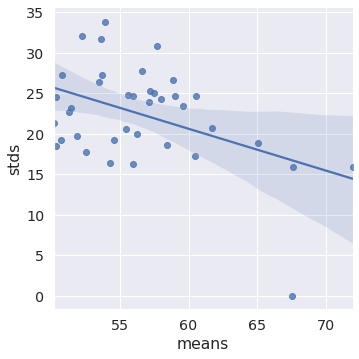

stds
38
Kendall r:1.0 p:3.823926410080564e-45
pearson r:1.0 p:0.0
spearman] r:1.0 p:0.0


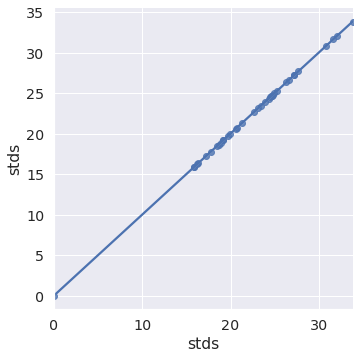

skew
38
Kendall r:-0.1834992887624467 p:0.10485137990421281
pearson r:-0.2258563163147532 p:0.17273877826210332
spearman] r:-0.2688477951635846 p:0.1026510830027987


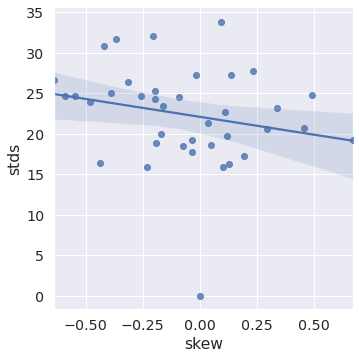

Amb
38
Kendall r:0.10978002512708476 p:0.41418626451935403
pearson r:0.10697962827422623 p:0.5226435201276489
spearman] r:0.13566634684279888 p:0.41671613271975305


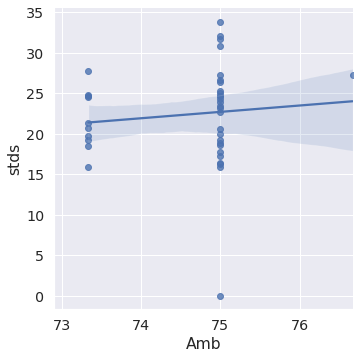

Risk_per
38
Kendall r:-0.023107349483736165 p:0.8402609342508709
pearson r:-0.07351702015938538 p:0.6609188318615191
spearman] r:-0.033863053553987034 p:0.8400492805292066


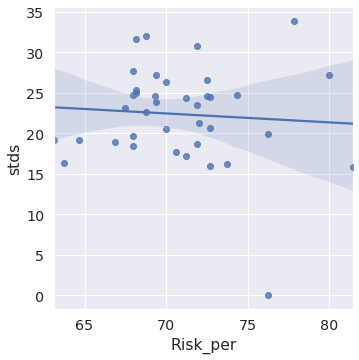

Money
38
Kendall r:0.018601275719234738 p:0.8911981906274486
pearson r:-0.008064446652380777 p:0.9616742813373372
spearman] r:0.022487845792914695 p:0.8933943258549917


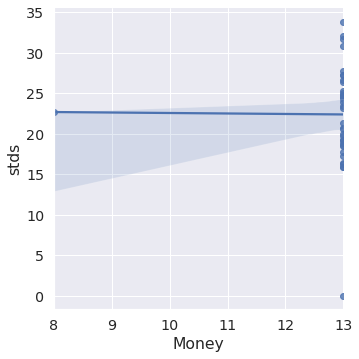

RiskisLeft
38
Kendall r:0.059510272281260386 p:0.6243980352174727
pearson r:0.15575239722551676 p:0.3504251365121946
spearman] r:0.08926344540148456 p:0.5940742087114635


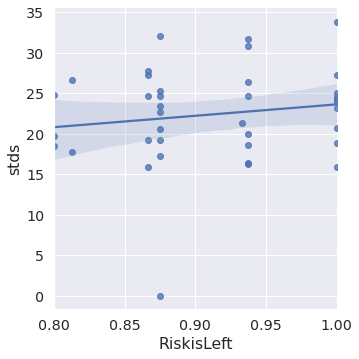

RT
38
Kendall r:-0.1891891891891892 p:0.09451183368020265
pearson r:-0.28712407180348376 p:0.08049174762780599
spearman] r:-0.26950432213590103 p:0.101782087356836


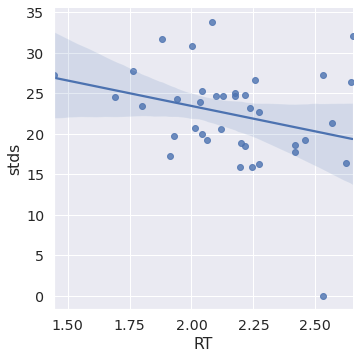

Max_risk
38
Kendall r:-0.023107349483736165 p:0.8402609342508709
pearson r:-0.07351702015938538 p:0.6609188318615191
spearman] r:-0.033863053553987034 p:0.8400492805292066


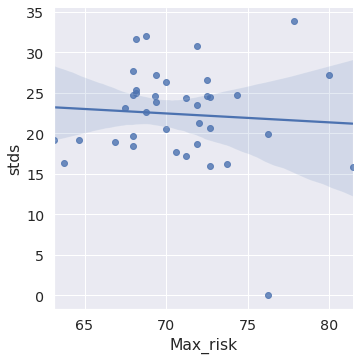

Total BDI score
29
Kendall r:0.07128583093062782 p:0.5971374674019954
pearson r:0.12958772105888955 p:0.5028651230133122
spearman] r:0.07227811340256157 p:0.7094488934610585


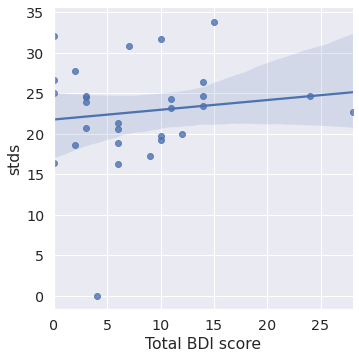

TEPS Anticipatory Scale
31
Kendall r:-0.0545915293882044 p:0.6701537331631748
pearson r:-0.1122130812154875 p:0.5478370187492219
spearman] r:-0.0753384399679713 p:0.6870936538147273


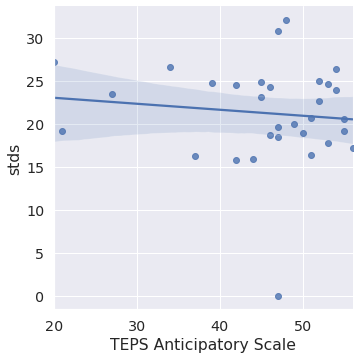

TEPS Consummatory Scale
31
Kendall r:-0.07905122330655967 p:0.5392328968806281
pearson r:-0.06968218388394974 p:0.7095326773828816
spearman] r:-0.10369956969912068 p:0.5787932152332285


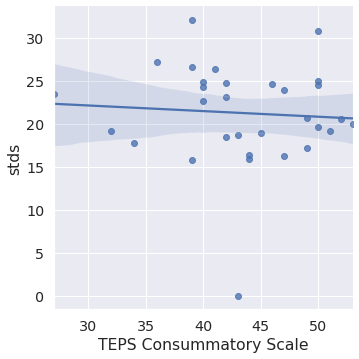

Total AADIS Score
31
Kendall r:0.12087467827399317 p:0.3656961781162066
pearson r:0.10388451332816204 p:0.5781125524835193
spearman] r:0.15541534417752884 p:0.4038040285613361


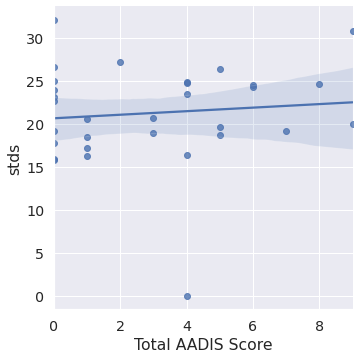

SUSD Mania Scale
31
Kendall r:-0.05983893490193132 p:0.6530208193054305
pearson r:-0.05495400847119417 p:0.7690488994799468
spearman] r:-0.06896615591660524 p:0.7123908022520793


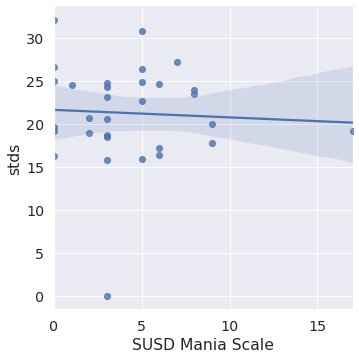

SUSD Depression Scale
31
Kendall r:0.013576884666042614 p:0.9178582348116662
pearson r:0.023955401410619418 p:0.8982161697745423
spearman] r:0.00895532115544477 p:0.9618652999454731


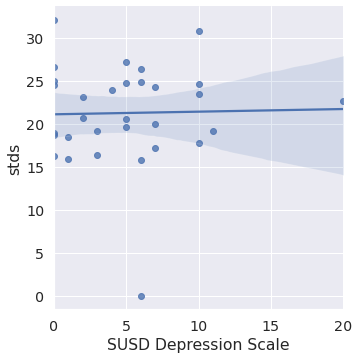

IRI subscale Perspective Taking
31
Kendall r:0.08803229617043969 p:0.4949916225477742
pearson r:0.05780855276487875 p:0.7574006196378806
spearman] r:0.13607009625901276 p:0.46546465795580694


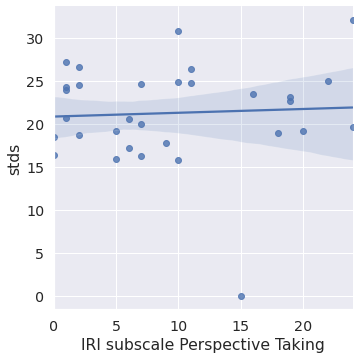

IRI subscale Fantasy
31
Kendall r:0.12615838451017694 p:0.329837111116807
pearson r:0.16244622104417594 p:0.38260083169027465
spearman] r:0.1515260763124834 p:0.4158132899634922


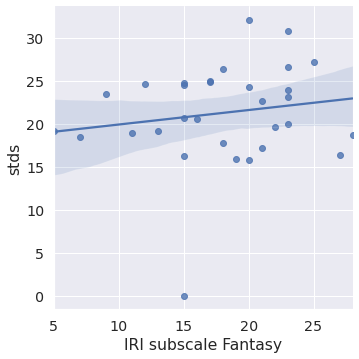

IRI subscale Empathic Concern
31
Kendall r:0.035212918468175876 p:0.7848866714163889
pearson r:0.06896654765774023 p:0.7123892375123031
spearman] r:0.07319075014229215 p:0.6955842919864423


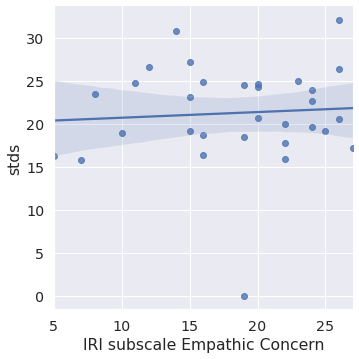

IRI subscale Personal Distress
31
Kendall r:-0.12063753412604833 p:0.3484002555773428
pearson r:-0.0705806908784302 p:0.7059516364728737
spearman] r:-0.16530306332979802 p:0.37417372502421953


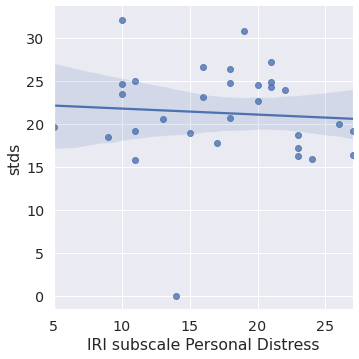

AQ subscale Social Skill
31
Kendall r:0.013234685919952752 p:0.9184246497830695
pearson r:0.07532048675934919 p:0.687164476695582
spearman] r:0.008698339136140999 p:0.9629588578123157


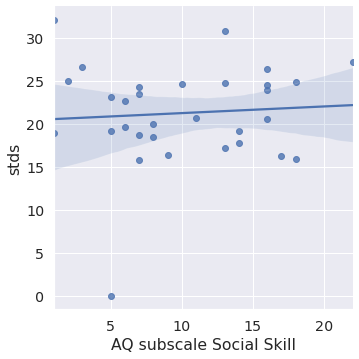

AQ subscale Attention Switching
38
Kendall r:-0.14683912262377175 p:0.21919025160243866
pearson r:-0.18328549710240105 p:0.27069290424033576
spearman] r:-0.20233770382504104 p:0.22311880041683635


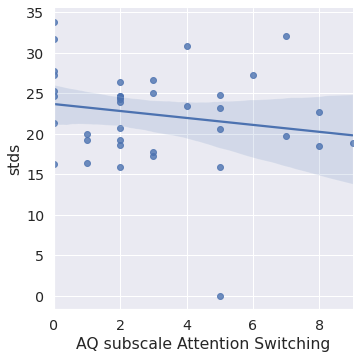

AQ subscale Attention to detail
38
Kendall r:-0.34916483647277047 p:0.003164128383490859
pearson r:-0.4588430606435985 p:0.003761638969489958
spearman] r:-0.48747961078843105 p:0.0019077005029819606


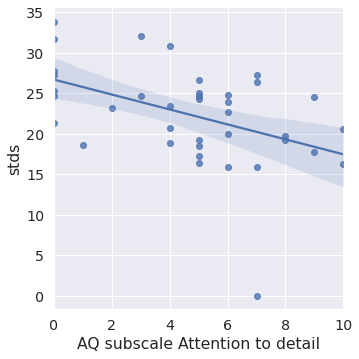

AQ subscale Communication
38
Kendall r:-0.23703958891729984 p:0.04478056158164266
pearson r:-0.22919060590434248 p:0.16631720912606587
spearman] r:-0.3625561992347378 p:0.025285600863539683


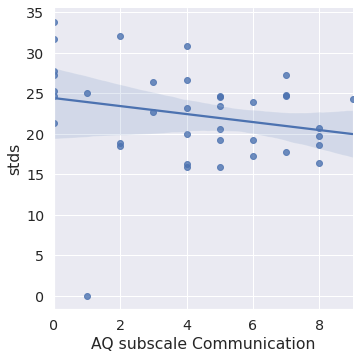

AQ subscale Imagination
38
Kendall r:-0.24881235852814437 p:0.03638370522884038
pearson r:-0.3271785635830213 p:0.04495725422482909
spearman] r:-0.3583965251471377 p:0.027141227245313888


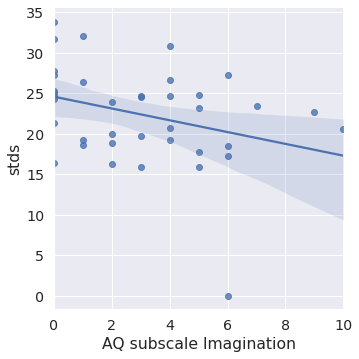

AQ Total
29
Kendall r:0.07303663053486033 p:0.593607413005174
pearson r:-0.16607242399580052 p:0.3892435830403407
spearman] r:0.07042754092466609 p:0.7165806597477054


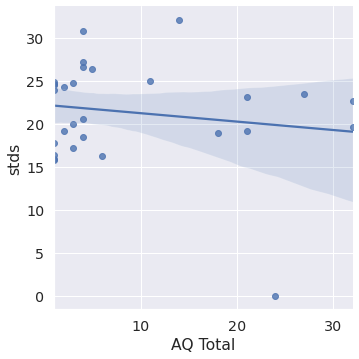

TEI Subscale wellbeing
38
Kendall r:-0.17962406974109912 p:0.1200518402926878
pearson r:-0.19303396219654495 p:0.2455801295809922
spearman] r:-0.2889675418561219 p:0.07848157525713687


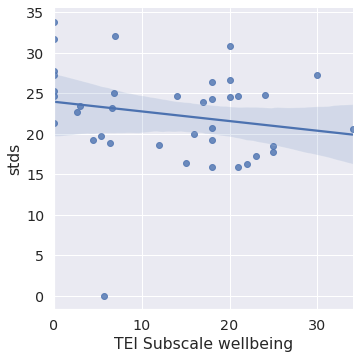

TEI Subscale selfcontrol
31
Kendall r:0.12446868700510604 p:0.33143355786760176
pearson r:0.14524812082418267 p:0.43561340698279255
spearman] r:0.18523415583385622 p:0.3184608198032056


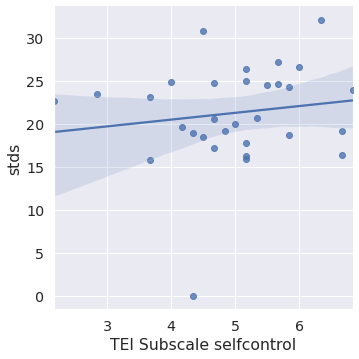

TEI Subscale emotionality
31
Kendall r:0.0043528689555934474 p:0.9728318228819063
pearson r:0.06216626420102734 p:0.7397194913392741
spearman] r:0.0038360627851974183 p:0.9836599706571991


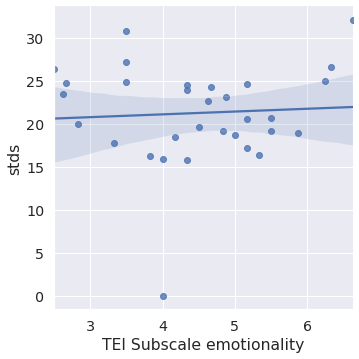

TEI Subscale sociability
31
Kendall r:-0.03053741997059292 p:0.811536745296079
pearson r:-0.07381426228199209 p:0.6931155293387761
spearman] r:-0.061181291760867756 p:0.7437049313503118


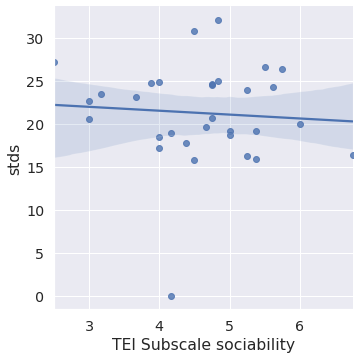

TEI Total or global trait emotional intelligence
31
Kendall r:-0.028578331550164576 p:0.8244287248433061
pearson r:-0.011454066541080554 p:0.9512360096476932
spearman] r:-0.04429634846966649 p:0.8129574635051409


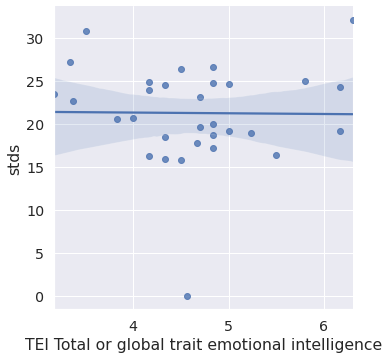

TOTAL PNR
31
Kendall r:-0.06904027524039344 p:0.5863580925863225
pearson r:-0.21295195763946018 p:0.25006355757092563
spearman] r:-0.113139059326277 p:0.5445174319263957


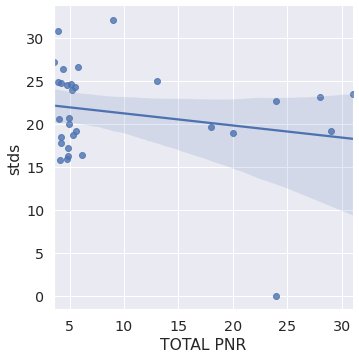

PVSS Total Score
30
Kendall r:0.04849936262523462 p:0.7077049226118021
pearson r:0.003569603130365466 p:0.9850638651721874
spearman] r:0.08903729814906762 p:0.6398658554397477


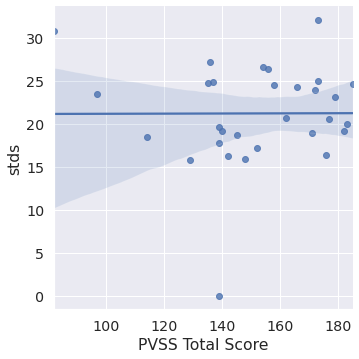

PVSS Food Subscale
30
Kendall r:-0.14605385359820927 p:0.27230132184797073
pearson r:-0.20825103789211183 p:0.2694487648366903
spearman] r:-0.256560482469993 p:0.1711355681349435


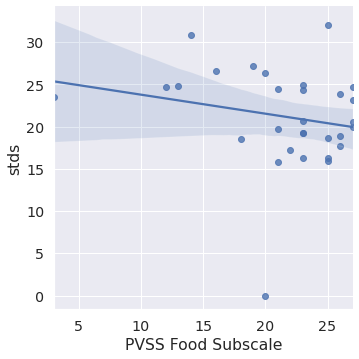

PVSS Physical Touch Subscale
30
Kendall r:0.14172876862765874 p:0.2821276155146797
pearson r:0.12435481958178082 p:0.5126439078880092
spearman] r:0.18734078246822017 p:0.32152945687361517


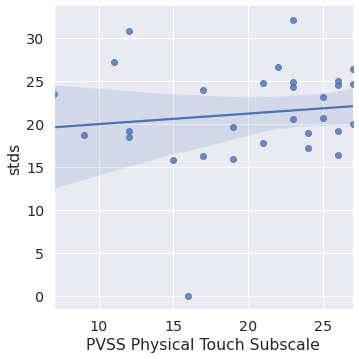

PVSS Outdoors Subscale
30
Kendall r:0.01651499268666151 p:0.9001692922752778
pearson r:-0.03198174994131758 p:0.8667637489507916
spearman] r:0.0562566153847916 p:0.767786803178589


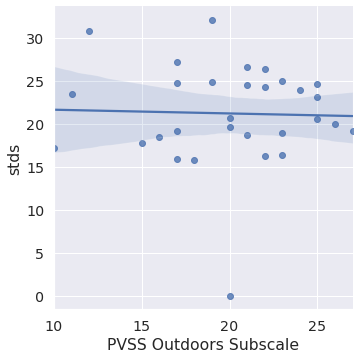

PVSS Positive Feedback Subscale
30
Kendall r:0.17912826186951514 p:0.1775240145672914
pearson r:0.18052279028811122 p:0.3397678265020526
spearman] r:0.24334482982963018 p:0.19504407924622313


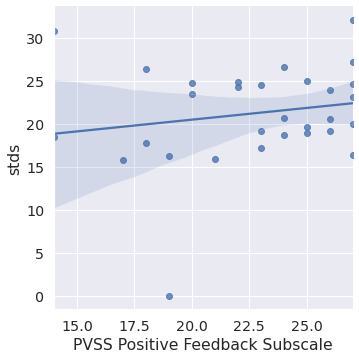

PVSS Hobbies Subscale
30
Kendall r:0.093378693284101 p:0.48281482572519374
pearson r:-0.0626125281867349 p:0.7423873870973693
spearman] r:0.13397891613113486 p:0.4802855935482335


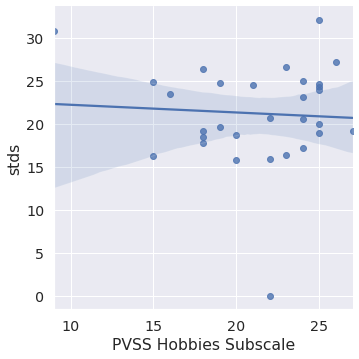

PVSS Social Interactions Subscale
30
Kendall r:0.14567140814584598 p:0.27833730903741216
pearson r:0.03574578873390994 p:0.8512466054725168
spearman] r:0.1969758212654834 p:0.29680796733536685


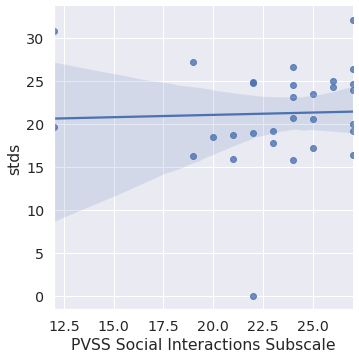

PVSS Goals Subscale
30
Kendall r:0.06797999046806145 p:0.6126203983709102
pearson r:0.007432141430706529 p:0.9689077398853285
spearman] r:0.09767731561784133 p:0.6076027219485648


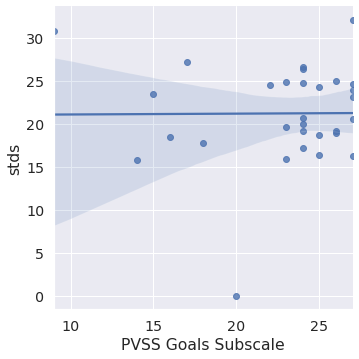

TOTAL RSE
37
Kendall r:0.010815226090068124 p:0.9267344706033759
pearson r:0.0017919781008415153 p:0.9916015830951629
spearman] r:0.03199733560633359 p:0.8508767243403939


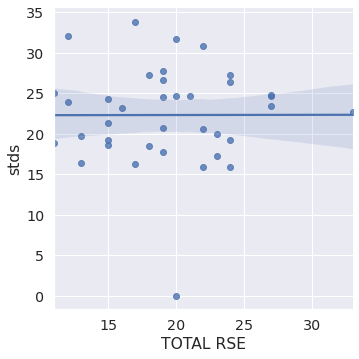

TOTAL BPAQ
36
Kendall r:-0.1966477748818927 p:0.09354673653499489
pearson r:-0.2461493324917946 p:0.1478555125898386
spearman] r:-0.27484068972645026 p:0.10474753327959875


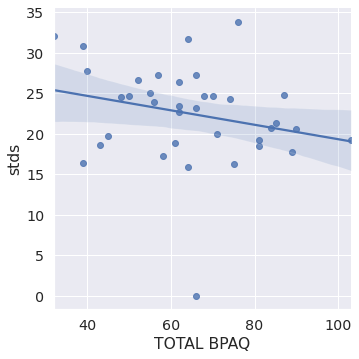

BPAQ Physical Subscale
36
Kendall r:-0.18156380626896074 p:0.12582978694122168
pearson r:-0.2569148508352424 p:0.13037968009519232
spearman] r:-0.27384279162328884 p:0.10606537287995138


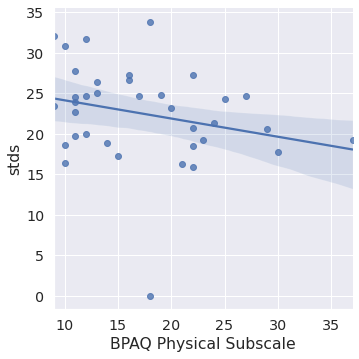

BPAQ Verbal Subscale
36
Kendall r:-0.13319738343710114 p:0.26705644250483973
pearson r:-0.16871410116933966 p:0.3252954986320524
spearman] r:-0.17819937588506976 p:0.2984262459850133


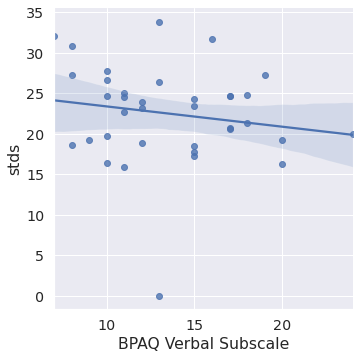

BPAQ Anger Subscale
36
Kendall r:-0.13977503200189625 p:0.24400295811507977
pearson r:-0.15175402664682575 p:0.3769538362915935
spearman] r:-0.17812793169060895 p:0.2986231746883617


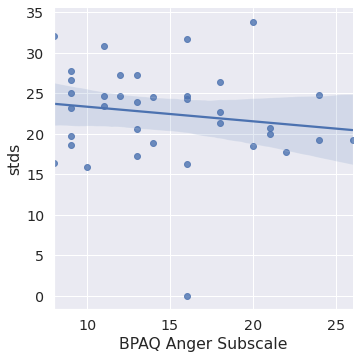

BPAQ Hostility Subscale
36
Kendall r:-0.12990368370866162 p:0.27412991506651074
pearson r:-0.16422165956251597 p:0.33852944367575327
spearman] r:-0.18443543632465975 p:0.28155636670936984


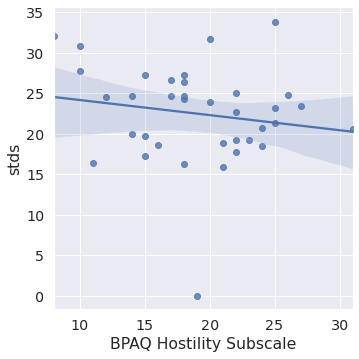

score_ios_p
37
Kendall r:0.06960298744917731 p:0.578324878342303
pearson r:0.10056077193146433 p:0.5537186763391063
spearman] r:0.09113047188571174 p:0.5916700209824317


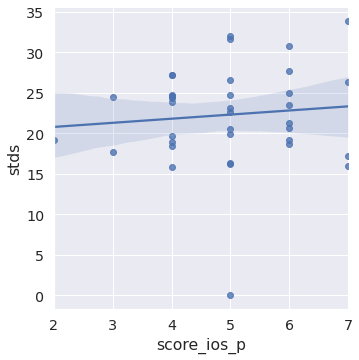

Total ASRM Score
36
Kendall r:0.07463702709326069 p:0.5365073783903493
pearson r:0.2136747598711286 p:0.2108197104059137
spearman] r:0.11366271095678931 p:0.509220225097512


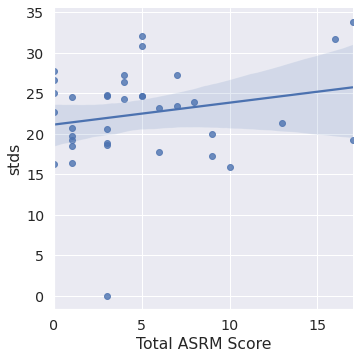

TEPS Anticipatory Scale.1
36
Kendall r:0.011282547229093396 p:0.9238729927442716
pearson r:0.03904148871987044 p:0.8211485880139445
spearman] r:0.040995287685681565 p:0.8123537605728811


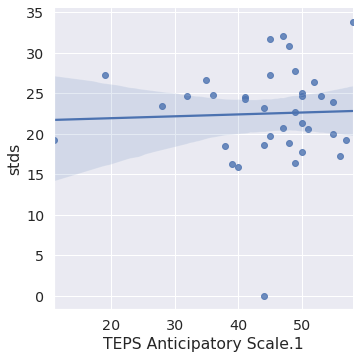

TEPS Consummatory Scale.1
36
Kendall r:0.10170952554312156 p:0.38975601830539375
pearson r:0.14861917652381257 p:0.3870039663264915
spearman] r:0.14864014686034857 p:0.3869362226570747


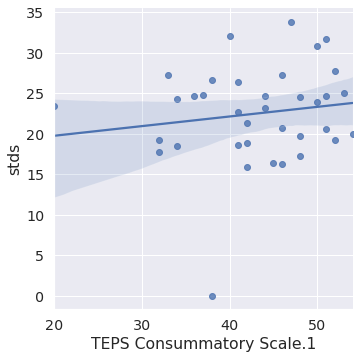

In [19]:
var='stds'

columns=full_df.select_dtypes(include=np.number).columns.tolist()
print(columns)
#[full_df['dist']=='True_unkown']

plt_df=full_df[full_df['dist'].isin(
    ['wide','narrow','True_unkown','skew'])].groupby(
    by=['sub']).mean().reset_index()

display(plt_df.head(10))


print(len(plt_df['sub'].unique()))
print(len(plt_df))
#plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=plt_df[(plt_df['stds']>10) & ((plt_df['stds']<24))]

for column in columns:
    print(column)
    
    sns.lmplot(x=column,y=var,data=plt_df)
    
    
    pltr=plt_df[(plt_df[column].notna())&(plt_df[var].notna())]
    print(len(pltr['sub'].unique()))
    r,p=kendalltau(pltr[var],pltr[column])
    print("Kendall r:%s p:%s"%(r,p))
    r,p=pearsonr(pltr[var],pltr[column])
    print("pearson r:%s p:%s"%(r,p))
    r,p=spearmanr(pltr[var],pltr[column])
    print("spearman] r:%s p:%s"%(r,p))
    
    plt.show()

In [39]:
mod_df=df_a[(df_a['dist'].isin(['narrow']))&(df_a['Amb'].isin([100]))]

model = Lmer("Choose_Risk ~ Risk_per+(Risk_per|sub)", data=mod_df, family='binomial')
display(model.fit(robust='hcl'))
#display(model.summary())
display(model.coefs)

subData=model.fixef.reset_index().rename(columns={'index':'sub'})
full_df

Formula: Choose_Risk~Risk_per+(Risk_per|sub)

Family: binomial	 Inference: parametric

Number of observations: 402	 Groups: {'sub': 51.0}

Log-likelihood: -158.901 	 AIC: 327.801

Random effects:

            Name     Var    Std
sub  (Intercept)  12.293  3.506
sub     Risk_per   0.004  0.064

             IV1       IV2   Corr
sub  (Intercept)  Risk_per -0.924

Fixed effects:



Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)    -5.346  -7.226   -3.466  0.959  0.005      0.001       0.031   
Risk_per        0.127   0.087    0.166  0.020  1.135      1.091       1.181   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val  Sig  
(Intercept)  0.005        0.001         0.030  -5.574    0.0  ***  
Risk_per     0.532        0.522         0.541   6.299    0.0  ***

Estimate    2.5_ci   97.5_ci        SE        OR  OR_2.5_ci  \
(Intercept) -5.346039 -7.225955 -3.466123  0.959159  0.004767   0.000727   
Risk_per     0.126896  0.087414  0.166378  0.020144  1.135299   1.091348   

             OR_97.5_ci      Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  \
(Intercept)    0.031238  0.004744     0.000727      0.030292 -5.573676   
Risk_per       1.181019  0.531682     0.521840      0.541499  6.299368   

                    P-val  Sig  
(Intercept)  2.494198e-08  ***  
Risk_per     2.988620e-10  ***

dist      means       stds      skew       sub  Amb  Choose_Risk  \
0         narrow  66.153846  28.010987 -1.262250  sub-1240   50        False   
1         narrow  66.153846  28.010987 -1.262250  sub-1240   50         True   
2         narrow  66.153846  28.010987 -1.262250  sub-1240  100        False   
3         narrow  66.153846  28.010987 -1.262250  sub-1240  100         True   
4           skew  69.411765  17.489493 -0.454943  sub-1240   50        False   
..           ...        ...        ...       ...       ...  ...          ...   
601  True_unkown  29.523810  23.124920  0.331951  sub-1248  100         True   
602         wide  56.764706  28.995359 -0.275471  sub-1248   50        False   
603         wide  56.764706  28.995359 -0.275471  sub-1248   50         True   
604         wide  56.764706  28.995359 -0.275471  sub-1248  100        False   
605         wide  56.764706  28.995359 -0.275471  sub-1248  100         True   

     Risk_per  Money   Color  ...  TOTAL RSE TOTAL BPAQ  \
0          40     13    blue  ...       27.0       50.0   
1          90     13    blue  ...       27.0       50.0   
2          80     13    blue  ...       27.0       50.0   
3          90     13    blue  ...       27.0       50.0   
4          30     13     red  ...       27.0       50.0   
..        ...    ...     ...  ...        ...        ...   
601        90     13  yellow  ...       22.0       90.0   
602        70     13    blue  ...       22.0       90.0   
603        90     13    blue  ...       22.0       90.0   
604        30     13    blue  ...       22.0       90.0   
605        90     13    blue  ...       22.0       90.0   

     BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                      12.0                  10.0                 11.0   
1                      12.0                  10.0                 11.0   
2                      12.0                  10.0                 11.0   
3                      12.0                  10.0                 11.0   
4                      12.0                  10.0                 11.0   
..                      ...                   ...                  ...   
601                    29.0                  17.0                 13.0   
602                    29.0                  17.0                 13.0   
603                    29.0                  17.0                 13.0   
604                    29.0                  17.0                 13.0   
605                    29.0                  17.0                 13.0   

     BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                       17.0          5.0               5.0   
1                       17.0          5.0               5.0   
2                       17.0          5.0               5.0   
3                       17.0          5.0               5.0   
4                       17.0          5.0               5.0   
..                       ...          ...               ...   
601                     31.0          5.0               3.0   
602                     31.0          5.0               3.0   
603                     31.0          5.0               3.0   
604                     31.0          5.0               3.0   
605                     31.0          5.0               3.0   

     TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                         32.0                       36.0  
1                         32.0                       36.0  
2                         32.0                       36.0  
3                         32.0                       36.0  
4                         32.0                       36.0  
..                         ...                        ...  
601                       51.0                       51.0  
602                       51.0                       51.0  
603                       51.0                       51.0  
604                       51.0                       51.0  
605                       51.0      

In [20]:
var='stds'
ID='TOTAL AQ'
plt_df=full_df[(full_df['dist'].isin(['narrow','skew']))].copy()
plt_df=plt_df.groupby(by=['sub','dist']).mean().reset_index()
               
display(plt_df.head())
g=sns.lmplot(x=var,y=ID,data=plt_df,hue='dist',palette=['Tab:orange','tab:blue'])

plt.title("",weight='bold').set_fontsize('18')
plt.xlabel('Reported Variance',weight='bold').set_fontsize('18')
plt.ylabel('AQ Score',weight='bold').set_fontsize('18')

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    pltr=plt_df[(plt_df[column].notna())&(plt_df['dist']==dist)]
    print(len(pltr))
    r,p=pearsonr(pltr[var],pltr[ID])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Unkown', 'Wide']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()

sub    dist      means       stds      skew   Amb  Choose_Risk  \
0  sub-1001  narrow  22.222222  19.860625  0.222881  75.0          0.5   
1  sub-1001    skew  83.000000  11.595018  0.342125  75.0          0.5   
2  sub-1007  narrow  50.000000   0.000000  0.000000  75.0          0.5   
3  sub-1007    skew  90.000000   0.000000  0.000000  75.0          0.5   
4  sub-1009  narrow  39.545455  20.581377 -0.654108  75.0          0.5   

   Risk_per  Money  RiskisLeft  ...  TOTAL RSE  TOTAL BPAQ  \
0      67.5    8.0        1.00  ...       33.0        62.0   
1      72.5    8.0        0.75  ...       33.0        62.0   
2      80.0   13.0        0.75  ...       20.0        66.0   
3      80.0   13.0        1.00  ...       20.0        66.0   
4      62.5   13.0        1.00  ...       11.0        55.0   

   BPAQ Physical Subscale  BPAQ Verbal Subscale  BPAQ Anger Subscale  \
0                    11.0                  11.0                 18.0   
1                    11.0                  11.0                 18.0   
2                    18.0                  13.0                 16.0   
3                    18.0                  13.0                 16.0   
4                    13.0                  11.0                  9.0   

   BPAQ Hostility Subscale  score_ios_p  Total ASRM Score  \
0                     22.0          5.0               0.0   
1                     22.0          5.0               0.0   
2                     19.0          5.0               3.0   
3                     19.0          5.0               3.0   
4                     22.0          6.0               0.0   

   TEPS Anticipatory Scale.1  TEPS Consummatory Scale.1  
0                       49.0                       41.0  
1                       49.0                       41.0  
2                       44.0                       38.0  
3                       44.0                       38.0  
4                       50.0                       53.0  

[5 rows x 52 columns]

KeyError: "['TOTAL AQ'] not in index"

In [ ]:
var='stds'
ID='AQ Total'
dist_list=['skew','narrow']

plt_df=full_df[full_df['dist'].isin(dist_list)].groupby(by=['sub','dist']).mean().reset_index()
#plt_df=plt_df.groupby(by=['sub','dist']).mean().reset_index()
#plt_df=plt_df[plt_df[ID]!=0]
#plt_df=plt_df[(plt_df[])]
print(len(plt_df['sub'].unique()))
               
display(plt_df.head())
g=sns.lmplot(x=var,y=ID,data=plt_df,
             hue='dist',palette=['Tab:red','tab:green'])

plt.title("",weight='bold').set_fontsize('18')
plt.xlabel('Reported Variance',weight='bold').set_fontsize('18')
plt.ylabel('AQ Score',weight='bold').set_fontsize('18')


for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=kendalltau(sub_df[var],sub_df[ID])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Narrow', 'Skewed']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()




In [ ]:
t_df=full_df[full_df['Choose_Risk']==False].copy().dropna()
t_df['diff']=0
data=[]
for sub in t_df['sub'].unique():
    for dist in t_df.dist.unique():
        if len(t_df[(t_df['sub']==sub)&(t_df['dist']==dist)])==2:
    
            val1=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==50)]['Risk_per'].values
            val2=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==100)]['Risk_per'].values
            val3=np.subtract(val1[0],val2[0])
            data.append([sub,dist,val1[0],val2[0],val3])
        else:
            display(t_df[(t_df['sub']==sub)&(t_df['dist']==dist)])
            val1=t_df[(t_df['sub']==sub)&(t_df['dist']==dist)&(t_df['Amb']==50)]['Risk_per'].values
            val2=0
            val3=np.subtract(val1[0],val2)
            data.append([sub,dist,val1[0],val2,val3])


In [ ]:
part_df=pd.DataFrame(columns=['sub','dist','max50','max100','diff'],data=data)
display(part_df.head())

full_df=full_df.merge(part_df,on=['sub','dist'])
full_df.columns


plt_df=full_df.groupby(by=['sub','dist']).mean().reset_index()#[full_df['dist']=='wide']
display(plt_df)

plt_df['stds_half']=plt_df.groupby(['dist'])['diff'].transform(lambda x: pd.qcut(x, q=2))

#sns.barplot(x='dist',y='diff',hue="stds_half",data=plt_df,ci=68)
from scipy.stats import ttest_ind

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    cat1 = sub_df[sub_df['stds_half']=='low']
    cat2 = sub_df[sub_df['stds_half']=='high']

    t,p=ttest_ind(cat1['diff'], cat2['diff'])
    print("t:%s , p:%s"%(t,p))

mod_df=plt_df
display(mod_df)

model = Lm("max100 ~means*dist", data=plt_df, family='gaussian')
sns.lmplot(y='diff',x='means',hue='dist',data=plt_df)
display(model.fit())
#display(model.summary())
#display(model.coefs)

plt_df['resids']=model.residuals


dists=['narrow','skew',"True_unkown",'wide']
mod_df=plt_df[plt_df['dist'].isin(dists)]
model = Lmer("resids ~stds*dist+(1|sub)", data=mod_df, family='gaussian')
display(model.fit())

sns.lmplot(y='resids',x='stds',hue='dist',data=mod_df)


In [ ]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau


#Choose Range and Metric Max vs Min
#plt_df=sub_df[(sub_df['Choose_Risk']==True)]

for dist in full_df['dist'].unique():
    print(dist)
    plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
    plt_df=plt_df[(plt_df['means']>40) & ((plt_df['means']<80))]
    display(plt_df)
    
    
    #var='means'

    #sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    #r,p=spearmanr(plt_df[var],plt_df['Risk_per'])
    #print("r^2:%s p:%s"%(r**2,p))
    #plt.show()
    
    var='stds'

    sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    r,p=spearmanr(plt_df[var],plt_df['diff'])
    print("r^2:%s p:%s"%(r**2,p))
    plt.show()
    
    #var='skew'

    #sns.lmplot(x=var,y='diff',hue='dist',data=plt_df)

    #r,p=spearmanr(plt_df[var],plt_df['Risk_per'])
    #print("r^2:%s p:%s"%(r**2,p))
    #plt.show()
    
    sns.relplot(x="means", y="diff", hue="stds",data=plt_df,size='stds')
    plt.show()

In [ ]:
dist='skew'
var='stds'


plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=full_df[(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
#plt_df = plt_df.dropna(axis=0)

plt_df=plt_df[(plt_df['means']>50) & ((plt_df['means']<70))]
sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)

r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

dist='narrow'
var='stds'


plt_df=full_df[(full_df['dist']==dist)&(full_df['Amb']==100)&(full_df['Choose_Risk']==True)]
#plt_df=full_df[(full_df['Amb']==100)&(full_df['Choose_Risk']==False)]
#plt_df = plt_df.dropna(axis=0)

plt_df=plt_df[(plt_df['means']>30) & ((plt_df['means']<70))]
sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)

r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

In [ ]:


plt_df=full_df.groupby(
    by=['sub','dist']).mean().reset_index()[[
    'sub','dist','means','stds','score_asrm','score_aq_total','score_bpaq_total']]
display(plt_df)

sns.pairplot(plt_df, x_vars=["means", "stds"], y_vars=["score_asrm","score_aq_total","score_bpaq_total"],
             hue='dist',hue_order=['wide','True_unkown','skew','narrow'], kind="reg",
            height=4,aspect=1);

In [ ]:
#import matplotlib
#matplotlib.rc_file_defaults()
sns.set_context("paper")
sns.set_style("white")


g=sns.pairplot(plt_df,hue='dist',hue_order=['wide','True_unkown','skew','narrow'], kind="reg",
            height=4,aspect=1);
g.axes[0,0].set_xlim((0,85))
g.axes[0,1].set_xlim((0,55))

g.axes[4,0].set_xlabel('Reported Mean',weight='bold').set_fontsize('18')
g.axes[4,1].set_xlabel('Reported Deviation',weight='bold').set_fontsize('18')

g.axes[4,0].set_ylabel('BPAQ',weight='bold').set_fontsize('18')
g.axes[3,0].set_ylabel('AQ',weight='bold').set_fontsize('18')
g.axes[2,0].set_ylabel('ASRM',weight='bold').set_fontsize('18')





plt.savefig("ind_diffs.svg")

In [ ]:
var='stds'
plt_df=full_df[(full_df['dist'].isin(['narrow','skew']))].copy()
               
g=sns.lmplot(x=var,y='score_bpaq_total',data=plt_df,hue='dist',
             hue_order=['skew','narrow'],
             palette=['Tab:green','tab:red'])

plt.xlabel('Reported Mean').set_fontsize('18')
plt.ylabel('BPAQ Score').set_fontsize('18')

g.axes[0][0].set_title("Realtionship Agression and Reported Variance")

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=spearmanr(sub_df[var],sub_df['score_bpaq_total'])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
new_labels = ['skew', 'narrow']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.show()

In [ ]:
var='stds'

plt_df=full_df[(full_df['dist'].isin(['skew','narrow']))].copy()
               
g=sns.lmplot(x=var,y='score_aq_total',data=plt_df,hue='dist',
             hue_order=['skew','narrow'], palette=['Tab:green','tab:red'])

plt.xlabel('Reported Mean').set_fontsize('18')
plt.ylabel('AQ Score').set_fontsize('18')

g.axes[0][0].set_title("Realtionship Agression and Reported Variance")

plt_df=plt_df.dropna()

for dist in plt_df['dist'].unique():
    print(dist)
    sub_df=plt_df[plt_df['dist']==dist]
    r,p=spearmanr(sub_df[var],sub_df['score_aq_total'])
    print("r:%s p:%s"%(r,p))

new_title = 'Distribution'
g._legend.set_title(new_title)
# replace labels
#new_labels = ['Narrow', 'Skew']
#for t, l in zip(g._legend.texts, new_labels):
    #t.set_text(l)

plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

new_df=sub_df.merge(per_df,on=['sub'])


df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()
df_aMax=df_a[df_a['Choose_Risk']==False]
plt_df=df_aMax[df_aMax['Amb']==100]

plt_df=plt_df.merge(new_df,on=['sub','dist'])
plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
#display(plt_df.head())


var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

sns.swarmplot(x='Amb',y='Risk_per',hue='Choose_Risk',data=plt_df)

In [ ]:
print("Narrow vs Wide At 50")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb']==50)]
model = Lmer("Choose_Risk ~dist*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Narrow: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['narrow']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Wide: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))

print("Skew: 50vs100")
mod_df=df_a[(df_a['dist'].isin(['skew']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~Amb*Risk_per+(Risk_per|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))


print("Narrow vs Wide At 50 vs 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]
model = Lmer("Choose_Risk ~dist*Amb*Risk_per+(1|sub)", data=mod_df, family='binomial')
display(model.fit(robust="hcl"))


#mode_df=df_a[df_a['Amb']==100]
#model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+dist",family=sm.families.Binomial(), data=mod_df)
#res=model.fit()
#res.summary()

# Interaction:
- [ ] Is there an interaction between 2nd order variance and "Ambiguity"

    Yes Greater decrease for the wide than Narrow [x]
        Increase for the Skew [x]
        No change for the "True Unknown" [?]

In [ ]:
df_a.dist.unique()

In [ ]:
plotData=df_a[df_a['dist'].isin(['narrow','wide','skew'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,
           hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.03,
                 col="dist",ci=68)

titles=['Wide','Narrow','Skewed']
for i,a in enumerate(graph.axes[0]):
    if i==0:
        a.set_ylabel('Chose Risky Lottery')
    a.set_xlabel('Chance of Winning')
    a.set_title(titles[i])
    a.axhline(y=0.5,color='grey')
    a.axvline(x=50,color='grey')

In [ ]:
plotData=df_a[df_a['dist'].isin(['wide'])]
    
graph=sns.lmplot(x='Risk_per',y='Choose_Risk', data=plotData ,palette='Blues',
           hue='Amb',logistic=True,x_jitter=0.5,y_jitter=0.03,ci=68)

plt.title('Wide')
plt.xlabel('Chance of Winning')
plt.ylabel('Chose Risky Lottery')

plt.plot([20,90], [0.5,0.5], linewidth=2,color='grey')
plt.plot([50,50], [0,1], linewidth=2,color='grey')

In [ ]:
df_aMax=df_a.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).min()
df_aMax=df_aMax[df_aMax['Choose_Risk']==True]
df_aMax.head()
sns.violinplot(x='dist',y="Risk_per",hue='Amb',data=df_aMax)

g = sns.catplot(x="Amb", y="Risk_per", hue="sub", col="dist",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df_aMax)

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm
from pymer4.models import Lmer

print("Narrow vs Wide At 100")

mod_df=df_aMax[(df_aMax['dist'].isin(['narrow','wide']))&(df_aMax['Amb'].isin([100,50]))]
model = Lmer("Risk_per ~dist*Amb+(1|sub)", data=mod_df, family='gaussian')
display(model.fit())

a=np.array(
    mod_df[(mod_df['dist']=='narrow')& (mod_df['Amb']==100)]['Risk_per'])
b=np.array(
    mod_df[(mod_df['dist']=='wide')& (mod_df['Amb']==100)]['Risk_per'])

from scipy.stats import ttest_rel



In [ ]:
display(df_a.groupby(by=["sub","dist","Amb","Choose_Risk"]).min())
plot_df=df_a[df_a['Choose_Risk']==True]
sns.boxplot(x='dist',y="Risk_per",hue='Amb',data=plot_df)

In [ ]:
eq_df=[]
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

clf=linear_model.LogisticRegression(penalty='l2',C=10,solver='liblinear')

for sub in df_a['sub'].unique():
    for amb in df_a['Amb'].unique():
        for dist in df_a['dist'].unique():
            df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
            X=np.array(df_reg['Risk_per']).reshape(-1,1)
            y=df_reg['Choose_Risk']
            if all(y):
                print(sub+str(amb)+" is all risk")
                clf.intercept_=100
                clf.coef_=1
            elif all(y==False):
                clf.intercept_= -1000
                clf.coef_=1
            else:
                res = clf.fit(X,y)
                eq_df.append([sub,amb,dist,res.intercept_[0],res.coef_[0][0]])

eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])

eq_df['IP'].values[eq_df['IP'].values > 90] = 90
eq_df['IP'].values[eq_df['IP'].values < 0] = 0

pd.set_option('display.max_rows', None)
display(eq_df)

In [ ]:
sns.barplot(x='dist',y='IP',hue='Amb',data=eq_df)
g = sns.catplot(x="Amb", y="IP", hue="sub", col="dist",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=eq_df)


In [ ]:
display(df_reg)
print(dist,amb,sub)
sns.catplot(x='Amb',y='IP',hue='sub',dodge=True,data=eq_df)

Reduce Df by distribution run model seperatly to find effect of Amb

In [ ]:
print("Narrow vs Wide At 100")

mod_df=df_a[(df_a['dist'].isin(['narrow','wide']))&(df_a['Amb'].isin([50,100]))]

model = Lmer("Choose_Risk ~dist*Amb*Risk_per+(1|sub)+(Risk_per|sub)", data=mod_df, family='binomial')

display(model.fit(factors={"dist": ["narrow", "wide"], "Amb": ["50", "100"]},
    ordered=True,
    summarize=False,robust="hcl"
))
display(model.summary())

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="dist", grouping_vars=["Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)
marginal_estimates, comparisons = model.post_hoc(
    marginal_vars="Amb", grouping_vars=["dist"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

marginal_estimates, comparisons = model.post_hoc(
    marginal_vars=["dist", "Amb"], p_adjust="fdr"
)

# Pairwise comparisons
print(comparisons)

In [ ]:
mod_df=df_a
model = Lmer("Choose_Risk ~ dist*Amb*Risk_per+(1|sub)", data=mod_df,family='binomial')
display(model.fit())

In [ ]:
mod_df['Choose_Risk']=pd.to_numeric(mod_df['Choose_Risk'])

#model = sm.GLM.from_formula("Choose_Risk ~ Risk_per+Amb",family=sm.families.Binomial(), data=mod_df)

#random = {"a": '0 + C(sub)', "b": '0 + C(sub)*Risk_per'}                   
#model = statsmodels.genmod.bayes_mixed_glm.BinomialBayesMixedGLM.from_formula('Choose_Risk ~ dist',data=mod_df)

#result = model.fit_vb()

#mdf = md.fit(method=["lbfgs"])

result = model.fit()

display(result)

In [ ]:
if 1==0:
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression

    eq_df=[]

    for sub in df_a['sub'].unique():
        for amb in df_a['Amb'].unique():
            for dist in ['wide','narrow','skew','True_unkown']:#df_a['dist'].unique():
                df_reg=df_a[(df_a['sub']==sub)&(df_a['Amb']==amb)&(df_a['dist']==dist)]
                X=np.array(df_reg['Risk_per']).reshape(-1,1)
                y=df_reg['Choose_Risk']
                if all(y):
                    clf.intercept_=100
                    clf.coef_=1
                elif all(y==False):
                    clf.intercept_= -1000
                    clf.coef_=1
                else:
                    clf = sm.GLM.from_formula("Choose_Risk ~ Risk_per",
                                family=sm.families.Binomial(), data=eq_df).fit()
                    eq_df.append([sub,amb,dist,clf.intercept_[0],clf.coef_[0][0]])

    eq_df=pd.DataFrame(data=eq_df,columns=['sub','Amb','dist','intercept','coef'])

    eq_df['IP']=0-np.divide(eq_df['intercept'],eq_df['coef'])
    eq_df['IP'].values[eq_df['IP'].values > 100] = 80
    eq_df['IP'].values[eq_df['IP'].values < 0] = 20

In [ ]:
data_dir=os.path.abspath("../data/")
sub="sub-1001"
sub_dir=data_dir+"/"+sub

events=[]
for root, dirs, files in os.walk(sub_dir):
    for f in files:
        if f.endswith("events.csv"):
            events.append(os.path.join(root,f))
display(events)

In [ ]:
df_aMax

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

sub_df=sub_df.merge(per_df,on=['sub'])


df_aMax=df_a[df_a['Choose_Risk']==True]
df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()

plt_df=sub_df.merge(df_aMax,on=['sub'])

plt_df=plt_df[plt_df['Amb']==100]
display(plt_df.head())


plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]

var='stds'
dist='Narrow'
plt_df=plt_df[plt_df['dist_x']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist_x',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr

per_df=pd.read_csv('../data/participants2.csv')
per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

sub_df=sub_df.merge(per_df,on=['sub'])

df_aMax=df_a[df_a['Choose_Risk']==False]
df_aMax=df_aMax.groupby(by=['sub','dist','Amb','Choose_Risk'], as_index=False).max()

plt_df=df_aMax[df_aMax['Amb']==100]

plt_df=sub_df.merge(plt_df,on=['sub','dist'])
plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
display(plt_df.head())

var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

sns.swarmplot(x='Amb',y='Risk_per',hue='Choose_Risk',data=plt_df)

In [ ]:
df_aMax=df_a#[df_a['Choose_Risk']==False]
df_aMax=df_aMax.groupby(by=['sub','dist'], as_index=False).max()

per_df['participant_id']=per_df['participant_id'].astype(str)
per_df['sub']='sub-'+per_df['participant_id']

plt_df=df_aMax#[df_aMax['Amb']==100]
plt_df=sub_df.merge(plt_df,on=['sub','dist'])
plt_df=plt_df.merge(per_df,on=['sub'])

plt_df=plt_df[(plt_df['means']>40)&(plt_df['means']<60)]
display(plt_df.head())

columns=plt_df.select_dtypes('float').columns

var='stds'
dist='narrow'
plt_df=plt_df[plt_df['dist']==dist]

sns.lmplot(x=var,y='Risk_per',hue='dist',data=plt_df)
r,p=pearsonr(plt_df[var],plt_df['Risk_per'])
print("r^2:%s p:%s"%(r**2,p))
plt.show()

for column in columns[2:]:
    print(column)
    pltdf=plt_df[~(plt_df[column].isnull())]
    r,p=pearsonr(pltdf[var],pltdf[column])
    print("r^2:%s p:%s"%(r**2,p))
    sns.lmplot(x=column,y=var,data=pltdf,hue='dist')
    plt.show()

In [ ]:
pltdf['dist']